c: 2.9981132597525235
-1
[-0.00016508063513707185, -0.0013247593157074342, -0.0021270539409078445, -0.0025630692999823825, -0.0030467825017642196]
0.0
iter 0: 23.484
0.16241783751507555
iter 1: 19.891
0.10817983123748132
iter 2: 19.505
0.10788254677359355
iter 3: 19.137
0.10862663201015454
iter 4: 18.753


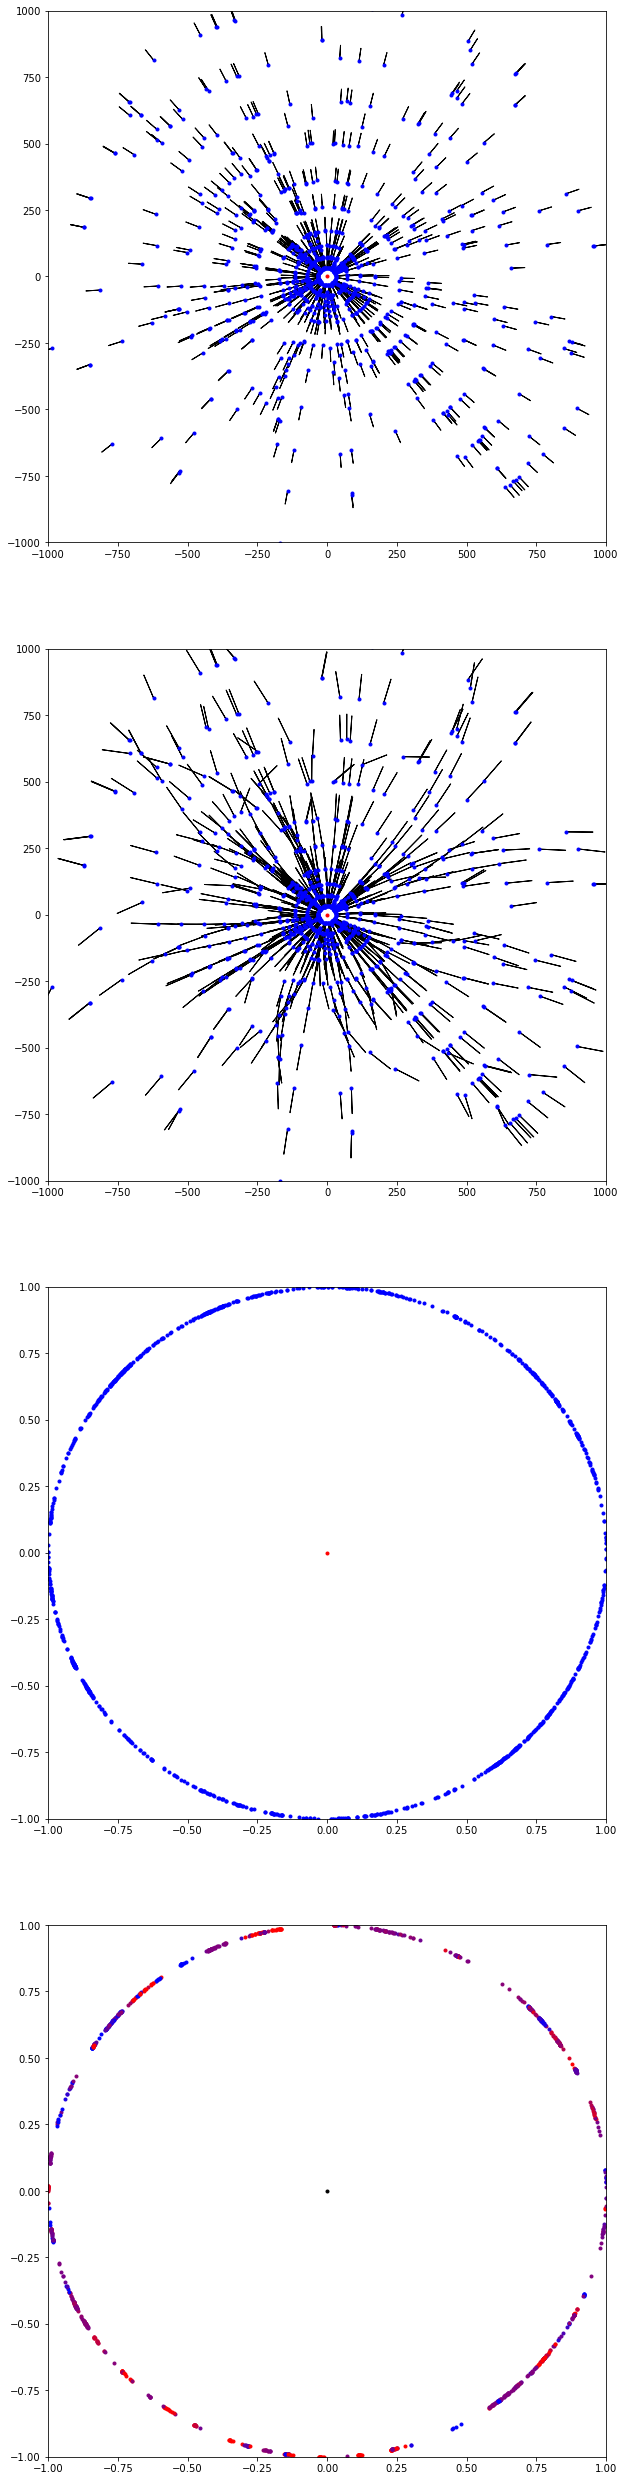

In [16]:
import math
import matplotlib.pyplot as plt
import random

#centrePhi = random.uniform(-math.pi, math.pi)
#print("c:", centrePhi)
##centrePhi = 2.2
#thetas = []
#curvature = random.randint(0,1)*2 - 1
#print(curvature)

#for i in range(5):
#    thetas.append(random.uniform(0, curvature * math.pi/1000))

#thetas.sort(key = lambda x: abs(x))

#print(thetas)

#R = 100000
#data = []

#rotors = []

#for i in range(len(thetas)):
#    theta = thetas[i]
#    data.append((-R*math.cos(theta + centrePhi) + R*math.cos(centrePhi), -R*math.sin(theta + centrePhi) + R*math.sin(centrePhi), 0))
#    #rotors.append((curvature * math.sin(theta + centrePhi), -curvature * math.cos(theta + centrePhi), 0))
#    #rotors.append((-math.sin(theta), math.cos(theta), 0))
#data = [(98.6442, 124.154, -1298.0), (82.3585, 105.872, -1098.0), (82.6824, 106.236, -1102.0), (71.1778, 92.8775, -958.0), (71.4931, 93.2636, -962.0), (73.0354, -157.92, -818.0), (60.1184, 79.7438, -818.0), (-54.1753, 165.575, -822.0), (63.3417, -134.233, -698.0), (50.8396, 68.3407, -698.0), (51.1246, 68.7387, -702.0), (-44.8802, 141.85, -702.0), (-22.2046, -114.122, -598.0), (54.952, -114.613, -598.0), (55.3136, -115.388, -602.0), (43.2494, 58.7609, -598.0), (43.5399, 59.1367, -602.0), (-37.4606, 121.916, -602.0), (18.3987, 26.0333, -262.633), (-6.25713, -31.6323, -167.762), (15.0978, -29.3332, -157.145), (-8.32315, 30.92, -153.448), (13.7425, -29.0253, -53.7111), (14.2403, -30.0991, -55.5892), (14.4652, 28.4783, -64.2589), (-6.02516, -31.1495, 70.1153), (-4.49266, -31.7318, 105.607), (-6.12163, -31.6399, 71.2762), (7.26409, -31.2903, 139.642), (-13.6971, -69.7712, -366.719), (-14.071, -71.6991, -376.774), (32.428, -64.9097, -342.31), (-19.9141, 69.6304, -343.239), (32.2492, 64.381, -141.323), (31.6714, -64.8493, -117.473), (32.0247, 63.936, -140.349), (-13.264, -69.8387, 160.457), (-13.6011, -71.6794, 164.76), (-9.34723, -71.9969, 242.672), (16.3643, -70.7321, 319.102), (51.4933, 104.393, -226.716), (52.2148, -103.166, -186.743), (-21.2823, -114.332, 264.273), (-13.6415, -114.648, 387.624), (-13.8145, -116.58, 394.172), (74.659, 154.446, -332.805), (75.5073, 156.317, -336.749), (80.2835, -151.741, -276.154), (-30.8514, -169.951, 393.849), (30.3157, -132.061, 598.0), (190.925, -589.678, -2945.5), (190.872, -589.77, -2948.5), (240.578, 267.294, -2948.5), (-267.803, 554.227, -2945.5), (174.429, -510.67, -2554.5), (206.721, 233.044, -2548.5), (-225.436, 486.134, -2551.5), (156.161, -427.805, -2151.5), (171.297, 198.543, -2148.5), (-181.903, 415.843, -2151.5), (138.333, -355.741, -1798.5), (-144.258, 351.669, -1795.5), (121.071, -294.981, -1498.5), (-114.065, 295.615, -1495.5), (102.655, -237.833, -1218.5), (102.691, -237.807, -1215.5), (-87.6601, 242.014, -1215.5), (128.364, -226.459, -417.8), (-45.4458, -260.608, 605.0), (190.677, -310.533, -584.2), (-59.6324, -356.696, 827.6), (283.547, -417.049, -809.4), (402.361, -529.773, -1069.6), (397.369, -525.466, -1059.4), (-81.5949, -527.992, 1224.5), (60.2768, -267.51, 1215.5), (-94.5432, -645.761, 1495.5), (73.6985, -329.691, 1495.5), (87.9675, -396.669, 1801.5), (104.192, -474.248, 2151.5), (122.293, -561.178, 2548.5), (122.25, -560.871, 2545.5), (140.639, -649.394, 2948.5), (140.52, -649.15, 2945.5), (624.078, -691.922, -1505.5), (474.165, -588.638, -1214.5), (-107.813, -780.361, 1797.5), (-120.266, -934.294, 2152.5)]
#data = [(59.9066, -24.6788, -1498.0), (94.6938, -17.5662, -1502.0), (87.6481, 10.6346, -1502.5), (51.8598, -21.6163, -1298.0), (82.1165, -15.4722, -1302.0), (76.0343, 9.51993, -1302.5), (43.9802, -18.5361, -1102.5), (43.7821, -18.4869, -1098.0), (43.9562, -18.5489, -1102.0), (69.5197, -13.2707, -1102.0), (69.2116, -13.196, -1097.5), (64.4202, 8.35511, -1102.5), (64.1678, 8.33498, -1098.0), (94.1312, 126.467, -1098.0), (94.4023, 126.972, -1102.0), (22.8798, 169.268, -1098.0), (38.3957, -16.3453, -962.5), (38.2004, -16.229, -958.0), (38.3569, -16.3305, -962.0), (60.7064, -11.669, -962.0), (60.4065, -11.6504, -957.5), (56.2785, 7.46357, -962.5), (55.9918, 7.45193, -958.0), (83.6368, 109.525, -958.0), (83.9407, 110.019, -962.0), (18.0781, 148.236, -958.0), (32.7893, -14.0826, -822.5), (32.6246, -13.9736, -818.0), (51.893, -10.0673, -822.0), (32.7783, -14.0656, -822.0), (152.16, -32.0637, -818.0), (51.617, -10.0558, -817.5), (48.111, 6.57, -822.5), (102.691, 117.65, -818.0), (72.7167, 92.8523, -818.0), (73.0032, 93.3447, -822.0), (13.8147, 127.083, -818.0), (13.9074, 127.698, -822.0), (28.0332, -12.1063, -702.5), (27.8733, -12.0055, -698.0), (28.0334, -12.1037, -702.0), (44.3493, -8.71905, -702.0), (130.266, -26.3492, -698.0), (44.1017, -8.66188, -697.5), (130.995, -26.5272, -702.0), (41.1498, 5.77137, -702.5), (40.9015, 5.73162, -698.0), (62.992, 78.778, -698.0), (89.0119, 100.432, -702.0), (88.5338, 99.8472, -698.0), (10.4647, 108.858, -698.0), (10.5915, 109.459, -702.0), (37.8648, -7.48498, -598.0), (38.0987, -7.52693, -602.0), (111.847, -21.8632, -598.0), (35.0391, 4.99125, -597.5), (37.8277, -7.46594, -597.5), (112.582, -22.0403, -602.0), (35.3515, 5.06425, -602.5), (35.071, 5.00031, -598.0), (54.667, 67.2018, -598.0), (76.9965, 85.8, -602.0), (76.5133, 85.2149, -598.0), (8.09521, 93.6189, -598.0), (21.3745, 24.5993, -220.422), (1.54414, 33.8455, -211.319), (31.6927, -5.18613, -164.508), (22.0565, 23.2445, -163.124), (23.062, 24.3357, -170.968), (1.41843, 31.9052, -198.874), (-29.1312, -14.5807, -111.336), (28.6688, 15.0984, -97.0176), (2.19961, 31.3653, -100.998), (-28.8932, -14.1201, -64.4281), (-29.7833, -14.5938, -66.6123), (-7.92645, -31.5381, -0.395386), (-7.81242, -31.0486, -0.299115), (5.26833, -31.4636, 40.4573), (22.4734, 22.0345, 49.7859), (23.9063, 23.3792, 52.545), (-17.1635, 26.8242, 8.37987), (-31.8557, -5.64698, 83.9967), (-28.8544, 13.6847, 85.9536), (-31.16, 14.6296, 92.0151), (-31.3037, 3.29024, 170.726), (5.13573, 71.8207, -455.859), (69.9505, -12.5462, -370.733), (71.65, -12.899, -379.924), (49.1698, 53.2383, -376.416), (-63.488, -33.5351, -252.449), (63.6876, 33.2617, -222.171), (4.27349, 71.289, -236.837), (-64.6562, -32.7752, -152.113), (-15.7252, -69.9564, -7.84605), (-37.6347, 60.4934, 11.6294), (13.3849, -70.3718, 83.8818), (13.8609, -72.4397, 86.196), (52.0733, 49.3082, 106.232), (-70.271, -17.3578, 180.565), (-65.355, 28.1478, 184.54), (-67.4067, 28.8773, 190.02), (-72.1138, 12.1402, 388.841), (102.168, 52.8684, -359.219), (104.013, 53.7995, -365.767), (5.62263, 115.43, -386.568), (-101.778, -53.4869, -244.48), (-22.4295, -114.285, -16.5174), (-59.6997, 99.2051, 15.3406), (24.2091, -113.263, 132.232), (86.2797, 78.5104, 169.435), (-110.041, -35.424, 287.78), (-107.351, 41.3183, 295.177), (-109.298, 41.8406, 300.252), (-150.848, -83.1792, -369.23), (-27.5721, -170.021, -27.2114), (-85.3814, 148.076, 20.0537), (-86.2708, 149.851, 20.2263), (40.6794, -166.929, 193.681), (129.683, 112.399, 246.798), (-157.173, -67.1197, 428.755), (-158.64, -68.363, 433.512), (-162.364, 53.0586, 437.308), (-164.172, 53.3604, 441.959), (-109.976, 25.0185, 598.0), (-26.3324, 20.4764, 702.0), (-26.1765, 20.3513, 697.5), (-26.3427, 20.5116, 702.5), (-127.37, 32.5539, 698.0), (-30.743, 24.2547, 822.0), (-30.5821, 24.1141, 817.5), (-30.7645, 24.2768, 822.5), (-148.176, 43.5202, 822.0), (-147.515, 43.1446, 818.0), (-35.6174, 28.6119, 957.5), (-35.7969, 28.7681, 962.5), (-40.6203, 33.1477, 1097.5), (-40.7976, 33.3109, 1102.5), (-47.6097, 39.7748, 1297.5), (-54.5216, 46.5329, 1497.5), (520.433, -173.939, -2948.5), (325.349, 452.748, -2948.5), (325.253, 452.447, -2945.5), (208.569, 359.35, -2951.5), (117.444, 440.503, -2951.5), (455.206, -145.879, -2551.5), (286.29, 390.078, -2554.5), (184.727, 308.671, -2545.5), (95.2191, 382.385, -2551.5), (94.9134, 381.392, -2548.5), (387.503, -116.466, -2151.5), (246.718, 325.459, -2154.5), (161.479, 257.892, -2145.5), (72.0813, 323.908, -2148.5), (-43.0103, 629.612, -2145.5), (326.617, -91.0185, -1798.5), (210.684, 268.881, -1798.5), (141.185, 213.788, -1795.5), (53.4005, 272.839, -1798.5), (-25.4588, 531.809, -1804.5), (-533.151, -430.725, -1498.5), (273.779, -70.8576, -1498.5), (179.272, 221.614, -1498.5), (-12.7656, 444.183, -1504.5), (-449.881, -332.703, -1218.5), (-3.56, 360.6, -1218.5), (3.49333, 261.608, -881.6), (-222.064, -131.145, -555.6), (-27.4813, -259.074, -45.0), (-122.862, 228.784, 27.0), (203.478, 162.391, 372.2), (-254.504, 60.4809, 671.4), (-302.782, -193.412, -777.8), (-300.443, -191.462, -771.4), (-14.7667, -359.051, -65.2), (-160.831, 328.414, 36.6), (-158.783, 322.353, 35.4), (120.63, -344.674, 406.6), (117.538, -339.133, 400.0), (290.573, 211.034, 512.6), (-356.027, 52.1851, 931.92), (25.4778, -495.866, -94.0), (-198.866, 460.777, 47.4), (195.56, -458.567, 554.6), (424.722, 267.085, 716.0), (419.071, 265.127, 707.5), (106.018, -647.809, -128.8), (-226.371, 616.601, 60.4), (305.099, -582.442, 734.8), (584.33, 309.441, 948.6), (578.479, 308.33, 940.2), (-465.303, 21.9242, 1221.5), (-563.362, -23.1158, 1498.5), (-658.996, -87.6892, 1795.5), (-88.7046, 855.23, -2947.5), (-696.993, -680.517, -2155.5), (-612.805, -541.246, -1794.5), (231.508, -787.922, -168.2), (-236.777, 784.195, 76.0), (439.798, -692.759, 921.6), (451.898, -920.266, -222.2), (-222.302, 992.854, 97.6), (772.398, 329.326, 1214.5), (-755.67, -178.636, 2144.5), (-841.99, -288.72, 2555.5), (-842.761, -287.346, 2547.5)]    
#data = [(74.5791, 18.7019, -1498.0), (64.5581, 16.3475, -1298.0), (54.6152, 13.909, -1098.0), (54.7899, 13.9544, -1102.0), (47.6258, 12.1795, -958.0), (47.8209, 12.2584, -962.0), (40.8605, 10.5133, -822.5), (40.6364, 10.4501, -818.0), (40.8193, 10.4947, -822.0), (34.8866, 8.98988, -702.5), (34.6862, 8.97018, -698.0), (34.8622, 9.00137, -702.0), (-147.462, 62.8427, -698.0), (29.9064, 7.7453, -602.5), (29.6804, 7.66555, -598.0), (29.898, 7.75694, -602.0), (-127.871, 49.9292, -598.0), (-128.682, 50.4098, -602.0), (-31.5864, 7.07015, -141.2), (-31.0981, 6.93529, -139.0), (-31.9055, -5.50469, -63.056), (-3.57057, -31.7838, -25.4438), (16.5893, -28.0009, -29.4773), (29.0088, 13.7897, 0.746876), (32.925, 2.58876, -11.5666), (32.6593, 3.34871, 0.128124), (30.0839, 14.2573, 0.803123), (1.47582, 34.3461, -59.9671), (-30.3159, -8.55085, 17.4089), (-19.5865, -25.4608, 16.865), (31.1501, -6.0144, 3.90648), (28.5514, 13.5977, 0.715626), (32.1525, 3.29815, 0.103951), (29.606, 14.0491, 0.771873), (-2.03589, 31.6042, 14.4076), (-2.08934, 32.5751, 14.8907), (7.68493, -31.1432, 135.814), (31.8255, -2.83178, 113.019), (-21.1411, -23.5261, 174.417), (-21.8604, -24.3651, 180.542), (17.5965, -27.1013, 270.624), (-16.4771, -26.9592, 289.262), (-69.3461, 19.6434, -313.023), (-70.0024, -12.808, -137.19), (5.97047, 71.36, -123.526), (-7.51706, -71.9203, -56.0689), (37.3427, -61.3198, -63.551), (72.152, 6.05238, -23.9389), (-69.834, -18.2994, 41.3285), (-44.5631, -56.0451, 39.1781), (69.716, -14.0517, 10.1656), (71.7163, -14.4825, 10.4887), (71.4738, 6.74731, 1.67188), (65.2158, 28.2501, 3.07812), (66.906, 28.8557, 3.19062), (-5.308, 71.8232, 34.1962), (71.6982, -2.209, 255.62), (16.6993, -70.5766, 308.678), (-113.438, -22.1132, -222.173), (14.8566, 114.597, -198.455), (15.3452, 116.702, -201.97), (-11.1975, -115.874, -89.5369), (61.2978, -97.9029, -101.341), (115.369, 10.3137, -37.5852), (-111.846, -26.8988, 66.4089), (-113.899, -27.2742, 67.6278), (-73.9016, -89.6604, 64.318), (113.723, -24.042, 17.3314), (114.955, 9.86314, 3.35938), (107.074, 41.693, 5.66563), (108.899, 42.2025, 5.77813), (-9.66327, 114.996, 55.4422), (116.718, 3.67305, 418.795), (25.3324, -112.367, 490.441), (32.5092, 169.916, -297.225), (93.5895, -144.287, -150.24), (-14.801, -171.251, -131.698), (172.103, 16.6093, -55.5266), (168.085, -37.51, 26.2531), (170.565, 12.6533, 5.53385), (172.625, 12.7341, 5.60938), (162.293, 53.7447, 8.92812), (164.338, 54.0822, 9.04751), (-168.287, -35.8105, 99.624), (-112.526, -130.055, 95.7036), (-16.551, 171.088, 83.1214), (-36.2281, -54.1584, 598.0), (-36.5159, -54.4689, 602.0), (29.9758, -137.168, 598.0), (38.632, -59.836, 598.0), (164.574, 16.7005, 598.0), (-33.9642, 1.51487, 702.5), (-43.2576, -62.3888, 698.0), (-43.5496, -62.6932, 702.0), (34.076, -160.279, 698.0), (45.0206, -69.8784, 698.0), (-33.9371, 1.48858, 702.0), (-33.7288, 1.47588, 697.5), (-39.7507, 1.91209, 822.5), (-51.9625, -72.042, 818.0), (-52.2723, -72.3462, 822.0), (52.6864, -81.9094, 818.0), (-39.7378, 1.90422, 822.0), (-39.5086, 1.88061, 817.5), (-46.5023, 2.38382, 962.5), (-62.8269, -83.2079, 962.0), (61.8011, -96.4148, 962.0), (61.5499, -96.0007, 958.0), (-46.2499, 2.361, 957.5), (-53.2578, 2.9054, 1102.5), (-73.397, -93.2803, 1098.0), (-73.7204, -93.5954, 1102.0), (70.6713, -110.49, 1102.0), (70.4151, -110.092, 1098.0), (-53.027, 2.89437, 1097.5), (-89.3871, -107.527, 1298.0), (82.9998, -130.233, 1298.0), (-62.7204, 3.75757, 1297.5), (-106.085, -120.827, 1498.0), (-72.466, 4.67503, 1497.5), (-339.543, 526.156, -2948.5), (-328.019, 438.452, -2551.5), (-328.416, 437.912, -2545.5), (-315.014, 349.62, -2154.5), (-293.961, 269.244, -1801.5), (-267.869, 203.859, -1498.5), (-595.363, -203.088, -1215.5), (423.613, 499.792, -1218.5), (-232.783, 147.607, -1215.5), (-251.487, -58.841, -496.4), (71.3897, 250.076, -449.0), (-18.2218, -261.228, -200.2), (149.661, -217.461, -229.8), (258.238, 27.7524, -83.2), (254.038, -61.6298, 40.2), (260.243, 14.223, 9.0), (254.24, 61.4543, 13.8), (-259.4, -43.9909, 152.8), (-252.79, -43.6568, 149.2), (-175.053, -188.289, 143.8), (-30.3857, 258.426, 126.4), (-262.385, -44.1464, 154.4), (251.266, 61.4182, 945.8), (-345.633, -90.5301, -687.4), (134.975, 336.012, -633.0), (-18.6429, -358.241, -273.6), (211.855, -290.159, -313.2), (360.138, 43.4876, -115.6), (353.758, 42.3838, -113.2), (360.141, 11.8765, 12.6), (356.521, 53.5245, 18.6), (347.765, -92.1119, 56.8), (-363.175, -44.0939, 212.6), (-356.689, -44.3527, 208.2), (-259.997, -255.487, 204.2), (-255.332, -252.097, 201.4), (-50.525, 356.576, 175.4), (-477.982, -144.993, -963.2), (252.783, 433.151, -897.12), (247.391, 429.853, -886.2), (-12.8838, -499.553, -381.4), (314.379, -393.855, -439.0), (498.102, 69.2952, -159.8), (505.074, 0.476575, 18.6), (500.069, 10.8995, 28.2), (498.996, 1.15838, 17.4), (477.466, -141.625, 78.4), (-88.0956, 494.921, 245.0), (-499.166, -29.7837, 291.0), (-377.146, -330.46, 283.2), (-372.027, -327.627, 279.6), (434.783, -496.117, -575.4), (2.75194, -658.916, -502.8), (653.66, 104.398, -211.4), (656.895, -91.1926, 39.0), (660.821, -22.368, 23.4), (625.805, -209.947, 104.8), (-141.956, 646.558, 324.0), (-139.605, 640.643, 320.4), (-526.492, -401.218, 376.6), (-663.001, 10.4455, 388.0), (50.9648, -280.983, 1218.5), (50.7753, -279.628, 1215.5), (308.433, 109.917, 1215.5), (57.1368, -345.503, 1498.5), (360.011, 171.404, 1501.5), (360.357, 172.015, 1504.5), (61.9471, -415.697, 1801.5), (402.767, 244.127, 1804.5), (65.5342, -496.031, 2151.5), (135.713, -215.951, 2148.5), (438.221, 328.346, 2151.5), (437.357, 327.194, 2148.5), (-201.609, -178.88, 2548.5), (68.3465, -586.732, 2548.5), (160.423, -256.432, 2548.5), (469.558, 417.093, 2548.5), (-239.598, -197.623, 2945.5), (70.7678, -676.223, 2945.5), (70.7017, -676.266, 2948.5), (185.066, -296.957, 2948.5), (-846.07, -365.572, -1802.5), (737.893, 479.623, -1797.5), (738.652, 477.646, -1802.5), (-724.827, -278.868, -1497.5), (580.698, 514.765, -1494.5), (568.955, -589.855, -715.6), (28.9588, -822.146, -630.6), (804.935, 144.934, -260.4), (783.154, -257.786, 48.6), (779.439, -250.895, 48.6), (820.538, -57.7025, 27.0), (764.758, -285.949, 130.0), (781.457, -254.667, 54.4), (777.682, -247.652, 54.4), (-209.383, 797.291, 406.6), (-681.034, -450.247, 466.4), (-814.027, 72.603, 477.2), (753.581, -690.784, -900.0), (747.175, -687.798, -889.2), (74.4463, -1020.52, -786.2), (1000.24, 207.585, -325.2), (1013.01, -117.136, 37.8), (849.482, -565.409, 76.0), (850.036, -555.619, 76.0), (938.461, -399.67, 168.2), (-305.428, 970.799, 498.8), (-903.241, -482.321, 601.8), (-1001.89, 194.612, 612.6)]
#data = [(74.5791, 18.7019, -1498.0), (75.0161, -157.702, -1298.0), (64.5581, 16.3475, -1298.0), (61.2371, -134.586, -1098.0), (54.6152, 13.909, -1098.0), (54.7899, 13.9544, -1102.0), (-1.79594, -175.799, -962.0), (52.0382, -118.165, -958.0), (47.6258, 12.1795, -958.0), (47.8209, 12.2584, -962.0), (-3.67221, -150.342, -822.0), (43.1531, -101.508, -818.0), (40.8605, 10.5133, -822.5), (40.6364, 10.4501, -818.0), (40.8193, 10.4947, -822.0), (-4.66213, -128.448, -702.0), (36.1521, -87.6056, -702.5), (34.8866, 8.98988, -702.5), (34.6862, 8.97018, -698.0), (34.8622, 9.00137, -702.0), (-147.462, 62.8427, -698.0), (-146.369, -72.7994, -602.0), (-145.377, -72.3609, -598.0), (-5.01865, -110.176, -602.0), (30.2396, -75.422, -602.5), (29.9064, 7.7453, -602.5), (29.6804, 7.66555, -598.0), (29.898, 7.75694, -602.0), (-127.871, 49.9292, -598.0), (-128.682, 50.4098, -602.0), (10.6197, -29.5926, -234.243), (11.4929, -31.8892, -252.442), (-2.75332, -31.8299, -175.132), (-31.5864, 7.07015, -141.2), (-28.2312, -15.5883, -119.593), (31.3186, -3.02757, -95.668), (-31.0981, 6.93529, -139.0), (-30.8253, -8.59418, -48.6852), (-28.8767, -14.1673, -11.3459), (-31.9055, -5.50469, -63.056), (-29.7711, -14.6075, -11.6603), (-3.57057, -31.7838, -25.4438), (16.5893, -28.0009, -29.4773), (27.8085, -15.8552, -11.548), (26.4325, -18.7106, -28.4319), (29.9824, 11.005, -56.719), (29.0088, 13.7897, 0.746876), (32.2512, 4.5158, -45.393), (32.925, 2.58876, -11.5666), (32.6593, 3.34871, 0.128124), (31.7774, 5.87103, -8.4968), (21.4569, 23.9157, -52.3053), (23.6885, 21.4173, -24.3296), (30.0839, 14.2573, 0.803123), (32.2248, 11.8605, -60.8972), (16.0089, 27.7344, -18.0197), (22.2075, 24.7475, -54.0877), (1.47582, 34.3461, -59.9671), (-6.14735, 31.6808, -38.7202), (-28.5284, 14.3614, -24.801), (-26.8743, 17.7938, -15.213), (-30.3159, -8.55085, 17.4089), (-21.8739, -22.7057, 30.3073), (-19.5865, -25.4608, 16.865), (-22.9739, -23.8286, 31.8733), (18.4348, -25.6886, 10.6896), (31.1501, -6.0144, 3.90648), (28.5514, 13.5977, 0.715626), (32.1525, 3.29815, 0.103951), (29.606, 14.0491, 0.771873), (20.746, 24.9021, 45.9289), (-2.03589, 31.6042, 14.4076), (-12.7482, 28.8484, 46.7465), (-2.08934, 32.5751, 14.8907), (-31.3592, 2.30721, 22.2955), (-31.3279, 2.8628, 9.28957), (-0.254505, -31.9709, 100.867), (7.68493, -31.1432, 135.814), (-0.228214, -33.9099, 107.042), (31.8255, -2.83178, 113.019), (29.499, 14.9121, 88.3767), (-21.1411, -23.5261, 174.417), (-21.8604, -24.3651, 180.542), (15.2268, 27.5617, 164.202), (17.5965, -27.1013, 270.624), (-16.4771, -26.9592, 289.262), (-4.64051, -71.3044, -390.456), (-69.3461, 19.6434, -313.023), (-63.2111, -33.9141, -264.623), (71.4901, -9.07893, -217.516), (-70.0024, -12.808, -137.19), (-69.7711, -18.435, -108.233), (70.4282, 11.0542, -97.6851), (48.8319, 53.4442, -116.486), (5.97047, 71.36, -123.526), (-12.23, 70.1427, -83.7962), (-65.6029, -31.479, -24.155), (-7.51706, -71.9203, -56.0689), (37.3427, -61.3198, -63.551), (58.1442, -42.0696, -61.5297), (62.207, -38.1888, -24.7954), (72.152, 6.05238, -23.9389), (70.3095, 13.6416, -17.3968), (72.3412, 14.0732, -17.8614), (53.803, 47.7175, -53.3215), (37.0123, 62.6376, -39.3346), (-57.4613, 43.1904, -32.3719), (-64.5863, 31.6884, -54.4061), (-69.834, -18.2994, 41.3285), (-49.9608, -50.5783, 69.757), (-44.5631, -56.0451, 39.1781), (43.0895, -58.1039, 25.9696), (69.716, -14.0517, 10.1656), (71.7163, -14.4825, 10.4887), (71.4738, 6.74731, 1.67188), (65.2158, 28.2501, 3.07812), (66.906, 28.8557, 3.19062), (-5.308, 71.8232, 34.1962), (-71.3463, 5.64157, 22.6507), (-71.3017, 4.57573, 52.1223), (-50.3154, -50.9249, 70.2412), (-51.7088, -52.2711, 72.1697), (50.1024, 53.2499, 104.842), (63.9556, 32.8948, 193.592), (0.498841, -73.5003, 233.72), (71.6982, -2.209, 255.62), (16.6993, -70.5766, 308.678), (36.7344, 62.7393, 381.396), (-102.603, -53.107, -425.361), (-104.491, -53.9966, -433.022), (114.448, -18.4737, -350.221), (-113.438, -22.1132, -222.173), (-112.023, -27.9344, -172.565), (-113.944, -28.3349, -175.475), (114.541, 20.369, -158.549), (79.0209, 84.5958, -185.73), (14.8566, 114.597, -198.455), (15.3452, 116.702, -201.97), (-11.1975, -115.874, -89.5369), (61.2978, -97.9029, -101.341), (92.6313, -68.7674, -98.1871), (86.9256, 75.4184, -84.6288), (-16.8568, 115.188, -136.464), (-104.781, 50.1576, -87.2511), (-105.067, -49.2027, -37.761), (97.5773, -64.6051, -38.8208), (115.369, 10.3137, -37.5852), (113.584, 23.2431, -27.398), (60.2527, 99.4367, -62.0533), (-87.1863, 75.5806, -50.5173), (-88.3851, 77.0942, -51.3128), (-111.846, -26.8988, 66.4089), (-113.899, -27.2742, 67.6278), (-73.9016, -89.6604, 64.318), (70.5708, -91.9627, 42.2038), (113.723, -24.042, 17.3314), (114.955, 9.86314, 3.35938), (107.074, 41.693, 5.66563), (108.899, 42.2025, 5.77813), (-9.66327, 114.996, 55.4422), (-115.573, 7.41897, 37.304), (-82.9523, -81.6356, 114.93), (-115.976, 6.23749, 85.5321), (85.3849, 79.1841, 167.951), (101.861, 53.355, 310.159), (103.595, 54.3122, 315.521), (2.63272, -116.929, 373.042), (116.718, 3.67305, 418.795), (25.3324, -112.367, 490.441), (32.5092, 169.916, -297.225), (-166.848, -38.3808, -255.3), (168.223, 34.5123, -233.673), (118.36, 123.298, -273.777), (119.783, 124.655, -276.927), (93.5895, -144.287, -150.24), (136.14, -104.458, -145.538), (-19.1747, 170.5, -201.186), (-14.801, -171.251, -131.698), (131.066, 110.445, -125.643), (91.0695, 145.489, -90.9133), (-118.333, 123.345, -73.6468), (-119.336, 125.252, -74.5032), (-155.628, 72.1554, -128.415), (-157.249, -71.371, -55.5734), (139.667, -102.027, -56.6454), (172.103, 16.6093, -55.5266), (168.025, 36.5475, -39.9966), (106.983, -133.506, 62.8506), (168.085, -37.51, 26.2531), (170.565, 12.6533, 5.53385), (172.625, 12.7341, 5.60938), (162.293, 53.7447, 8.92812), (164.338, 54.0822, 9.04751), (-171.703, 7.84274, 56.0526), (-168.287, -35.8105, 99.624), (-112.526, -130.055, 95.7036), (-16.551, 171.088, 83.1214), (-172.108, 6.91758, 127.489), (-124.729, -118.298, 170.395), (137.038, 105.599, 251.555), (152.023, 81.6762, 466.166), (-36.2281, -54.1584, 598.0), (-36.5159, -54.4689, 602.0), (-15.1364, -33.265, 602.0), (-15.0124, -33.0421, 597.5), (-15.1665, -33.2946, 602.5), (29.9758, -137.168, 598.0), (38.632, -59.836, 598.0), (164.574, 16.7005, 598.0), (60.4075, 97.3412, 602.0), (59.9696, 96.7229, 598.0), (-33.9642, 1.51487, 702.5), (-43.2576, -62.3888, 698.0), (-43.5496, -62.6932, 702.0), (-18.0973, -38.4796, 702.0), (-17.9792, -38.2447, 697.5), (34.076, -160.279, 698.0), (45.0206, -69.8784, 698.0), (71.5813, 112.68, 702.0), (71.1449, 112.06, 698.0), (-33.9371, 1.48858, 702.0), (-33.7288, 1.47588, 697.5), (-39.7507, 1.91209, 822.5), (-51.9625, -72.042, 818.0), (-21.6434, -44.649, 822.0), (-52.2723, -72.3462, 822.0), (-21.5093, -44.4153, 817.5), (52.6864, -81.9094, 818.0), (85.532, 130.745, 822.0), (-39.7378, 1.90422, 822.0), (-39.5086, 1.88061, 817.5), (-46.5023, 2.38382, 962.5), (-25.9932, -51.7472, 962.0), (-62.8269, -83.2079, 962.0), (-25.8445, -51.5087, 957.5), (61.8011, -96.4148, 962.0), (61.5499, -96.0007, 958.0), (-46.2499, 2.361, 957.5), (-53.2578, 2.9054, 1102.5), (-73.397, -93.2803, 1098.0), (-30.54, -58.5927, 1102.0), (-73.7204, -93.5954, 1102.0), (-30.3849, -58.3954, 1097.5), (70.6713, -110.49, 1102.0), (70.4151, -110.092, 1098.0), (-53.027, 2.89437, 1097.5), (-89.3871, -107.527, 1298.0), (-37.2927, -68.1768, 1302.0), (-37.162, -67.9626, 1297.5), (82.9998, -130.233, 1298.0), (-62.7204, 3.75757, 1297.5), (-106.085, -120.827, 1498.0), (-44.5115, -77.2773, 1502.0), (-72.466, 4.67503, 1497.5), (86.1058, -532.095, -2951.5), (213.976, -338.537, -2954.5), (213.867, -338.468, -2951.5), (-339.543, 526.156, -2948.5), (-657.528, -201.983, -2548.5), (61.8917, -460.743, -2551.5), (177.124, -295.0, -2548.5), (-328.019, 438.452, -2551.5), (-328.416, 437.912, -2545.5), (-549.03, -186.502, -2145.5), (39.7043, -388.618, -2148.5), (141.82, -251.727, -2145.5), (570.787, -356.746, -2148.5), (-315.014, 349.62, -2154.5), (-457.187, -169.89, -1801.5), (23.1035, -326.526, -1798.5), (112.988, -213.836, -1795.5), (503.971, -268.638, -1795.5), (-293.961, 269.244, -1801.5), (-377.779, -151.502, -1501.5), (11.4, -271.8, -1495.5), (440.314, -201.218, -1504.5), (-267.869, 203.859, -1498.5), (-595.363, -203.088, -1215.5), (-302.555, -130.248, -1215.5), (368.567, -140.819, -1215.5), (370.514, -142.388, -1224.5), (423.613, 499.792, -1218.5), (-232.783, 147.607, -1215.5), (-236.494, -108.33, -958.2), (251.129, -68.7953, -792.6), (-251.487, -58.841, -496.4), (-255.126, -51.1323, -387.4), (183.575, 182.982, -415.0), (71.3897, 250.076, -449.0), (251.188, 62.3216, -353.2), (-18.2218, -261.228, -200.2), (149.661, -217.461, -229.8), (204.416, -165.005, -222.2), (202.815, 163.455, -191.0), (-238.769, 104.756, -194.6), (-237.821, -102.971, -83.2), (197.751, -166.854, -83.2), (258.238, 27.7524, -83.2), (251.412, 59.7178, -59.2), (141.28, 215.176, -135.2), (-150.771, 213.771, -110.8), (-149.513, 208.001, -108.88), (254.038, -61.6298, 40.2), (260.243, 14.223, 9.0), (254.24, 61.4543, 13.8), (-259.4, -43.9909, 152.8), (-252.79, -43.6568, 149.2), (-175.053, -188.289, 143.8), (168.128, -196.412, 95.2), (-30.3857, 258.426, 126.4), (-261.421, 4.29851, 86.2), (-262.385, -44.1464, 154.4), (-264.381, 4.66375, 196.6), (-193.389, -172.984, 258.0), (226.527, 128.205, 381.4), (224.607, 125.127, 695.2), (19.5693, -260.626, 837.2), (251.266, 61.4182, 945.8), (-345.633, -90.5301, -687.4), (134.975, 336.012, -633.0), (-353.45, -59.221, -533.6), (344.03, 102.745, -491.6), (2.14482, 364.721, -431.0), (0.77423, 358.949, -424.2), (-18.6429, -358.241, -273.6), (211.855, -290.159, -313.2), (273.914, -233.42, -304.2), (286.448, 219.213, -264.0), (-331.732, 136.327, -267.6), (206.792, 297.136, -189.8), (-152.902, 330.377, -155.48), (-153.945, 324.146, -152.6), (-331.612, -135.571, -114.4), (255.764, -256.271, -117.4), (252.839, -250.868, -115.6), (360.138, 43.4876, -115.6), (353.758, 42.3838, -113.2), (345.659, 90.3318, -82.0), (-153.47, 327.181, -154.0), (-154.519, 320.77, -151.6), (360.141, 11.8765, 12.6), (356.521, 53.5245, 18.6), (-356.527, -5.13732, 118.0), (243.747, -264.132, 133.6), (347.765, -92.1119, 56.8), (-363.175, -44.0939, 212.6), (-356.689, -44.3527, 208.2), (-259.997, -255.487, 204.2), (-255.332, -252.097, 201.4), (-50.525, 356.576, 175.4), (-356.197, -1.63283, 265.2), (-273.833, -228.918, 355.8), (-362.596, -2.18671, 270.0), (-276.311, -230.549, 358.6), (341.672, 120.711, 542.0), (334.9, 122.292, 532.4), (311.058, 180.724, 974.0), (313.591, 182.425, 981.8), (-477.982, -144.993, -963.2), (252.783, 433.151, -897.12), (247.391, 429.853, -886.2), (-494.845, -59.4043, -742.4), (466.61, 174.434, -686.8), (45.6404, 498.633, -595.2), (-12.8838, -499.553, -381.4), (314.379, -393.855, -439.0), (369.893, -341.088, -425.0), (409.821, 290.836, -369.0), (-470.543, 174.932, -375.4), (299.211, 398.786, -260.4), (-469.339, -175.85, -159.8), (309.731, -396.36, -165.8), (498.102, 69.2952, -159.8), (-71.1767, 495.109, -229.4), (478.435, 141.583, -114.0), (505.074, 0.476575, 18.6), (500.069, 10.8995, 28.2), (498.996, 1.15838, 17.4), (477.466, -141.625, 78.4), (-502.29, -31.0575, 167.0), (358.9, -349.541, 187.4), (-88.0956, 494.921, 245.0), (-499.166, -29.7837, 291.0), (-377.146, -330.46, 283.2), (-372.027, -327.627, 279.6), (-501.037, -19.6863, 374.2), (-400.602, -302.959, 501.8), (-395.131, -300.093, 495.6), (502.417, 32.2105, 799.4), (497.168, 37.3044, 789.133), (-663.808, -42.2643, -994.6), (-657.653, -43.2616, -985.4), (-654.708, -43.7169, -980.4), (595.012, 276.321, -913.2), (126.528, 648.505, -792.8), (434.783, -496.117, -575.4), (2.75194, -658.916, -502.8), (463.121, -465.733, -556.0), (551.098, 359.062, -483.2), (-627.458, 206.84, -495.2), (416.684, 508.83, -344.0), (-625.599, -210.944, -210.2), (329.054, -577.043, -225.32), (329.269, -570.536, -223.4), (653.66, 104.398, -211.4), (622.89, 209.318, -149.2), (656.895, -91.1926, 39.0), (660.821, -22.368, 23.4), (625.805, -209.947, 104.8), (-659.508, -75.4215, 222.2), (501.385, -431.214, 249.8), (-141.956, 646.558, 324.0), (-139.605, 640.643, 320.4), (-526.492, -401.218, 376.6), (-663.001, 10.4455, 388.0), (-655.086, -50.266, 491.6), (-549.08, -370.44, 664.2), (44.0921, -377.232, 1218.5), (50.9648, -280.983, 1218.5), (50.7753, -279.628, 1215.5), (601.544, -233.867, 1218.5), (308.433, 109.917, 1215.5), (386.872, 233.194, 1224.5), (57.1368, -345.503, 1498.5), (68.209, -462.104, 1501.5), (360.011, 171.404, 1501.5), (360.357, 172.015, 1504.5), (467.811, 292.783, 1495.5), (171.54, 224.969, 1498.5), (61.9471, -415.697, 1801.5), (98.3509, -550.391, 1798.5), (402.767, 244.127, 1804.5), (554.932, 361.331, 1795.5), (213.493, 263.392, 1798.5), (65.5342, -496.031, 2151.5), (138.832, -653.325, 2148.5), (138.437, -652.193, 2145.5), (135.713, -215.951, 2148.5), (438.221, 328.346, 2151.5), (437.357, 327.194, 2148.5), (264.116, 306.591, 2151.5), (-201.609, -178.88, 2548.5), (68.3465, -586.732, 2548.5), (160.423, -256.432, 2548.5), (469.558, 417.093, 2548.5), (321.149, 355.403, 2551.5), (-239.598, -197.623, 2945.5), (70.7678, -676.223, 2945.5), (70.7017, -676.266, 2948.5), (185.066, -296.957, 2948.5), (374.201, 404.465, 2945.5), (-767.976, -216.466, -2947.5), (687.334, -550.903, -2947.5), (686.157, -550.507, -2952.5), (629.287, -454.969, -2544.5), (-846.07, -365.572, -1802.5), (737.893, 479.623, -1797.5), (738.652, 477.646, -1802.5), (-724.827, -278.868, -1497.5), (580.698, 514.765, -1494.5), (-993.078, 45.8865, -1502.5), (-808.164, -11.7215, -1217.5), (739.299, 440.079, -1217.5), (391.319, 902.954, -1225.5), (240.19, 784.452, -1003.0), (551.873, -609.754, -694.0), (548.732, -603.966, -694.0), (568.955, -589.855, -715.6), (28.9588, -822.146, -630.6), (704.915, 418.65, -601.8), (-790.419, 227.448, -620.7), (551.124, 614.336, -428.2), (545.798, 610.504, -428.2), (-784.435, -235.054, -260.4), (291.045, -768.118, -292.8), (293.63, -761.047, -282.0), (804.935, 144.934, -260.4), (783.154, -257.786, 48.6), (779.439, -250.895, 48.6), (820.538, -57.7025, 27.0), (764.758, -285.949, 130.0), (781.457, -254.667, 54.4), (777.682, -247.652, 54.4), (-805.336, -132.881, 271.2), (-209.383, 797.291, 406.6), (-681.034, -450.247, 466.4), (-814.027, 72.603, 477.2), (-814.236, -94.9015, 612.6), (-703.771, -421.359, 829.4), (753.581, -690.784, -900.0), (747.175, -687.798, -889.2), (74.4463, -1020.52, -786.2), (640.869, -794.778, -872.6), (-993.368, 234.9, -775.4), (902.396, 475.547, -758.8), (-990.18, 234.893, -769.6), (721.785, 723.753, -531.2), (716.257, 720.49, -531.2), (121.83, -1016.82, -385.0), (128.466, -1010.73, -385.0), (-990.712, -249.939, -325.2), (-984.418, -249.737, -325.2), (1000.24, 207.585, -325.2), (939.813, 406.784, -233.0), (1013.01, -117.136, 37.8), (849.482, -565.409, 76.0), (850.036, -555.619, 76.0), (938.461, -399.67, 168.2), (-991.959, -233.848, 346.8), (-305.428, 970.799, 498.8), (-903.241, -482.321, 601.8), (-1001.89, 194.612, 612.6), (-1007.97, -168.353, 769.6), (-1001.75, -165.673, 769.6), (-1010.95, -169.626, 775.4), (-909.782, -462.935, 1035.4), (655.158, 444.329, 2147.5), (186.668, -764.676, 2544.5), (771.791, 541.882, 2552.5), (237.52, -890.095, 2955.5)]
#data = [(-166.959, -26.3441, -1498.0), (-82.4397, -37.7466, -1502.0), (11.3996, -149.674, -1498.0), (91.4427, -67.9066, -1502.0), (91.1692, -67.7554, -1498.0), (76.4656, 67.0503, -1502.5), (35.9852, 70.158, -1502.0), (35.8718, 69.9435, -1497.5), (-68.483, 68.2885, -1502.0), (-116.759, 116.511, -1498.0), (-68.2695, 68.0722, -1497.5), (-144.424, -23.4025, -1298.0), (-71.3431, -32.9338, -1302.0), (8.15945, -129.552, -1298.0), (33.391, -149.068, -1298.0), (78.5365, -58.9559, -1297.5), (65.9847, 58.3618, -1302.5), (31.3025, 60.6983, -1302.0), (31.1997, 60.4933, -1297.5), (-68.26, 145.743, -1298.0), (-59.7038, 58.7023, -1302.0), (-102.775, 99.0096, -1298.0), (-59.4812, 58.5278, -1297.5), (-121.895, -20.2598, -1098.0), (-122.341, -20.3248, -1102.0), (-60.2847, -28.0285, -1102.0), (-60.0164, -27.8939, -1097.5), (5.33512, -109.442, -1098.0), (26.0811, -126.505, -1098.0), (66.0135, -50.1671, -1097.5), (66.3347, -50.3551, -1102.5), (55.6115, 49.6337, -1102.5), (26.5606, 51.3335, -1102.0), (26.4398, 51.0924, -1097.5), (-60.0013, 122.212, -1098.0), (-60.169, 122.666, -1102.0), (-50.842, 49.3274, -1102.0), (-88.3853, 81.986, -1098.0), (-50.6346, 49.131, -1097.5), (-88.684, 82.3186, -1102.0), (-106.164, -17.9645, -958.0), (-52.5332, -24.5471, -962.0), (-52.268, -24.4358, -957.5), (3.74647, -95.7176, -962.0), (21.5203, -111.026, -962.0), (21.4063, -110.56, -958.0), (57.3443, -43.8807, -957.5), (57.6683, -44.106, -962.5), (48.3528, 43.4342, -962.5), (23.2221, 44.7371, -962.0), (23.1288, 44.536, -957.5), (-43.7826, 155.687, -958.0), (-44.0339, 156.317, -962.0), (-53.6671, 105.885, -958.0), (-53.8725, 106.327, -962.0), (-44.5788, 42.841, -962.0), (-77.9339, 70.4739, -958.0), (-44.3466, 42.6427, -957.5), (-78.2554, 70.7992, -962.0), (-90.4852, -15.5788, -818.0), (-44.8008, -21.0195, -822.0), (-44.5526, -20.9393, -817.5), (-99.9299, -124.372, -818.0), (2.33615, -81.6214, -822.0), (17.1339, -94.3926, -817.5), (48.7089, -37.588, -817.5), (49.0048, -37.8002, -822.5), (41.144, 37.2116, -822.5), (40.9189, 37.016, -818.0), (19.8835, 38.1407, -822.0), (19.7545, 37.9578, -817.5), (-35.3841, 133.519, -818.0), (-46.9166, 89.7234, -818.0), (-38.2258, 36.4034, -822.0), (-67.1024, 59.1849, -817.5), (-38.0112, 36.2025, -817.5), (-77.5619, -13.5522, -702.5), (-77.0467, -13.4838, -698.0), (-38.1926, -18.0117, -702.0), (-37.9538, -17.8924, -697.5), (-87.5812, -104.1, -698.0), (1.37908, -69.162, -698.0), (13.9942, -81.0088, -702.0), (1.38728, -69.565, -702.0), (13.8958, -80.4765, -697.5), (41.3726, -32.1465, -697.5), (41.6759, -32.3708, -702.5), (35.0465, 31.8722, -702.5), (34.8204, 31.6463, -698.0), (16.8655, 32.3345, -698.0), (16.9754, 32.5339, -702.0), (16.8794, 32.3233, -697.5), (-28.7063, 114.299, -698.0), (-40.7766, 76.0695, -698.0), (-32.7039, 30.9389, -702.0), (-32.5095, 30.6918, -697.5), (-57.6205, 49.7715, -697.5), (-66.3798, -11.7479, -602.5), (-65.8626, -11.6728, -598.0), (-32.4541, -15.3761, -598.0), (-32.6757, -15.456, -602.0), (-32.4521, -15.342, -597.5), (-77.1019, -88.303, -602.0), (-76.6537, -87.6537, -598.0), (0.766391, -59.1268, -598.0), (0.797166, -59.5178, -602.0), (11.403, -69.3715, -602.0), (11.2578, -68.846, -597.5), (35.2902, -27.6092, -597.5), (35.5871, -27.8185, -602.5), (29.9391, 27.3786, -602.5), (14.4536, 27.6629, -598.0), (29.7143, 27.1306, -598.0), (14.5538, 27.8166, -602.0), (14.4425, 27.6159, -597.5), (-23.3735, 98.1072, -597.5), (-35.6752, 65.2879, -602.5), (-35.4422, 64.7742, -598.0), (-28.1226, 26.3448, -602.0), (-27.9051, 26.1675, -597.5), (-49.6169, 42.0152, -597.5), (-31.794, -5.8235, -292.603), (4.41876, -32.2852, -282.185), (-25.4906, 20.6652, -305.032), (-28.9639, -12.4178, -248.428), (-30.4706, -13.0811, -261.077), (4.33607, -31.7896, -277.931), (-8.91165, 30.1898, -237.512), (-16.2306, 27.6575, -264.09), (-22.8202, -22.3894, -168.65), (-24.1468, -23.8129, -178.49), (-5.96162, 31.7457, -196.076), (-5.12579, -31.2002, -69.6604), (7.84926, -30.5612, -73.4409), (24.2054, 20.0954, -85.9693), (27.9975, 15.8499, -90.0559), (-6.94758, 30.8765, -70.3872), (-8.22157, 30.4311, -85.5375), (-20.7565, -25.4467, -19.5857), (-5.21941, -31.6908, -70.6474), (28.2025, -15.0375, -1.62668), (22.9558, 22.2377, -17.2726), (25.7592, 19.0991, -36.8688), (24.416, 23.6832, -17.9468), (5.87785, 31.6537, -30.7121), (9.73474, 31.4361, -27.0609), (2.22037, 31.86, -33.6163), (-11.8875, 29.6738, -9.62351), (-13.5065, 29.1078, -11.0412), (-14.0466, 30.2721, -11.2117), (-12.6304, 31.5371, -9.81203), (-14.2945, 30.0506, -11.0473), (-26.8834, 17.7751, -41.6324), (-31.815, -4.26327, 60.1404), (-31.158, -6.14246, 33.0841), (-22.8945, -21.5631, 61.6473), (-24.4913, -23.0973, 66.464), (-6.39002, -31.1289, 21.0906), (7.20784, -30.7855, 18.2732), (18.7886, -25.3726, 21.0248), (24.8326, -20.8902, 32.0517), (31.2413, -4.39695, 69.5109), (31.5957, 1.88612, 9.7755), (32.4637, 2.40799, 67.8109), (29.889, 9.77194, 51.7491), (32.6387, 1.9075, 10.3262), (23.3061, 21.1022, 17.3915), (26.459, 17.5724, 44.4273), (0.592614, 31.4559, 13.7547), (0.603425, 33.5166, 15.1044), (-8.34827, 30.3868, 46.228), (-22.2582, 22.2736, 45.8321), (-23.5461, 23.56, 48.8637), (-25.159, 20.2129, 25.8742), (-25.1341, 20.2645, 34.5297), (-26.868, 16.6664, 4.27377), (-28.4018, 13.4835, 35.969), (-31.2541, 4.16959, 69.4921), (-30.6704, 14.5183, 39.3), (-18.3643, -26.5994, 135.979), (-10.4696, -31.3947, 78.3911), (25.4306, -20.7898, 83.7112), (31.7329, -4.47379, 70.7185), (24.6587, 20.3311, 76.7729), (-31.7859, 3.53352, 84.8457), (-31.54, 7.89295, 99.0554), (-31.7463, 4.23487, 70.7051), (-28.5184, -13.6921, 169.266), (-31.4154, -5.40631, 148.572), (-28.7996, -12.8877, 166.13), (-29.6405, -10.4826, 148.268), (-28.9639, -12.4178, 175.088), (-29.512, -14.1543, 175.365), (-28.3887, -15.4119, 173.925), (-27.752, -16.1248, 206.7), (-30.4934, -13.0556, 184.644), (-30.13, -13.4625, 174.061), (-9.38942, -30.9597, 174.944), (19.0142, -25.1712, 144.742), (24.9909, -20.5618, 167.787), (-19.6106, 24.6384, 158.1), (-28.1878, -16.3801, 210.064), (-27.9998, -16.5906, 216.078), (-15.1791, 69.9362, -425.885), (-15.6317, 71.6179, -436.08), (-49.9767, -52.7467, -374.894), (-13.5886, -70.2892, -148.823), (-14.0594, -72.1941, -152.698), (19.931, -69.6226, -160.015), (61.6598, 36.8772, -192.78), (54.7425, 46.8534, -187.994), (-15.0074, 69.9779, -150.668), (-20.7679, 69.2342, -188.033), (-15.3516, 71.7479, -154.306), (55.3484, 45.6236, -73.7273), (-58.5021, 40.5306, -83.8266), (-45.5202, -56.0417, -34.9184), (50.8187, 50.462, -30.2346), (52.2502, 51.9412, -30.9118), (13.2881, 70.336, -59.9614), (20.4692, 69.2174, -51.2095), (13.6468, 72.1768, -61.3532), (5.26669, 71.8261, -67.2415), (-26.6872, 66.487, -13.1469), (-30.7777, 66.1152, -16.4536), (-27.5017, 68.5082, -13.3337), (-31.1732, 65.8264, -16.0887), (-14.2391, -69.6868, 55.6486), (-14.6478, -71.7232, 57.4688), (16.1032, -70.8533, 50.8325), (43.2763, -57.9008, 56.9051), (43.8406, -57.2871, 65.7024), (63.196, -34.0463, 4.81239), (72.4455, 2.7451, 31.1509), (55.1401, 45.8151, 48.3998), (0.195628, 71.1184, 39.7558), (0.147464, 73.1477, 41.0813), (-55.4922, 45.4706, 65.854), (-62.4998, 35.9484, 18.4025), (-70.3065, -18.4574, 84.7313), (44.1305, -57.7033, 74.5387), (55.3468, -46.6608, 79.882), (68.7539, 21.8027, 127.646), (59.3035, 40.103, 108.638), (60.8849, 41.2045, 111.746), (-18.8796, 70.1105, 115.334), (-51.111, 50.1131, 112.852), (-52.4685, 51.3847, 115.968), (-56.0637, 45.4841, 85.5664), (-65.0195, 30.5049, 90.8531), (-72.1573, -3.93205, 144.706), (-51.3167, -49.3314, 148.228), (-19.4946, -68.8682, 178.37), (56.1747, -44.3504, 190.236), (71.5602, -10.7538, 168.223), (72.1315, 4.03822, 158.968), (56.4961, 44.5681, 181.582), (-71.4486, 8.08594, 199.17), (-71.5219, 9.83822, 167.81), (-69.3606, 19.55, 228.032), (-70.3398, -11.4182, 340.781), (-67.506, -23.3154, 345.331), (-38.9907, -59.4403, 307.199), (-39.947, -61.0362, 315.392), (42.156, -59.1189, 342.033), (68.3159, 21.5704, 324.463), (-66.7485, -29.9108, 393.994), (-65.7037, -31.3411, 398.341), (-63.1633, -34.8189, 396.792), (-21.9972, -68.9794, 399.872), (57.7354, -42.7405, 381.476), (-46.5867, 55.0326, 370.083), (-61.6399, -36.0651, 468.193), (-61.2064, -36.6586, 481.652), (98.0137, 61.9456, -306.877), (86.5435, 76.4733, -297.206), (87.9765, 77.8525, -302.215), (-36.8072, 109.934, -297.959), (-25.871, -113.647, -237.928), (35.079, -110.205, -252.129), (-23.0255, 113.135, -239.017), (85.7326, 78.9223, -115.878), (31.307, 111.021, -77.8878), (21.9262, 113.81, -92.8441), (8.96635, 115.697, -104.192), (-93.2168, 67.7554, -131.781), (-73.2386, -90.616, -52.1845), (81.3131, 82.8699, -44.8462), (-49.4251, 104.926, -21.5936), (-43.6789, 108.552, -17.1668), (-49.1008, 105.131, -22.1469), (101.122, -55.047, 11.8044), (116.627, 1.63171, 54.4022), (-1.66896, 116.62, 69.693), (-101.583, 53.9677, 33.6188), (-103.445, 54.7536, 34.3324), (-109.867, -36.9489, 139.152), (-23.1552, -114.255, 95.5577), (24.9165, -113.027, 85.0203), (70.2191, -93.0422, 95.8863), (70.5072, -92.7428, 123.702), (70.9421, -92.2909, 110.226), (89.3155, -75.4862, 133.246), (93.0363, 70.2247, 83.1562), (-1.69986, 117.118, 70.0155), (-89.5736, 75.0402, 111.63), (110.723, 33.9843, 209.063), (94.6661, 65.27, 178.504), (96.2657, 66.4298, 181.686), (-29.7306, 112.736, 189.23), (-83.4222, 79.7564, 186.187), (-89.9283, 73.4386, 141.71), (-105.217, 48.6601, 150.825), (-83.0277, -81.5788, 246.519), (114.456, -18.2945, 273.511), (116.58, 4.35162, 261.008), (111.208, 34.116, 210.008), (-114.539, 16.2738, 272.95), (-115.754, 3.46212, 237.222), (-25.9003, -113.646, 295.92), (92.1008, -69.6842, 311.198), (92.8076, 69.7577, 297.533), (-114.173, 13.1463, 322.361), (-116.048, 13.3711, 327.77), (-110.882, 35.222, 372.595), (142.808, 96.71, -453.645), (126.856, 117.258, -441.611), (-60.2641, 160.537, -438.118), (-61.1578, 162.302, -443.103), (58.0488, -161.087, -371.063), (-32.0189, 168.138, -350.936), (-45.2645, -166.832, -349.316), (117.861, 124.319, -167.343), (118.818, 125.888, -169.048), (14.2292, 171.713, -151.461), (-135.736, 105.125, -193.391), (-106.932, -133.166, -73.3535), (-108.065, -134.606, -74.0675), (43.9618, 166.468, -112.966), (33.0724, 167.578, -133.606), (33.4568, 169.401, -134.985), (118.118, 124.117, -62.9694), (119.344, 125.539, -63.5855), (-72.8304, 155.261, -29.4824), (-64.6626, 160.188, -22.0906), (-72.6773, 155.353, -28.6927), (-73.5277, 157.208, -28.9531), (-73.6944, 157.088, -29.7434), (149.979, -82.8044, 20.8912), (-154.981, 74.2248, 54.0418), (35.4865, -167.58, 129.218), (35.8249, -169.411, 130.705), (171.727, -3.10069, 83.4281), (143.591, 95.8592, 127.62), (-5.88372, 171.421, 105.953), (-6.07716, 173.436, 107.287), (-157.869, -69.5317, 209.982), (-33.5966, -167.525, 143.222), (-33.9602, -169.391, 144.887), (104.141, -136.343, 144.297), (103.436, -137.047, 185.635), (104.835, -135.65, 165.575), (131.361, -111.391, 199.458), (-130.673, 112.526, 168.095), (-158.248, -69.8562, 210.591), (140.495, 99.2216, 270.25), (-126.067, 116.773, 280.604), (-133.06, 109.543, 213.636), (-156.49, 71.0572, 226.956), (164.699, 48.3854, 313.306), (-42.6501, 166.138, 281.553), (-125.688, 116.452, 279.773), (-120.755, -122.048, 366.824), (169.102, -29.043, 408.192), (172.924, 2.46867, 390.228), (-171.081, 25.2928, 411.429), (-171.053, 23.8188, 358.401), (-27.7075, -169.523, 440.294), (140.131, -99.9943, 467.089), (139.838, 99.2043, 443.008), (-170.486, 20.0646, 484.76), (-122.586, -18.3873, 598.0), (-116.378, -38.9269, 598.0), (-101.319, -45.5839, 602.0), (-98.8086, -46.935, 602.0), (-75.6377, -45.5006, 597.5), (-78.3596, -45.9957, 597.5), (-98.16, -46.6335, 598.0), (-94.3129, -52.7895, 598.0), (-69.9686, -117.265, 598.0), (-33.8591, -102.202, 598.0), (69.5278, -104.727, 598.0), (92.7809, -61.6398, 598.0), (123.344, 43.371, 598.0), (-78.189, 86.1371, 602.0), (-77.6124, 85.638, 598.0), (-142.958, -20.7516, 698.0), (-135.789, -44.8001, 698.0), (-117.931, -53.1376, 702.0), (-115.088, -54.5605, 702.0), (-109.681, -61.922, 698.0), (-114.432, -54.2663, 698.0), (-91.331, -53.7613, 698.0), (-91.837, -54.0916, 702.0), (-79.5986, -137.615, 698.0), (-40.0905, -118.906, 698.0), (79.3027, -123.067, 698.0), (109.394, -69.3305, 698.0), (110.061, -69.6312, 702.0), (143.171, 52.1258, 698.0), (-92.3803, 98.8225, 702.0), (-91.7987, 98.3333, 698.0), (-167.428, -23.3299, 818.0), (-159.142, -51.6778, 818.0), (-134.634, -63.6826, 822.0), (-106.781, -63.1112, 818.0), (-128.06, -72.9599, 818.0), (-102.97, -62.5337, 818.0), (-107.303, -63.4133, 822.0), (-103.461, -62.8422, 822.0), (-47.8246, -138.834, 818.0), (90.7585, -146.143, 822.0), (90.409, -145.385, 818.0), (130.704, -77.9812, 822.0), (-109.375, 112.946, 818.0), (-157.475, -74.26, 962.0), (-120.245, -73.4148, 958.0), (-124.793, -74.0595, 958.0), (-149.379, -86.0367, 958.0), (-120.722, -73.7567, 962.0), (-57.199, -161.927, 958.0), (-142.774, -85.0478, 1098.0), (-137.463, -84.4362, 1098.0), (-137.97, -84.7238, 1102.0), (-331.637, -43.7732, -2945.5), (-176.561, -534.851, -2945.5), (-176.405, -535.179, -2948.5), (46.6967, -294.772, -2948.5), (118.285, -329.197, -2948.5), (-118.538, 349.537, -2945.5), (-208.778, 435.884, -2951.5), (-208.936, 435.927, -2954.5), (-210.912, 254.591, -2948.5), (-286.091, -39.4789, -2545.5), (-176.684, -456.971, -2554.5), (35.6828, -254.982, -2548.5), (94.542, -285.481, -2548.5), (-106.903, 298.86, -2545.5), (-174.16, 383.981, -2551.5), (-185.181, 215.089, -2548.5), (-240.6, -34.8695, -2145.5), (-173.934, -377.58, -2154.5), (72.4989, -242.415, -2145.5), (72.562, -242.401, -2148.5), (-137.697, 331.071, -2145.5), (-96.1306, 249.147, -2145.5), (-165.638, -306.907, -1795.5), (439.13, 519.653, -1798.5), (-106.943, 282.245, -1795.5), (-441.138, 521.116, -1795.5), (-152.613, -249.361, -1498.5), (434.2, -520.557, -1495.5), (391.511, 410.914, -1495.5), (366.975, 461.503, -1498.5), (-81.9996, 237.689, -1495.5), (-339.904, 465.827, -1498.5), (-338.79, 465.025, -1495.5), (-322.249, -500.185, -1215.5), (320.841, -456.743, -1218.5), (339.404, 319.242, -1224.5), (314.009, 365.003, -1221.5), (-52.0028, 597.898, -1215.5), (-253.291, 401.816, -1224.5), (-252.279, 400.968, -1221.5), (205.397, 153.697, -673.0), (186.306, 184.36, -667.6), (103.912, -240.644, -566.6), (184.387, 182.045, -660.0), (-106.857, 239.915, -669.3), (-84.2322, -247.683, -525.6), (-81.5116, -242.765, -514.8), (102.169, -238.019, -560.4), (-43.6451, 259.376, -535.2), (-42.9262, 252.853, -522.0), (-196.754, 167.719, -288.6), (159.164, 211.158, -255.8), (60.1103, 254.655, -168.2), (52.8831, 257.588, -201.8), (23.7022, 259.953, -225.8), (172.983, 190.677, -91.6), (229.052, -129.404, 35.4), (-110.565, 238.997, -40.2), (-112.661, 238.478, -41.4), (-98.2176, 242.054, -29.4), (258.403, -17.2722, 130.0), (-240.171, 96.6888, 85.6), (-50.9187, -258.386, 224.6), (50.4282, -255.186, 200.2), (159.72, -205.141, 222.2), (159.856, -205.056, 254.6), (228.006, 124.704, 197.0), (-17.0425, 260.445, 165.4), (-193.835, 174.172, 258.2), (-220.429, -135.016, 321.36), (153.357, -205.608, 280.8), (-198.89, 165.868, 324.8), (-235.771, 103.985, 343.8), (214.191, 157.399, 421.4), (209.158, 153.268, 410.8), (-195.77, 172.496, 430.0), (250.666, 68.4058, 478.4), (-249.043, 81.9773, 556.1), (-244.501, 77.2371, 542.6), (258.822, -49.8439, 631.2), (264.013, -6.24812, 600.0), (-262.343, 41.1713, 636.0), (-256.147, 40.0653, 620.4), (-16.0644, -258.684, 675.4), (215.661, -140.704, 702.1), (218.162, 140.381, 675.4), (-255.204, 31.025, 729.4), (-239.3, 103.877, 844.2), (273.804, 228.963, -936.4), (244.967, 259.967, -907.6), (-165.921, 316.544, -913.2), (164.99, -320.052, -779.3), (-138.554, -330.39, -719.8), (162.92, -317.656, -772.6), (-51.4223, 353.593, -724.6), (-260.355, 248.496, -400.2), (180.29, 308.487, -349.2), (74.4021, 348.706, -271.8), (35.3615, 354.746, -306.0), (72.1313, 352.577, -229.4), (233.947, 273.277, -124.4), (-155.451, 326.69, -54.4), (-149.898, 328.065, -53.2), (-152.868, 321.381, -54.4), (312.16, -180.377, 51.6), (-151.085, 330.827, -53.4), (-136.486, 334.442, -39.0), (309.632, -178.799, 50.8), (-340.119, 108.76, 121.0), (361.578, -44.816, 187.4), (356.169, -43.0471, 183.8), (-36.4876, 362.459, 234.2), (-67.8677, -350.859, 307.2), (64.1402, -353.36, 279.0), (223.641, -284.215, 356.4), (225.499, -283.278, 312.0), (221.554, -278.65, 306.6), (219.97, -279.687, 350.8), (330.939, 138.289, 278.4), (-260.172, 244.797, 356.4), (-269.97, -240.242, 462.657), (225.592, -286.553, 359.8), (214.699, -292.047, 400.0), (-262.132, 247.025, 359.8), (-277.014, 234.705, 457.6), (-329.37, 140.243, 480.4), (349.067, 87.1567, 666.0), (288.853, 221.032, 579.4), (-279.879, 232.333, 603.0), (351.589, -75.1326, 863.6), (360.401, -22.8048, 824.6), (-309.738, 183.531, 798.543), (-356.796, 59.3284, 868.4), (21.0987, -358.03, 954.72), (307.91, -181.04, 979.6), (311.865, 178.548, 940.0), (310.812, -182.132, 988.2), (-361.328, 45.5758, 1036.0), (-240.676, -438.463, -1014.1), (-55.1281, 500.901, -1020.4), (164.512, 469.448, -502.4), (-332.958, 371.583, -555.2), (111.135, 490.596, -380.2), (55.8431, 496.238, -425.8), (78.9275, 492.378, -315.6), (309.711, 392.328, -170.2), (-204.855, 456.166, -71.2), (-189.208, 460.208, -50.8), (-217.752, 452.835, -73.6), (-214.967, 447.181, -72.4), (-190.345, 462.978, -51.0), (427.228, -254.87, 73.6), (-491.693, 99.4173, 174.44), (489.228, -97.5253, 261.0), (-72.0554, 492.132, 322.8), (-92.3178, -491.188, 431.8), (78.6162, -495.026, 392.8), (320.482, -390.565, 438.2), (316.284, -385.923, 433.0), (490.417, 118.738, 404.2), (484.214, 120.582, 398.8), (290.888, -403.149, 551.0), (312.295, -391.608, 496.4), (-350.046, 352.608, 500.0), (-377.859, 326.779, 631.8), (-268.678, -419.381, 683.527), (-460.645, 186.477, 669.2), (389.601, 315.252, 801.2), (-400.547, 306.225, 839.4), (488.08, 106.434, 928.2), (48.1217, 655.622, -710.3), (-393.641, 530.838, -740.5), (154.188, 641.302, -497.0), (82.8768, 652.961, -560.0), (70.4195, 659.532, -419.8), (385.16, 537.065, -222.2), (-253.23, 610.606, -65.2), (-289.148, 594.203, -94.0), (-264.63, 601.285, -91.6), (562.778, -348.416, 101.2), (557.833, -344.843, 100.0), (-662.348, 46.1927, 239.6), (631.046, -185.295, 351.6), (-133.713, 649.813, 434.2), (87.1695, -653.676, 519.2), (659.499, 31.2273, 553.657), (-118.292, -651.37, 574.2), (416.412, -514.37, 658.2), (429.672, -506.644, 578.6), (-447.088, 487.893, 669.0), (379.472, -537.964, 731.8), (-494.059, 437.542, 836.6), (-613.146, 233.75, 886.8), (501.084, 432.405, 1062.2), (-248.884, -29.8818, 1218.5), (-248.788, -29.8958, 1215.5), (-237.943, -73.4066, 1218.5), (-120.773, -246.183, 1215.5), (46.9203, -669.061, 1215.5), (76.1173, -442.502, 1221.5), (122.232, -221.28, 1215.5), (391.193, -210.492, 1221.5), (491.849, -120.553, 1221.5), (526.272, -70.2261, 1224.5), (640.808, 118.139, 1215.5), (243.435, 103.701, 1218.5), (416.173, 209.947, 1224.5), (-309.681, 386.573, 1224.5), (-330.72, 174.776, 1215.5), (-500.991, 90.0717, 1224.5), (-306.4, -32.9914, 1498.5), (-292.685, -87.2065, 1498.5), (-249.493, -113.894, 1495.5), (-244.199, -114.05, 1495.5), (-230.668, -138.072, 1498.5), (-137.428, -306.975, 1495.5), (-96.281, -249.092, 1498.5), (152.276, -518.301, 1504.5), (140.647, -276.487, 1495.5), (488.905, -237.119, 1501.5), (254.572, -105.15, 1495.5), (490.221, -237.52, 1504.5), (597.867, -160.364, 1495.5), (635.352, -114.237, 1498.5), (516.994, 229.776, 1495.5), (295.138, 135.326, 1498.5), (518.271, 229.998, 1498.5), (-244.86, 491.843, 1495.5), (-216.261, 182.585, 1495.5), (-216.409, 182.554, 1498.5), (-394.911, 237.668, 1501.5), (-610.765, 116.053, 1498.5), (-368.788, -35.0223, 1798.5), (-352.346, -101.31, 1798.5), (-293.402, -136.319, 1795.5), (-298.38, -136.898, 1795.5), (-232.446, -140.992, 1798.5), (-222.951, -140.637, 1798.5), (-275.113, -167.89, 1798.5), (-151.138, -375.332, 1804.5), (-119.978, -296.656, 1798.5), (244.166, -579.595, 1798.5), (156.566, -335.634, 1795.5), (595.711, -257.993, 1798.5), (311.155, -107.1, 1798.5), (629.133, 242.359, 1795.5), (349.366, 171.699, 1798.5), (-140.498, 565.92, 1795.5), (-266.03, 206.33, 1798.5), (-455.868, 308.969, 1798.5), (-441.675, -36.0216, 2154.5), (-423.567, -116.991, 2154.5), (-357.854, -165.113, 2151.5), (-356.962, -164.695, 2145.5), (-351.452, -162.318, 2145.5), (-326.653, -203.42, 2148.5), (-276.992, -169.436, 2148.5), (-264.739, -169.059, 2148.5), (-161.591, -452.831, 2154.5), (-148.953, -351.237, 2148.5), (376.508, -104.285, 2148.5), (412.439, 216.704, 2154.5), (-521.114, 397.284, 2145.5), (-325.36, 230.267, 2154.5), (-524.601, -36.1114, 2554.5), (-503.716, -133.546, 2554.5), (-422.934, -196.14, 2551.5), (-418.156, -191.996, 2551.5), (-313.361, -202.443, 2548.5), (-327.513, -201.93, 2548.5), (-384.552, -244.309, 2551.5), (-183.772, -413.77, 2554.5), (-170.268, -541.793, 2548.5), (453.074, -99.8636, 2554.5), (482.035, 266.754, 2548.5), (-388.555, 253.183, 2554.5), (-607.151, -35.9451, 2948.5), (-582.168, -149.407, 2948.5), (-489.062, -227.774, 2951.5), (-483.972, -221.25, 2951.5), (-377.9, -234.543, 2954.5), (-361.228, -235.706, 2951.5), (-443.179, -286.104, 2951.5), (-218.537, -474.704, 2954.5), (-177.835, -631.698, 2948.5), (528.701, -98.9183, 2954.5), (554.151, 315.53, 2948.5), (-449.595, 275.995, 2951.5), (519.712, 799.638, -2555.5), (513.46, 852.029, -2552.5), (-707.713, 606.029, -2555.5), (-769.447, -629.3, -2152.5), (724.906, -601.563, -2152.5), (464.543, 697.937, -2144.5), (482.43, 648.462, -2144.5), (-562.718, 566.31, -2144.5), (-563.224, 566.237, -2147.5), (-593.621, -608.372, -1797.5), (562.402, -566.587, -1794.5), (565.29, -569.139, -1797.5), (-18.66, 890.0, -1802.5), (-19.4382, 891.036, -1797.5), (-609.589, 513.367, -1497.5), (-434.22, 705.691, -1217.5), (-424.986, 699.018, -921.6), (114.415, 809.311, -694.0), (202.42, 794.481, -612.6), (45.4869, 820.334, -520.4), (447.72, 689.408, -271.2), (445.358, 682.99, -271.2), (-324.556, 753.39, -108.4), (-316.053, 755.496, -76.0), (-362.335, 735.738, -119.2), (687.241, -440.309, 130.0), (-815.041, -51.1442, 303.6), (763.508, -306.846, 449.8), (-210.356, 794.23, 542.0), (87.8263, -820.641, 655.8), (87.9427, -814.104, 645.0), (-141.645, -807.395, 715.6), (540.412, -616.889, 715.6), (804.255, -150.717, 737.2), (520.051, -633.06, 818.6), (-530.442, 626.591, 829.4), (464.712, -674.009, 910.8), (-610.691, 553.963, 1046.2), (160.736, 1006.74, -861.8), (268.157, 982.945, -769.6), (-10.6116, 1019.92, -645.0), (505.069, 884.033, -336.0), (-397.133, 939.147, -97.6), (-394.337, 939.839, -140.8), (-454.569, 909.473, -140.8), (849.384, -569.869, 157.4), (-984.944, -270.373, 406.6), (895.249, -495.612, 580.2), (-332.853, 966.373, 683.2), (-328.295, 960.816, 672.4), (77.1358, -1020.76, 807.8), (-168.793, -1007.77, 889.2), (-167.997, -1001.44, 889.2), (688.368, -754.267, 889.2), (657.312, -785.099, 1024.6), (-621.29, 813.203, 1046.2), (718.876, -702.768, 1225.5), (562.686, 503.757, 1214.5), (-708.375, 655.562, 1222.5), (-707.735, 654.95, 1225.5), (-847.777, 294.139, 1214.5), (-851.01, 294.616, 1222.5), (788.478, 120.316, 1494.5), (674.593, 646.065, 1505.5), (673.939, 645.099, 1502.5), (-760.608, 464.348, 1494.5), (-760.389, 462.802, 1502.5), (746.593, -170.958, 1797.5), (954.033, 114.39, 1802.5), (958.226, 114.99, 1805.5), (868.578, -243.645, 2144.5), (721.118, -273.617, 2144.5), (877.199, -247.671, 2155.5), (847.868, -270.631, 2155.5), (757.831, 246.351, 2147.5), (-871.102, 184.713, 2147.5), (-870.762, 184.981, 2155.5), (493.628, -678.504, 2547.5), (874.89, -288.433, 2555.5), (899.261, 247.08, 2552.5), (-591.775, 502.134, 2547.5), (609.128, -721.819, 2952.5), (608.716, -720.615, 2955.5), (-666.615, 606.073, 2947.5), (-666.616, 606.76, 2955.5)]
data = [(-166.959, -26.3441, -1498.0), (-82.4397, -37.7466, -1502.0), (-59.6681, -127.77, -1502.0), (11.3996, -149.674, -1498.0), (91.4427, -67.9066, -1502.0), (91.1692, -67.7554, -1498.0), (67.9845, 32.5167, -1502.0), (67.7816, 32.4179, -1497.5), (76.4656, 67.0503, -1502.5), (35.9852, 70.158, -1502.0), (35.8718, 69.9435, -1497.5), (-68.483, 68.2885, -1502.0), (-116.759, 116.511, -1498.0), (-68.2695, 68.0722, -1497.5), (-144.424, -23.4025, -1298.0), (-71.3431, -32.9338, -1302.0), (-52.4391, -110.022, -1298.0), (-52.5825, -110.361, -1302.0), (8.15945, -129.552, -1298.0), (33.391, -149.068, -1298.0), (78.5365, -58.9559, -1297.5), (58.849, 28.408, -1302.0), (58.6524, 28.2895, -1297.5), (65.9847, 58.3618, -1302.5), (31.3025, 60.6983, -1302.0), (31.1997, 60.4933, -1297.5), (-68.26, 145.743, -1298.0), (-59.7038, 58.7023, -1302.0), (-102.775, 99.0096, -1298.0), (-59.4812, 58.5278, -1297.5), (-121.895, -20.2598, -1098.0), (-122.341, -20.3248, -1102.0), (-60.2847, -28.0285, -1102.0), (-60.0164, -27.8939, -1097.5), (5.33512, -109.442, -1098.0), (26.0811, -126.505, -1098.0), (66.0135, -50.1671, -1097.5), (66.3347, -50.3551, -1102.5), (49.7326, 24.253, -1102.0), (49.513, 24.1486, -1097.5), (55.6115, 49.6337, -1102.5), (26.5606, 51.3335, -1102.0), (26.4398, 51.0924, -1097.5), (-60.0013, 122.212, -1098.0), (-60.169, 122.666, -1102.0), (-50.842, 49.3274, -1102.0), (-88.3853, 81.986, -1098.0), (-50.6346, 49.131, -1097.5), (-88.684, 82.3186, -1102.0), (-138.782, 101.765, -1098.0), (-106.164, -17.9645, -958.0), (-52.5332, -24.5471, -962.0), (-52.268, -24.4358, -957.5), (-39.9749, -80.9748, -962.0), (-39.7904, -80.5797, -957.5), (3.74647, -95.7176, -962.0), (21.5203, -111.026, -962.0), (21.4063, -110.56, -958.0), (57.3443, -43.8807, -957.5), (57.6683, -44.106, -962.5), (43.2994, 21.2635, -962.0), (43.097, 21.1615, -957.5), (48.3528, 43.4342, -962.5), (23.2221, 44.7371, -962.0), (23.1288, 44.536, -957.5), (-43.7826, 155.687, -958.0), (-44.0339, 156.317, -962.0), (-53.6671, 105.885, -958.0), (-53.8725, 106.327, -962.0), (-44.5788, 42.841, -962.0), (-77.9339, 70.4739, -958.0), (-44.3466, 42.6427, -957.5), (-78.2554, 70.7992, -962.0), (-121.554, 87.9637, -958.0), (-90.4852, -15.5788, -818.0), (-44.8008, -21.0195, -822.0), (-44.5526, -20.9393, -817.5), (-99.9299, -124.372, -818.0), (-34.5198, -68.9149, -822.0), (-34.3144, -68.5354, -817.5), (2.33615, -81.6214, -822.0), (17.1339, -94.3926, -817.5), (48.7089, -37.588, -817.5), (49.0048, -37.8002, -822.5), (36.9373, 18.2494, -822.0), (36.71, 18.1272, -817.5), (41.144, 37.2116, -822.5), (40.9189, 37.016, -818.0), (19.8835, 38.1407, -822.0), (19.7545, 37.9578, -817.5), (-35.3841, 133.519, -818.0), (-46.9166, 89.7234, -818.0), (-38.2258, 36.4034, -822.0), (-67.1024, 59.1849, -817.5), (-38.0112, 36.2025, -817.5), (-104.158, 74.3502, -818.0), (-77.5619, -13.5522, -702.5), (-77.0467, -13.4838, -698.0), (-38.1926, -18.0117, -702.0), (-37.9538, -17.8924, -697.5), (-87.5812, -104.1, -698.0), (-29.6948, -58.6489, -702.0), (-29.5185, -58.2636, -697.5), (1.37908, -69.162, -698.0), (13.9942, -81.0088, -702.0), (1.38728, -69.565, -702.0), (13.8958, -80.4765, -697.5), (41.3726, -32.1465, -697.5), (41.6759, -32.3708, -702.5), (31.2655, 15.5535, -698.0), (31.4587, 15.6013, -702.0), (31.2386, 15.5366, -697.5), (35.0465, 31.8722, -702.5), (34.8204, 31.6463, -698.0), (16.8655, 32.3345, -698.0), (16.9754, 32.5339, -702.0), (16.8794, 32.3233, -697.5), (-28.7063, 114.299, -698.0), (-40.7766, 76.0695, -698.0), (-32.7039, 30.9389, -702.0), (-32.5095, 30.6918, -697.5), (-57.6205, 49.7715, -697.5), (-89.1413, 62.8511, -698.0), (-66.3798, -11.7479, -602.5), (-65.8626, -11.6728, -598.0), (-32.4541, -15.3761, -598.0), (-32.6757, -15.456, -602.0), (-32.4521, -15.342, -597.5), (-77.1019, -88.303, -602.0), (-76.6537, -87.6537, -598.0), (-25.5887, -50.1302, -602.0), (-25.3953, -49.7465, -597.5), (0.766391, -59.1268, -598.0), (0.797166, -59.5178, -602.0), (11.403, -69.3715, -602.0), (11.2578, -68.846, -597.5), (35.2902, -27.6092, -597.5), (35.5871, -27.8185, -602.5), (29.9391, 27.3786, -602.5), (14.4536, 27.6629, -598.0), (29.7143, 27.1306, -598.0), (14.5538, 27.8166, -602.0), (14.4425, 27.6159, -597.5), (-23.3735, 98.1072, -597.5), (-35.6752, 65.2879, -602.5), (-35.4422, 64.7742, -598.0), (-28.1226, 26.3448, -602.0), (-27.9051, 26.1675, -597.5), (-49.6169, 42.0152, -597.5), (-77.048, 53.8709, -602.5), (-31.794, -5.8235, -292.603), (4.41876, -32.2852, -282.185), (-25.4906, 20.6652, -305.032), (-28.9639, -12.4178, -248.428), (-30.4706, -13.0811, -261.077), (4.33607, -31.7896, -277.931), (-8.91165, 30.1898, -237.512), (-16.2306, 27.6575, -264.09), (-22.8202, -22.3894, -168.65), (-24.1468, -23.8129, -178.49), (-5.96162, 31.7457, -196.076), (-26.8011, 17.9457, -210.492), (-33.3423, 0.105011, -97.2315), (-5.12579, -31.2002, -69.6604), (7.84926, -30.5612, -73.4409), (24.2054, 20.0954, -85.9693), (29.038, 14.685, -133.909), (27.9975, 15.8499, -90.0559), (-6.94758, 30.8765, -70.3872), (-8.22157, 30.4311, -85.5375), (-31.4831, 0.110703, -92.1861), (-26.6825, -18.0654, -68.6471), (-20.7565, -25.4467, -19.5857), (-5.21941, -31.6908, -70.6474), (28.8291, -13.7372, -38.9649), (28.2025, -15.0375, -1.62668), (22.9558, 22.2377, -17.2726), (25.7592, 19.0991, -36.8688), (24.8113, 20.1603, -48.2716), (15.1749, 28.1363, -42.5001), (24.416, 23.6832, -17.9468), (5.80967, 31.6575, -26.1963), (5.87785, 31.6537, -30.7121), (9.73474, 31.4361, -27.0609), (2.22037, 31.86, -33.6163), (-11.8875, 29.6738, -9.62351), (-13.5065, 29.1078, -11.0412), (-14.0466, 30.2721, -11.2117), (-12.6304, 31.5371, -9.81203), (-14.2945, 30.0506, -11.0473), (-26.8834, 17.7751, -41.6324), (-31.815, -4.26327, 60.1404), (-31.158, -6.14246, 33.0841), (-22.8945, -21.5631, 61.6473), (-24.4913, -23.0973, 66.464), (-6.39002, -31.1289, 21.0906), (7.20784, -30.7855, 18.2732), (18.9605, -25.2191, 29.8304), (21.6986, -22.7734, 21.624), (18.7886, -25.3726, 21.0248), (21.2887, -23.1396, 24.1627), (22.7057, -21.8739, 24.5362), (23.1686, -24.3433, 23.5832), (24.8326, -20.8902, 32.0517), (22.8985, -24.9038, 26.5223), (26.873, -16.656, 22.3739), (23.8358, -22.9588, 26.0906), (31.2413, -4.39695, 69.5109), (31.5957, 1.88612, 9.7755), (32.4637, 2.40799, 67.8109), (29.889, 9.77194, 51.7491), (32.6387, 1.9075, 10.3262), (23.3061, 21.1022, 17.3915), (26.459, 17.5724, 44.4273), (0.592614, 31.4559, 13.7547), (0.603425, 33.5166, 15.1044), (-8.34827, 30.3868, 46.228), (-20.4551, 23.8841, 50.5766), (-22.2582, 22.2736, 45.8321), (-23.5461, 23.56, 48.8637), (-25.159, 20.2129, 25.8742), (-25.1341, 20.2645, 34.5297), (-26.868, 16.6664, 4.27377), (-28.4018, 13.4835, 35.969), (-31.2541, 4.16959, 69.4921), (-30.6704, 14.5183, 39.3), (-26.3005, -18.493, 94.653), (-18.3643, -26.5994, 135.979), (-10.4696, -31.3947, 78.3911), (25.4306, -20.7898, 83.7112), (31.7329, -4.47379, 70.7185), (24.6587, 20.3311, 76.7729), (-31.7859, 3.53352, 84.8457), (-31.54, 7.89295, 99.0554), (-31.7463, 4.23487, 70.7051), (-28.5184, -13.6921, 169.266), (-31.4154, -5.40631, 148.572), (-28.7996, -12.8877, 166.13), (-29.6405, -10.4826, 148.268), (-28.9639, -12.4178, 175.088), (-29.512, -14.1543, 175.365), (-28.3887, -15.4119, 173.925), (-27.752, -16.1248, 206.7), (-30.4934, -13.0556, 184.644), (-30.13, -13.4625, 174.061), (-4.15954, -31.2547, 201.96), (-9.38942, -30.9597, 174.944), (19.0142, -25.1712, 144.742), (24.9909, -20.5618, 167.787), (-19.6106, 24.6384, 158.1), (-25.6202, 19.2559, 168.509), (-28.1878, -16.3801, 210.064), (-27.9998, -16.5906, 216.078), (27.9775, -14.364, 285.958), (-15.1791, 69.9362, -425.885), (-15.6317, 71.6179, -436.08), (-59.009, 40.6502, -460.859), (-49.9767, -52.7467, -374.894), (65.2196, 32.0038, -290.468), (-73.3553, -1.09633, -205.596), (-59.9263, -42.0861, -147.339), (-13.5886, -70.2892, -148.823), (-14.0594, -72.1941, -152.698), (19.931, -69.6226, -160.015), (61.6598, 36.8772, -192.78), (54.7425, 46.8534, -187.994), (-15.0074, 69.9779, -150.668), (-20.7679, 69.2342, -188.033), (-15.3516, 71.7479, -154.306), (-71.5637, -1.00427, -200.756), (63.202, -34.0299, -80.1402), (55.3484, 45.6236, -73.7273), (56.3562, 44.6967, -100.112), (30.5476, 64.4766, -86.4209), (-58.5021, 40.5306, -83.8266), (-45.5202, -56.0417, -34.9184), (50.8187, 50.462, -30.2346), (52.2502, 51.9412, -30.9118), (13.2881, 70.336, -59.9614), (20.4692, 69.2174, -51.2095), (14.241, 70.1876, -50.0499), (13.6468, 72.1768, -61.3532), (5.26669, 71.8261, -67.2415), (14.7345, 72.2224, -51.3173), (-26.6872, 66.487, -13.1469), (-30.7777, 66.1152, -16.4536), (-27.5017, 68.5082, -13.3337), (-31.1732, 65.8264, -16.0887), (-14.2391, -69.6868, 55.6486), (-14.6478, -71.7232, 57.4688), (16.1032, -70.8533, 50.8325), (43.2763, -57.9008, 56.9051), (48.2248, -52.52, 63.4387), (43.8406, -57.2871, 65.7024), (49.0064, -51.6701, 57.5804), (52.5109, -50.3637, 65.514), (63.196, -34.0463, 4.81239), (61.3192, -39.174, 60.4515), (72.4455, 2.7451, 31.1509), (55.1401, 45.8151, 48.3998), (0.195628, 71.1184, 39.7558), (0.147464, 73.1477, 41.0813), (-55.4922, 45.4706, 65.854), (-62.4998, 35.9484, 18.4025), (-70.3065, -18.4574, 84.7313), (43.8345, -58.0251, 77.6336), (44.1305, -57.7033, 74.5387), (55.3468, -46.6608, 79.882), (68.7539, 21.8027, 127.646), (59.3035, 40.103, 108.638), (60.8849, 41.2045, 111.746), (-18.8796, 70.1105, 115.334), (-44.2785, 57.5424, 126.082), (-51.111, 50.1131, 112.852), (-52.4685, 51.3847, 115.968), (-56.0637, 45.4841, 85.5664), (-65.0195, 30.5049, 90.8531), (-72.1573, -3.93205, 144.706), (-51.3167, -49.3314, 148.228), (-19.4946, -68.8682, 178.37), (56.1747, -44.3504, 190.236), (71.5602, -10.7538, 168.223), (72.1315, 4.03822, 158.968), (56.4961, 44.5681, 181.582), (-71.4486, 8.08594, 199.17), (-71.5219, 9.83822, 167.81), (-59.079, -42.8653, 223.778), (-69.3606, 19.55, 228.032), (-70.3398, -11.4182, 340.781), (-67.506, -23.3154, 345.331), (-38.9907, -59.4403, 307.199), (-39.947, -61.0362, 315.392), (42.156, -59.1189, 342.033), (68.3159, 21.5704, 324.463), (-66.7485, -29.9108, 393.994), (-65.7037, -31.3411, 398.341), (-63.1633, -34.8189, 396.792), (-21.9972, -68.9794, 399.872), (57.7354, -42.7405, 381.476), (-46.5867, 55.0326, 370.083), (-56.1683, 45.3126, 388.403), (-61.6399, -36.0651, 468.193), (-61.2064, -36.6586, 481.652), (-7.25964, -71.414, 468.73), (104.771, 49.6722, -459.64), (-116.631, -4.09929, -323.369), (98.0137, 61.9456, -306.877), (86.5435, 76.4733, -297.206), (87.9765, 77.8525, -302.215), (-36.8072, 109.934, -297.959), (-94.093, -68.5207, -230.588), (-25.871, -113.647, -237.928), (35.079, -110.205, -252.129), (-23.0255, 113.135, -239.017), (92.2742, 70.9582, -157.896), (98.8135, -60.4511, -126.956), (85.7326, 78.9223, -115.878), (43.4309, 106.737, -136.029), (31.307, 111.021, -77.8878), (21.9262, 113.81, -92.8441), (25.6729, 113.656, -77.2614), (8.96635, 115.697, -104.192), (-93.2168, 67.7554, -131.781), (-73.2386, -90.616, -52.1845), (81.3131, 82.8699, -44.8462), (-49.4251, 104.926, -21.5936), (-43.6789, 108.552, -17.1668), (-49.1008, 105.131, -22.1469), (101.122, -55.047, 11.8044), (116.627, 1.63171, 54.4022), (-1.66896, 116.62, 69.693), (-101.583, 53.9677, 33.6188), (-103.445, 54.7536, 34.3324), (-109.867, -36.9489, 139.152), (-23.1552, -114.255, 95.5577), (24.9165, -113.027, 85.0203), (70.2191, -93.0422, 95.8863), (70.5072, -92.7428, 123.702), (70.4566, -92.7954, 128.488), (70.9421, -92.2909, 110.226), (83.8366, -80.0291, 108.414), (79.1032, -86.3155, 108.531), (80.1678, -84.9016, 98.775), (89.3155, -75.4862, 133.246), (97.6471, -64.4416, 101.304), (93.0363, 70.2247, 83.1562), (-1.69986, 117.118, 70.0155), (-89.5736, 75.0402, 111.63), (110.723, 33.9843, 209.063), (94.6661, 65.27, 178.504), (96.2657, 66.4298, 181.686), (-29.7306, 112.736, 189.23), (-64.6685, 95.1562, 204.207), (-65.6046, 97.1231, 208.103), (-83.4222, 79.7564, 186.187), (-89.9283, 73.4386, 141.71), (-105.217, 48.6601, 150.825), (-83.0277, -81.5788, 246.519), (114.456, -18.2945, 273.511), (116.58, 4.35162, 261.008), (111.208, 34.116, 210.008), (-114.539, 16.2738, 272.95), (-115.754, 3.46212, 237.222), (-25.9003, -113.646, 295.92), (92.1008, -69.6842, 311.198), (92.8076, 69.7577, 297.533), (-114.173, 13.1463, 322.361), (-116.048, 13.3711, 327.77), (-93.2579, -70.0115, 361.466), (-110.882, 35.222, 372.595), (-171.481, -10.3875, -473.311), (142.808, 96.71, -453.645), (126.856, 117.258, -441.611), (-60.2641, 160.537, -438.118), (-61.1578, 162.302, -443.103), (58.0488, -161.087, -371.063), (-32.0189, 168.138, -350.936), (-136.166, -103.924, -336.703), (-137.536, -105.139, -340.236), (-45.2645, -166.832, -349.316), (137.677, 101.551, -229.103), (140.273, -100.818, -187.752), (117.861, 124.319, -167.343), (118.818, 125.888, -169.048), (53.6186, 163.556, -200.797), (14.2292, 171.713, -151.461), (-135.736, 105.125, -193.391), (-106.932, -133.166, -73.3535), (-108.065, -134.606, -74.0675), (43.9618, 166.468, -112.966), (33.0724, 167.578, -133.606), (42.7045, 166.596, -111.031), (33.4568, 169.401, -134.985), (118.118, 124.117, -62.9694), (119.344, 125.539, -63.5855), (-72.8304, 155.261, -29.4824), (-64.6626, 160.188, -22.0906), (-72.6773, 155.353, -28.6927), (-73.5277, 157.208, -28.9531), (-73.6944, 157.088, -29.7434), (149.979, -82.8044, 20.8912), (-154.981, 74.2248, 54.0418), (35.4865, -167.58, 129.218), (35.8249, -169.411, 130.705), (171.727, -3.10069, 83.4281), (143.591, 95.8592, 127.62), (-5.88372, 171.421, 105.953), (-6.07716, 173.436, 107.287), (-157.869, -69.5317, 209.982), (-33.5966, -167.525, 143.222), (-33.9602, -169.391, 144.887), (104.141, -136.343, 144.297), (103.436, -137.047, 185.635), (104.835, -135.65, 165.575), (104.187, -136.297, 192.44), (117.176, -124.703, 147.947), (115.653, -126.49, 162.015), (124.488, -118.115, 163.812), (131.361, -111.391, 199.458), (141.526, -97.2092, 151.798), (-130.673, 112.526, 168.095), (-158.248, -69.8562, 210.591), (140.495, 99.2216, 270.25), (-126.067, 116.773, 280.604), (-133.06, 109.543, 213.636), (-156.49, 71.0572, 226.956), (164.699, 48.3854, 313.306), (-42.6501, 166.138, 281.553), (-83.7998, 149.213, 307.683), (-125.688, 116.452, 279.773), (-120.755, -122.048, 366.824), (169.102, -29.043, 408.192), (172.924, 2.46867, 390.228), (-171.081, 25.2928, 411.429), (-171.053, 23.8188, 358.401), (-27.7075, -169.523, 440.294), (140.131, -99.9943, 467.089), (139.838, 99.2043, 443.008), (-170.486, 20.0646, 484.76), (-122.586, -18.3873, 598.0), (-116.378, -38.9269, 598.0), (-101.319, -45.5839, 602.0), (-98.8086, -46.935, 602.0), (-75.6377, -45.5006, 597.5), (-78.3596, -45.9957, 597.5), (-98.16, -46.6335, 598.0), (-94.3129, -52.7895, 598.0), (-69.9686, -117.265, 598.0), (-33.8591, -102.202, 598.0), (-7.93546, -90.9518, 598.0), (15.4601, -32.1615, 597.5), (15.5762, -32.4432, 602.5), (15.4791, -32.1974, 598.0), (69.5278, -104.727, 598.0), (59.1102, -28.5114, 602.5), (92.7809, -61.6398, 598.0), (58.6824, -28.2848, 598.0), (123.344, 43.371, 598.0), (-78.189, 86.1371, 602.0), (-77.6124, 85.638, 598.0), (-83.7702, 72.1383, 598.0), (-84.3041, 72.6373, 602.0), (-142.958, -20.7516, 698.0), (-135.789, -44.8001, 698.0), (-117.931, -53.1376, 702.0), (-115.088, -54.5605, 702.0), (-109.681, -61.922, 698.0), (-114.432, -54.2663, 698.0), (-91.331, -53.7613, 698.0), (-91.837, -54.0916, 702.0), (-79.5986, -137.615, 698.0), (-40.0905, -118.906, 698.0), (-8.05965, -106.093, 698.0), (-8.06113, -106.695, 702.0), (17.8021, -37.5193, 698.0), (79.3027, -123.067, 698.0), (69.1808, -32.7475, 702.5), (109.394, -69.3305, 698.0), (110.061, -69.6312, 702.0), (68.7166, -32.5494, 698.0), (26.2934, 18.0761, 702.0), (143.171, 52.1258, 698.0), (26.1189, 17.9701, 697.5), (26.3189, 18.1058, 702.5), (-92.3803, 98.8225, 702.0), (-91.7987, 98.3333, 698.0), (-96.3981, 85.3319, 698.0), (-96.8822, 85.8768, 702.0), (-167.428, -23.3299, 818.0), (-159.142, -51.6778, 818.0), (-134.634, -63.6826, 822.0), (-106.781, -63.1112, 818.0), (-128.06, -72.9599, 818.0), (-102.97, -62.5337, 818.0), (-107.303, -63.4133, 822.0), (-103.461, -62.8422, 822.0), (-47.8246, -138.834, 818.0), (-7.7962, -124.782, 822.0), (90.7585, -146.143, 822.0), (90.409, -145.385, 818.0), (130.704, -77.9812, 822.0), (80.8833, -37.5349, 818.0), (30.7242, 21.1961, 822.0), (30.5403, 21.0901, 817.5), (30.7071, 21.1961, 822.5), (-110.904, 101.613, 818.0), (-109.375, 112.946, 818.0), (-111.358, 102.187, 822.0), (-157.475, -74.26, 962.0), (-120.245, -73.4148, 958.0), (-124.793, -74.0595, 958.0), (-149.379, -86.0367, 958.0), (-120.722, -73.7567, 962.0), (-57.199, -161.927, 958.0), (-6.91696, -145.822, 962.0), (95.1457, -43.0768, 958.0), (35.6874, 24.6547, 957.5), (35.8675, 24.8145, 962.5), (-127.026, 121.192, 958.0), (-142.774, -85.0478, 1098.0), (-137.463, -84.4362, 1098.0), (-137.97, -84.7238, 1102.0), (-5.33769, -166.878, 1102.0), (109.542, -48.4495, 1098.0), (40.8437, 28.2836, 1097.5), (41.0248, 28.4301, 1102.5), (130.28, -55.693, 1298.0), (48.1821, 33.4257, 1297.5), (48.3777, 33.5923, 1302.5), (151.305, -62.6266, 1498.0), (55.5424, 38.6398, 1497.5), (55.6981, 38.7925, 1502.5), (-331.637, -43.7732, -2945.5), (-176.561, -534.851, -2945.5), (-104.711, -257.517, -2948.5), (-176.405, -535.179, -2948.5), (46.6967, -294.772, -2948.5), (118.285, -329.197, -2948.5), (-118.538, 349.537, -2945.5), (-208.778, 435.884, -2951.5), (-208.936, 435.927, -2954.5), (-210.912, 254.591, -2948.5), (-354.943, 301.854, -2951.5), (-286.091, -39.4789, -2545.5), (-176.684, -456.971, -2554.5), (35.6828, -254.982, -2548.5), (94.542, -285.481, -2548.5), (615.655, 191.343, -2548.5), (-106.903, 298.86, -2545.5), (-174.16, 383.981, -2551.5), (-185.181, 215.089, -2548.5), (-309.099, 256.808, -2551.5), (-240.6, -34.8695, -2145.5), (-173.934, -377.58, -2154.5), (72.4989, -242.415, -2145.5), (72.562, -242.401, -2148.5), (518.696, 172.578, -2154.5), (-137.697, 331.071, -2145.5), (-96.1306, 249.147, -2145.5), (-263.17, 212.18, -2148.5), (-627.724, -174.12, -1798.5), (-165.638, -306.907, -1795.5), (431.277, 154.049, -1801.5), (439.13, 519.653, -1798.5), (-106.943, 282.245, -1795.5), (-441.138, 521.116, -1795.5), (-222.667, 174.147, -1798.5), (-532.027, -122.326, -1501.5), (-531.157, -121.866, -1498.5), (-533.036, -122.803, -1504.5), (-152.613, -249.361, -1498.5), (434.2, -520.557, -1495.5), (356.336, 135.848, -1498.5), (391.511, 410.914, -1495.5), (366.975, 461.503, -1498.5), (-81.9996, 237.689, -1495.5), (-339.904, 465.827, -1498.5), (-338.79, 465.025, -1495.5), (-438.095, -80.5619, -1221.5), (-415.93, -458.903, -1215.5), (-416.852, -460.488, -1218.5), (-322.249, -500.185, -1215.5), (320.841, -456.743, -1218.5), (287.524, 116.62, -1218.5), (339.404, 319.242, -1224.5), (314.009, 365.003, -1221.5), (-52.0028, 597.898, -1215.5), (-253.291, 401.816, -1224.5), (-252.279, 400.968, -1221.5), (241.14, 101.906, -1029.4), (-258.098, -25.7974, -711.4), (205.397, 153.697, -673.0), (186.306, 184.36, -667.6), (103.912, -240.644, -566.6), (184.387, 182.045, -660.0), (-106.857, 239.915, -669.3), (-199.209, -163.635, -504.4), (-84.2322, -247.683, -525.6), (-81.5116, -242.765, -514.8), (102.169, -238.019, -560.4), (-43.6451, 259.376, -535.2), (-42.9262, 252.853, -522.0), (190.934, -172.761, -279.9), (215.048, 147.75, -346.8), (53.9432, 253.957, -302.7), (-196.754, 167.719, -288.6), (159.164, 211.158, -255.8), (76.0472, 248.185, -164.6), (60.1103, 254.655, -168.2), (52.8831, 257.588, -201.8), (23.7022, 259.953, -225.8), (172.983, 190.677, -91.6), (229.052, -129.404, 35.4), (-110.565, 238.997, -40.2), (-112.661, 238.478, -41.4), (-98.2176, 242.054, -29.4), (258.403, -17.2722, 130.0), (-240.171, 96.6888, 85.6), (-50.9187, -258.386, 224.6), (50.4282, -255.186, 200.2), (179.551, -192.795, 231.8), (177.038, -194.359, 252.2), (159.72, -205.141, 222.2), (159.856, -205.056, 254.6), (213.667, -156.99, 239.0), (189.482, -177.944, 251.6), (209.189, -152.997, 233.0), (228.006, 124.704, 197.0), (-17.0425, 260.445, 165.4), (-193.835, 174.172, 258.2), (-220.429, -135.016, 321.36), (153.357, -205.608, 280.8), (157.092, -203.283, 291.6), (-198.89, 165.868, 324.8), (-235.771, 103.985, 343.8), (214.191, 157.399, 421.4), (209.158, 153.268, 410.8), (-195.77, 172.496, 430.0), (250.666, 68.4058, 478.4), (-94.7593, 239.854, 472.1), (-249.043, 81.9773, 556.1), (-244.501, 77.2371, 542.6), (258.822, -49.8439, 631.2), (264.013, -6.24812, 600.0), (-262.343, 41.1713, 636.0), (-256.147, 40.0653, 620.4), (-16.0644, -258.684, 675.4), (215.661, -140.704, 702.1), (218.162, 140.381, 675.4), (-255.204, 31.025, 729.4), (-239.3, 103.877, 844.2), (-356.551, -51.8715, -988.2), (-353.602, -50.9024, -979.2), (273.804, 228.963, -936.4), (244.967, 259.967, -907.6), (-165.921, 316.544, -913.2), (164.99, -320.052, -779.3), (-267.424, -238.715, -700.8), (-138.554, -330.39, -719.8), (162.92, -317.656, -772.6), (-51.4223, 353.593, -724.6), (306.314, 193.526, -479.6), (300.714, 190.926, -471.2), (230.156, -284.251, -404.68), (228.788, -277.462, -397.24), (28.623, 359.185, -426.76), (-260.355, 248.496, -400.2), (180.29, 308.487, -349.2), (74.4021, 348.706, -271.8), (35.3615, 354.746, -306.0), (125.898, 341.486, -229.4), (72.1313, 352.577, -229.4), (233.947, 273.277, -124.4), (-155.451, 326.69, -54.4), (-149.898, 328.065, -53.2), (-152.868, 321.381, -54.4), (312.16, -180.377, 51.6), (-151.085, 330.827, -53.4), (-136.486, 334.442, -39.0), (309.632, -178.799, 50.8), (-340.119, 108.76, 121.0), (361.578, -44.816, 187.4), (356.169, -43.0471, 183.8), (-36.4876, 362.459, 234.2), (-67.8677, -350.859, 307.2), (64.1402, -353.36, 279.0), (223.641, -284.215, 356.4), (225.499, -283.278, 312.0), (243.781, -264.11, 318.0), (241.136, -265.84, 346.8), (221.554, -278.65, 306.6), (219.97, -279.687, 350.8), (284.883, -224.34, 330.0), (261.918, -243.351, 348.8), (280.42, -219.858, 324.0), (330.939, 138.289, 278.4), (-260.172, 244.797, 356.4), (-269.97, -240.242, 462.657), (225.592, -286.553, 359.8), (224.746, -286.98, 416.6), (214.699, -292.047, 400.0), (221.076, -282.508, 409.6), (-262.132, 247.025, 359.8), (-277.014, 234.705, 457.6), (-329.37, 140.243, 480.4), (349.067, 87.1567, 666.0), (288.853, 221.032, 579.4), (-279.879, 232.333, 603.0), (-74.8744, 353.163, 679.84), (-76.7946, 347.435, 669.2), (351.589, -75.1326, 863.6), (360.401, -22.8048, 824.6), (-309.738, 183.531, 798.543), (-356.796, 59.3284, 868.4), (21.0987, -358.03, 954.72), (307.91, -181.04, 979.6), (311.865, 178.548, 940.0), (310.812, -182.132, 988.2), (-361.328, 45.5758, 1036.0), (-355.059, -356.773, -985.8), (-240.676, -438.463, -1014.1), (-55.1281, 500.901, -1020.4), (-353.296, -354.129, -979.6), (436.712, 244.627, -662.6), (-61.8585, 501.37, -621.8), (164.512, 469.448, -502.4), (-332.958, 371.583, -555.2), (111.135, 490.596, -380.2), (55.8431, 496.238, -425.8), (205.123, 452.608, -314.4), (78.9275, 492.378, -315.6), (309.711, 392.328, -170.2), (-204.855, 456.166, -71.2), (-189.208, 460.208, -50.8), (-217.752, 452.835, -73.6), (-214.967, 447.181, -72.4), (-190.345, 462.978, -51.0), (427.228, -254.87, 73.6), (-491.693, 99.4173, 174.44), (489.228, -97.5253, 261.0), (-72.0554, 492.132, 322.8), (-92.3178, -491.188, 431.8), (78.6162, -495.026, 392.8), (320.482, -390.565, 438.2), (338.338, -371.631, 448.0), (316.284, -385.923, 433.0), (377.77, -326.86, 458.2), (490.417, 118.738, 404.2), (484.214, 120.582, 398.8), (290.888, -403.149, 551.0), (312.295, -391.608, 496.4), (334.335, -370.691, 485.0), (369.357, -337.758, 491.0), (-350.046, 352.608, 500.0), (313.909, -394.108, 578.6), (-377.859, 326.779, 631.8), (-268.678, -419.381, 683.527), (-460.645, 186.477, 669.2), (389.601, 315.252, 801.2), (-400.547, 306.225, 839.4), (488.08, 106.434, 928.2), (26.7051, 503.078, 1007.35), (21.2799, 498.284, 994.429), (-246.692, 612.066, -876.277), (594.873, 286.414, -876.2), (48.1217, 655.622, -710.3), (-393.641, 530.838, -740.5), (154.188, 641.302, -497.0), (82.8768, 652.961, -560.0), (330.122, 577.811, -423.4), (325.174, 573.636, -419.8), (70.4195, 659.532, -419.8), (385.16, 537.065, -222.2), (-253.23, 610.606, -65.2), (-289.148, 594.203, -94.0), (-264.63, 601.285, -91.6), (562.778, -348.416, 101.2), (557.833, -344.843, 100.0), (-662.348, 46.1927, 239.6), (631.046, -185.295, 351.6), (-133.713, 649.813, 434.2), (87.1695, -653.676, 519.2), (659.499, 31.2273, 553.657), (-118.292, -651.37, 574.2), (416.412, -514.37, 658.2), (429.672, -506.644, 578.6), (441.202, -491.827, 591.0), (440.869, -492.05, 643.8), (475.755, -459.84, 610.6), (490.427, -440.679, 648.6), (-447.088, 487.893, 669.0), (379.472, -537.964, 731.8), (415.257, -511.61, 758.8), (-494.059, 437.542, 836.6), (-613.146, 233.75, 886.8), (501.084, 432.405, 1062.2), (-248.884, -29.8818, 1218.5), (-248.788, -29.8958, 1215.5), (-237.943, -73.4066, 1218.5), (-120.773, -246.183, 1215.5), (46.9203, -669.061, 1215.5), (76.1173, -442.502, 1221.5), (122.232, -221.28, 1215.5), (391.193, -210.492, 1221.5), (491.849, -120.553, 1221.5), (526.272, -70.2261, 1224.5), (640.808, 118.139, 1215.5), (243.435, 103.701, 1218.5), (416.173, 209.947, 1224.5), (125.461, 563.737, 1218.5), (-309.681, 386.573, 1224.5), (-330.72, 174.776, 1215.5), (-500.991, 90.0717, 1224.5), (-306.4, -32.9914, 1498.5), (-292.685, -87.2065, 1498.5), (-249.493, -113.894, 1495.5), (-244.199, -114.05, 1495.5), (-230.668, -138.072, 1498.5), (-137.428, -306.975, 1495.5), (-96.281, -249.092, 1498.5), (152.276, -518.301, 1504.5), (140.647, -276.487, 1495.5), (488.905, -237.119, 1501.5), (254.572, -105.15, 1495.5), (490.221, -237.52, 1504.5), (597.867, -160.364, 1495.5), (635.352, -114.237, 1498.5), (516.994, 229.776, 1495.5), (295.138, 135.326, 1498.5), (518.271, 229.998, 1498.5), (271.54, 594.074, 1498.5), (-244.86, 491.843, 1495.5), (-183.509, 202.394, 1498.5), (-216.261, 182.585, 1495.5), (-216.409, 182.554, 1498.5), (-394.911, 237.668, 1501.5), (-610.765, 116.053, 1498.5), (-368.788, -35.0223, 1798.5), (-352.346, -101.31, 1798.5), (-293.402, -136.319, 1795.5), (-298.38, -136.898, 1795.5), (-232.446, -140.992, 1798.5), (-222.951, -140.637, 1798.5), (-275.113, -167.89, 1798.5), (-151.138, -375.332, 1804.5), (-119.978, -296.656, 1798.5), (11.12, -270.6, 1795.5), (244.166, -579.595, 1798.5), (156.566, -335.634, 1795.5), (595.711, -257.993, 1798.5), (311.155, -107.1, 1798.5), (629.133, 242.359, 1795.5), (349.366, 171.699, 1798.5), (-140.498, 565.92, 1795.5), (-210.682, 250.085, 1798.5), (-266.03, 206.33, 1798.5), (-455.868, 308.969, 1798.5), (-441.675, -36.0216, 2154.5), (-423.567, -116.991, 2154.5), (-357.854, -165.113, 2151.5), (-356.962, -164.695, 2145.5), (-351.452, -162.318, 2145.5), (-326.653, -203.42, 2148.5), (-276.992, -169.436, 2148.5), (-264.739, -169.059, 2148.5), (-161.591, -452.831, 2154.5), (-148.953, -351.237, 2148.5), (24.4337, -322.746, 2148.5), (376.508, -104.285, 2148.5), (412.439, 216.704, 2154.5), (-240.777, 307.856, 2148.5), (-521.114, 397.284, 2145.5), (-325.36, 230.267, 2154.5), (-524.601, -36.1114, 2554.5), (-503.716, -133.546, 2554.5), (-422.934, -196.14, 2551.5), (-418.156, -191.996, 2551.5), (-313.361, -202.443, 2548.5), (-327.513, -201.93, 2548.5), (-384.552, -244.309, 2551.5), (-183.772, -413.77, 2554.5), (-170.268, -541.793, 2548.5), (41.8285, -382.329, 2548.5), (265.642, -94.6351, 2545.5), (266.575, -94.9223, 2548.5), (453.074, -99.8636, 2554.5), (482.035, 266.754, 2548.5), (-275.655, 377.025, 2551.5), (-388.555, 253.183, 2554.5), (-607.151, -35.9451, 2948.5), (-582.168, -149.407, 2948.5), (-489.062, -227.774, 2951.5), (-483.972, -221.25, 2951.5), (-377.9, -234.543, 2954.5), (-361.228, -235.706, 2951.5), (-443.179, -286.104, 2951.5), (-218.537, -474.704, 2954.5), (-177.835, -631.698, 2948.5), (59.9057, -444.039, 2951.5), (312.144, -107.98, 2948.5), (528.701, -98.9183, 2954.5), (554.151, 315.53, 2948.5), (-310.921, 444.699, 2951.5), (-449.595, 275.995, 2951.5), (-850.055, -331.212, -2555.5), (-850.762, -331.176, -2552.5), (519.712, 799.638, -2555.5), (513.46, 852.029, -2552.5), (-707.713, 606.029, -2555.5), (-736.534, -244.38, -2147.5), (-769.447, -629.3, -2152.5), (724.906, -601.563, -2152.5), (464.543, 697.937, -2144.5), (482.43, 648.462, -2144.5), (-562.718, 566.31, -2144.5), (-563.224, 566.237, -2147.5), (-593.621, -608.372, -1797.5), (-532.345, -739.039, -1802.5), (-527.996, -730.587, -1794.5), (562.402, -566.587, -1794.5), (565.29, -569.139, -1797.5), (-18.66, 890.0, -1802.5), (-19.4382, 891.036, -1797.5), (-476.014, -587.016, -1497.5), (-609.589, 513.367, -1497.5), (-690.257, 457.318, -1494.5), (856.544, 311.24, -1222.5), (-434.22, 705.691, -1217.5), (-518.104, 591.603, -1214.5), (-424.986, 699.018, -921.6), (114.415, 809.311, -694.0), (202.42, 794.481, -612.6), (465.858, 672.438, -531.2), (45.4869, 820.334, -520.4), (447.72, 689.408, -271.2), (445.358, 682.99, -271.2), (-324.556, 753.39, -108.4), (-316.053, 755.496, -76.0), (-362.335, 735.738, -119.2), (687.241, -440.309, 130.0), (-815.041, -51.1442, 303.6), (763.508, -306.846, 449.8), (-210.356, 794.23, 542.0), (87.8263, -820.641, 655.8), (87.9427, -814.104, 645.0), (-141.645, -807.395, 715.6), (540.412, -616.889, 715.6), (543.417, -615.018, 737.2), (556.31, -598.679, 758.8), (804.255, -150.717, 737.2), (547.963, -615.682, 807.8), (520.051, -633.06, 818.6), (614.313, -542.498, 807.8), (-530.442, 626.591, 829.4), (464.712, -674.009, 910.8), (-610.691, 553.963, 1046.2), (160.736, 1006.74, -861.8), (674.812, 762.674, -672.4), (268.157, 982.945, -769.6), (677.877, 763.635, -666.6), (-10.6116, 1019.92, -645.0), (505.069, 884.033, -336.0), (-397.133, 939.147, -97.6), (-394.337, 939.839, -140.8), (-454.569, 909.473, -140.8), (849.384, -569.869, 157.4), (-984.944, -270.373, 406.6), (895.249, -495.612, 580.2), (-332.853, 966.373, 683.2), (-328.295, 960.816, 672.4), (77.1358, -1020.76, 807.8), (-168.793, -1007.77, 889.2), (-167.997, -1001.44, 889.2), (639.237, -792.297, 954.0), (688.368, -754.267, 889.2), (666.442, -768.426, 910.8), (657.312, -785.099, 1024.6), (676.089, -765.727, 1003.0), (774.396, -668.86, 1013.8), (-621.29, 813.203, 1046.2), (718.876, -702.768, 1225.5), (562.686, 503.757, 1214.5), (-708.375, 655.562, 1222.5), (-707.735, 654.95, 1225.5), (-847.777, 294.139, 1214.5), (-851.01, 294.616, 1222.5), (788.478, 120.316, 1494.5), (674.593, 646.065, 1505.5), (673.939, 645.099, 1502.5), (-760.608, 464.348, 1494.5), (-760.389, 462.802, 1502.5), (746.593, -170.958, 1797.5), (954.033, 114.39, 1802.5), (958.226, 114.99, 1805.5), (868.578, -243.645, 2144.5), (721.118, -273.617, 2144.5), (877.199, -247.671, 2155.5), (847.868, -270.631, 2155.5), (757.831, 246.351, 2147.5), (-871.102, 184.713, 2147.5), (-870.762, 184.981, 2155.5), (493.628, -678.504, 2547.5), (874.89, -288.433, 2555.5), (899.261, 247.08, 2552.5), (-591.775, 502.134, 2547.5), (609.128, -721.819, 2952.5), (608.716, -720.615, 2955.5), (-666.615, 606.073, 2947.5), (-666.616, 606.76, 2955.5)]
#data = [(-16.212, -169.963, -1498.0), (-16.2136, -170.436, -1502.0), (75.7288, -114.311, -1498.0), (109.91, -49.7051, -1498.0), (59.5926, 6.21975, -1502.5), (59.4123, 6.21628, -1498.0), (98.3682, 124.369, -1498.0), (-2.42426, 67.7773, -1498.0), (-2.46442, 67.9568, -1502.0), (-36.0921, 89.1592, -1502.5), (-47.0464, 72.2273, -1498.0), (-52.9934, 32.6796, -1502.5), (-50.0772, 24.4499, -1498.0), (-126.51, 6.9751, -1498.0), (-15.3072, -147.192, -1298.0), (64.6006, -99.8995, -1302.0), (64.3723, -99.59, -1298.0), (94.9708, -44.2848, -1302.0), (94.6492, -44.1693, -1298.0), (51.6336, 5.54322, -1302.5), (51.4747, 5.54474, -1298.0), (86.4379, 106.872, -1298.0), (-1.71197, 58.8626, -1298.0), (-1.71286, 59.0445, -1302.0), (-30.9724, 77.4525, -1302.5), (-40.6377, 62.6305, -1298.0), (-45.7771, 28.1492, -1297.5), (-45.9474, 28.2446, -1302.5), (-43.5334, 21.9567, -1302.5), (-43.3488, 21.8793, -1298.0), (-110.053, 8.41015, -1302.0), (-109.72, 8.4012, -1298.0), (-14.0428, -124.374, -1098.0), (-14.0551, -124.831, -1102.0), (53.4268, -84.7444, -1098.0), (79.7159, -38.2961, -1098.0), (43.4785, 4.8286, -1097.5), (170.189, -11.7474, -1098.0), (43.6786, 4.81683, -1102.5), (43.4942, 4.81145, -1098.0), (74.1584, 89.5795, -1098.0), (-1.06343, 49.8966, -1098.0), (-1.10642, 50.0644, -1102.0), (-25.9474, 65.7131, -1102.5), (-34.2365, 53.046, -1098.0), (-38.7204, 23.7661, -1097.5), (-36.7978, 19.0605, -1102.5), (-38.9062, 23.8711, -1102.5), (-36.6831, 19.0101, -1098.0), (-38.7354, 23.7568, -1098.0), (-92.7664, 9.13152, -1097.5), (-37.5154, -153.937, -962.0), (-12.8834, -108.463, -958.0), (-12.918, -108.897, -962.0), (45.929, -74.2316, -958.0), (69.5696, -34.1586, -962.5), (69.2511, -34.0155, -958.0), (37.9045, 4.26419, -957.5), (148.288, -11.8361, -958.0), (38.1349, 4.28022, -962.5), (37.9472, 4.30248, -958.0), (65.3454, 77.6259, -958.0), (-0.760192, 43.5533, -958.0), (-0.76128, 43.7672, -962.0), (-22.4786, 57.4693, -962.5), (-29.7703, 46.3319, -958.0), (-29.8915, 46.5082, -962.0), (-33.7911, 20.7032, -957.5), (-31.9155, 16.8364, -957.5), (-33.9615, 20.7823, -962.5), (-32.0937, 16.9402, -962.5), (-31.9587, 16.8367, -958.0), (-33.7951, 20.6909, -958.0), (-80.8479, 9.29691, -957.5), (-33.0593, -131.278, -822.0), (-11.5696, -92.5181, -818.0), (38.6714, -63.6323, -818.0), (59.186, -29.7307, -822.5), (58.8438, -29.5964, -818.0), (32.3605, 3.74757, -817.5), (127.016, -11.5337, -822.0), (126.395, -11.5247, -818.0), (32.5492, 3.74031, -822.5), (32.3607, 3.73259, -818.0), (56.4153, 65.8614, -818.0), (-0.502383, 37.2699, -818.0), (-0.5166, 37.4719, -822.0), (-18.9613, 48.887, -817.5), (-0.482889, 37.2445, -817.5), (-19.0953, 49.1705, -822.5), (-25.4897, 39.7832, -822.5), (-25.3284, 39.5619, -818.0), (-25.5025, 39.7526, -822.0), (-27.1697, 14.6846, -817.5), (-28.8582, 17.6444, -817.5), (-27.3678, 14.7479, -822.5), (-29.0215, 17.7551, -822.5), (-27.2029, 14.7044, -818.0), (-28.8418, 17.6563, -818.0), (-69.3713, 9.07, -822.0), (-69.0119, 9.06756, -817.5), (-28.8762, -111.25, -698.0), (-29.014, -111.894, -702.0), (-10.2478, -78.9097, -698.0), (32.5295, -54.4708, -698.0), (50.3262, -25.8635, -702.5), (49.9974, -25.7156, -698.0), (108.286, -10.8393, -702.0), (107.655, -10.8084, -698.0), (48.5939, 55.8568, -698.0), (-0.278066, 31.8356, -698.0), (-16.0579, 41.7197, -697.5), (-0.256405, 31.8032, -697.5), (-16.1993, 42.0484, -702.5), (-21.6858, 33.9918, -702.5), (-21.5546, 33.7863, -698.0), (-16.1228, 41.7647, -698.0), (-21.692, 33.9823, -702.0), (-59.2349, 8.64188, -702.0), (-58.8396, 8.61807, -697.5), (-9.11491, -68.059, -602.5), (-25.456, -95.8581, -602.5), (-9.0529, -67.5511, -598.0), (27.7705, -47.1188, -602.5), (27.5696, -46.7598, -598.0), (43.0462, -22.4791, -602.5), (42.7084, -22.3717, -598.0), (91.9842, -9.97274, -597.5), (41.9428, 47.6074, -598.0), (-13.7057, 35.7772, -597.5), (-13.8378, 36.0858, -602.5), (-18.55, 29.1702, -602.5), (-18.4136, 28.9478, -598.0), (-13.697, 35.7964, -598.0), (-18.5361, 29.1323, -602.0), (-50.727, 7.93627, -602.0), (-50.3563, 7.90026, -597.5), (-174.897, 4.56215, -598.0), (-4.63946, -31.7235, -282.264), (21.6234, 23.7293, -303.05), (22.4404, 24.6352, -314.517), (-4.57697, -31.2312, -277.961), (-9.19007, -31.4668, -200.385), (31.7375, -4.39117, -208.684), (-30.5578, -7.85916, -70.495), (-32.7605, -1.55916, -113.833), (-8.79563, -30.9932, -99.0029), (-31.576, -1.53668, -109.801), (-33.1944, -1.81828, -38.7653), (-16.8004, -27.353, -46.124), (-3.5244, -31.7864, -52.6908), (-0.914814, -31.9336, -36.0455), (-6.76024, -31.6039, -12.897), (-5.91408, -31.6516, -60.9635), (-1.04695, -34.1962, -38.4411), (14.8435, -29.5603, -13.6609), (28.3584, -14.7142, -0.00627692), (24.4546, 20.5596, -36.5791), (-1.12813, 32.0489, -65.8963), (-1.28937, 32.058, -29.3144), (2.72737, 31.8314, -66.4864), (10.2394, 31.4076, -2.74063), (4.98642, 31.704, -9.98497), (-0.403822, 32.008, -32.6895), (-1.34702, 33.3591, -30.4236), (-6.46929, 31.5682, -58.0972), (-14.0729, 28.9097, -28.5439), (-11.1551, 29.9299, -0.0406265), (-0.323929, 33.7169, -34.3263), (-9.8305, 30.393, -9.23037), (-4.10803, 32.3938, -68.3806), (-1.13974, 33.4316, -68.6405), (-15.3479, 29.1097, -12.8068), (-14.5368, 29.8343, -29.3888), (-11.9543, 32.141, 0.128124), (-19.835, 25.1019, -19.7078), (-31.3955, 10.4546, -39.7108), (-32.0857, -1.78169, -37.5412), (-22.0737, -22.482, 25.3344), (-21.4637, -23.165, 48.7058), (-23.2759, -23.683, 26.8103), (-22.4035, -24.1034, 50.8551), (-3.59579, -31.2865, 39.605), (-5.81223, -31.1615, 66.7082), (-3.15708, -31.3112, 2.18272), (-2.21011, -31.3647, 26.4984), (-0.224523, -31.4767, 68.882), (1.23716, -31.5591, 19.0228), (7.68242, -30.6196, 32.6826), (1.29609, -32.8525, 19.8857), (23.3769, -21.2743, 46.0433), (20.6174, -23.7391, 50.9464), (24.2587, -22.0812, 47.8567), (27.4935, -15.3684, 25.6651), (27.9214, -14.4804, -0.0384404), (31.3151, -3.08913, 14.0353), (31.3382, -2.67959, 12.1877), (30.4381, 8.2015, 2.4386), (21.5408, 23.0786, 49.1727), (22.4494, 24.0813, 51.3844), (-0.837789, 31.5366, 10.7498), (-13.7865, 28.4854, 12.7484), (-12.6066, 28.8979, 9.64144), (-0.898869, 32.9913, 11.348), (-11.0012, 29.4592, -0.0718765), (-13.2265, 30.3407, 10.2226), (-19.7417, 24.5213, 9.80435), (-14.2447, 29.4313, 13.2425), (-11.7732, 31.6389, 0.0968742), (-31.2147, 4.86877, 8.84166), (-31.1359, 6.26572, 38.2677), (-23.4887, -21.641, 111.059), (-25.2786, -23.2676, 119.614), (-0.232819, -31.9721, 69.9921), (3.57905, -32.5787, 74.1935), (-0.242904, -33.915, 74.3837), (7.46955, -31.2185, 133.06), (15.3435, -29.1137, 78.1698), (17.3366, -27.3334, 73.9178), (23.6256, 21.4877, 73.1332), (11.6782, 29.8213, 133.268), (13.1488, 29.1127, 117.126), (15.7654, 27.8518, 112.712), (14.1033, 31.1897, 125.663), (12.2741, 31.2929, 139.973), (10.4398, 31.3963, 111.15), (9.99865, 31.4212, 107.767), (-19.3462, -25.5767, 171.496), (-21.3939, -24.5899, 206.543), (-15.9647, -27.2062, 145.488), (-14.5827, -27.8721, 166.6), (-13.7776, -28.2601, 145.633), (-6.05654, -31.1477, 170.301), (-8.82209, -30.9917, 159.075), (31.4042, -1.50848, 179.44), (33.8662, -1.60342, 193.663), (11.4747, 29.3698, 155.66), (11.9713, 30.814, 163.306), (-21.7447, -24.9704, 209.949), (-16.3949, -27.5484, 272.376), (0.740244, -32.027, 225.259), (0.809326, -33.5471, 236.06), (5.24737, 31.6892, 261.707), (-9.91679, 30.3629, 232.287), (-27.4083, 16.6856, 268.589), (-31.3711, -5.53306, 285.217), (-31.004, -6.58304, 303.078), (-29.5363, -10.7807, 299.88), (-30.9646, 9.30274, 308.686), (-19.1661, -69.4204, -437.999), (71.9628, -8.53187, -468.715), (-72.5861, -2.16598, -249.32), (-21.0261, -68.6296, -218.576), (-70.937, -17.0988, -160.145), (-0.6711, 71.5776, -144.493), (5.73389, 71.8457, -147.484), (-6.03806, 72.1555, -148.253), (-72.2765, -3.44115, -81.9631), (-37.3017, -62.0045, -101.152), (-10.7568, -71.5604, -134.712), (-4.23316, -71.2873, -77.6096), (-8.69771, -71.4742, -116.016), (53.2797, 47.5261, -79.1951), (4.04679, 71.2795, -70.5421), (-12.2977, 70.1262, -125.415), (-68.282, 23.2579, -83.999), (-17.8116, -69.6314, -25.9229), (33.6269, -64.034, -27.2299), (24.2063, 68.6353, -3.24688), (12.3886, 72.1242, -19.9469), (-3.14606, 72.8576, -63.9429), (-21.0447, 69.1057, -18.1098), (-32.4968, 64.8595, -25.5282), (-31.0675, 65.9035, -61.9181), (-44.4084, 57.4011, -41.9229), (-50.9922, -49.6298, 60.1121), (-52.6387, -51.1248, 62.0489), (-12.7521, -69.9184, 7.72435), (-3.52835, -71.2578, 62.9519), (-13.3251, -71.6678, 7.97187), (6.74496, -71.4744, 48.6388), (2.5207, -72.4999, 46.4242), (63.0255, -34.5122, 2.719), (61.8674, -37.6761, 61.8011), (71.3998, -6.92105, 34.7255), (69.4948, 19.0302, 8.33758), (-2.44157, 72.5192, 27.5472), (-23.8278, 67.2682, 2.62812), (-28.2371, 65.2218, 24.4241), (-31.5359, 64.9483, 31.8374), (-28.9299, 66.8518, 25.0885), (-45.3725, 55.6214, 25.1491), (-71.4974, 9.25176, 23.1062), (-51.4967, -49.8385, 112.795), (-7.40712, -71.9157, 93.5282), (16.9362, -71.0125, 78.3865), (47.4057, -54.142, 119.354), (53.6361, -49.4685, 108.975), (47.2749, 54.9726, 115.267), (-72.0871, 11.5032, 90.8663), (-0.315638, -71.1234, 158.27), (-12.4204, -71.63, 155.717), (7.34914, -71.3277, 164.868), (-0.312812, -73.1879, 162.919), (34.6512, -62.6727, 172.775), (38.6949, -59.7189, 165.025), (39.9249, -61.5448, 170.188), (54.9786, 45.9637, 167.065), (-53.0007, -48.4553, 252.385), (30.2004, 65.1309, 265.98), (21.4179, 69.0697, 239.004), (23.1655, 68.7974, 246.473), (-31.7375, -64.0411, 333.695), (-35.2282, -62.7634, 334.673), (15.6959, -71.0423, 304.598), (26.514, 65.953, 298.505), (27.2328, 67.6628, 306.343), (-42.5575, -57.8469, 386.579), (-29.8401, -65.2628, 383.544), (-13.739, -70.2658, 386.868), (-19.5239, -69.3647, 358.315), (-14.123, -72.1968, 397.58), (23.1319, 68.8027, 360.857), (-47.8985, -54.0129, 460.343), (-116.815, -0.708689, -399.896), (-36.4253, -110.184, -352.432), (-114.916, -0.815033, -393.432), (-112.402, -25.2285, -251.6), (-12.6284, -114.194, -212.913), (-12.6393, -115.989, -216.199), (-3.7914, 116.188, -236.502), (-58.8338, -100.043, -160.768), (-15.3613, -114.577, -185.021), (-16.5997, 115.795, -204.197), (-116.042, -4.50977, -130.239), (-10.6646, -115.832, -124.803), (84.1098, 80.1443, -127.315), (15.3171, 114.083, -113.296), (-5.38293, 115.865, -100.433), (-47.8513, 105.334, -97.0849), (-109.844, 38.5045, -134.167), (-34.11, -111.064, -40.177), (56.6645, -102.317, -42.7633), (41.2434, 107.888, -3.64063), (42.1075, 109.756, -3.69688), (21.2429, 114.334, -30.3848), (-31.8206, 112.295, -27.7331), (-49.5993, 104.816, -39.5015), (-70.1853, 93.0773, -66.0507), (-29.8889, -111.252, 13.9344), (99.8893, -57.9328, 5.60937), (115.858, -10.9872, 57.687), (115.825, -10.5728, 50.8247), (112.028, 31.2265, 14.779), (-4.6975, 116.004, 45.3752), (-36.5782, 109.495, 5.48165), (-45.7657, 106.65, 41.2424), (-50.5231, 103.648, 52.1333), (-115.927, 11.857, 38.7982), (-85.9228, -79.3989, 100.462), (-2.96617, -115.715, 103.416), (12.0356, -115.019, 79.6269), (3.43405, -116.766, 76.1085), (25.6153, -112.795, 125.473), (97.284, -65.2916, 101.519), (-87.4848, -74.8803, 182.853), (-10.3177, -115.804, 151.857), (76.1817, -86.1324, 191.967), (84.1997, -78.7238, 173.442), (71.9062, 90.815, 185.321), (-114.161, 13.4278, 144.942), (-116.052, 13.42, 147.36), (-18.1748, -114.461, 249.276), (-0.143012, -115.49, 258.238), (-0.130931, -117.49, 262.753), (10.9054, -115.248, 267.629), (63.9405, -96.3881, 269.742), (92.0243, 71.1987, 272.198), (58.3614, -100.296, 281.296), (-85.5197, -77.4586, 406.756), (-86.8919, -78.6692, 413.227), (33.4058, 111.179, 385.143), (37.7023, 110.477, 397.706), (22.7284, -113.234, 485.314), (44.0352, 106.561, 485.652), (50.0793, 104.804, 431.695), (-168.345, -34.1679, -374.35), (6.05392, 172.603, -350.561), (-10.1239, -171.469, -317.598), (5.7056, 171.206, -347.683), (-17.9353, 170.778, -298.363), (-84.6605, -148.38, -235.591), (-85.517, -150.039, -238.136), (-25.4538, -169.57, -273.432), (-172.497, -4.81332, -192.422), (-22.8491, -170.12, -182.829), (119.028, 123.403, -187.357), (120.188, 124.98, -189.465), (40.7962, 167.288, -169.618), (-8.7711, 172.832, -148.783), (-68.2291, 158.036, -143.466), (-161.636, 58.521, -197.184), (-101.582, 138.896, -96.4495), (-60.8504, -160.259, -58.1547), (-61.9648, -162.018, -58.8157), (87.9659, -149.061, -62.4116), (67.1076, 158.576, -4.03437), (34.1982, 167.961, -43.8375), (34.7028, 169.87, -44.3262), (-42.8205, 166.603, -39.6307), (-69.1905, 157.457, -57.5567), (-62.1649, -159.393, 21.4373), (145.043, -90.1825, 8.98437), (146.541, -91.3229, 9.09687), (165.271, 47.1114, 22.8585), (-8.46685, 172.393, 68.3869), (-50.8862, 164.656, 9.15313), (-67.1233, 158.125, 62.0813), (-172.095, 11.7572, 58.5706), (3.90419, -171.7, 112.945), (20.0431, -170.305, 119.078), (20.3575, -172.278, 120.49), (170.907, -16.2415, 76.0757), (170.898, -15.7378, 86.1027), (-76.1202, 155.344, 79.263), (-129.51, -111.884, 148.367), (0.627936, -171.662, 154.295), (35.3064, -167.117, 186.32), (35.6085, -168.964, 188.387), (136.818, -102.383, 149.469), (138.205, -103.842, 151.251), (-138.638, -101.238, 273.941), (-12.3073, -171.599, 226.03), (124.688, -118.683, 260.178), (99.7467, 139.764, 275.843), (114.559, -127.773, 287.44), (-23.7205, -170.102, 370.762), (0.47613, -172.183, 386.046), (14.3355, -171.585, 399.499), (96.7397, -141.613, 401.116), (90.9318, -146.543, 418.754), (97.9453, -143.226, 405.847), (140.913, 98.7679, 403.441), (-65.6151, -13.1135, 602.5), (-47.7532, -0.372821, 602.5), (-65.1218, -13.036, 598.0), (-60.9255, -13.2129, 598.0), (-58.7468, -21.277, 598.0), (-51.7917, -23.1035, 602.0), (-59.1458, -21.3871, 602.0), (-51.4003, -22.9072, 597.5), (-126.211, -112.96, 598.0), (-62.4956, -69.747, 598.0), (-28.2954, -37.8644, 598.0), (-64.4533, -90.2454, 598.0), (-36.7534, -60.2153, 602.0), (-28.476, -38.0955, 602.0), (-64.8737, -90.8552, 602.0), (-59.7946, -113.671, 598.0), (-57.7055, -113.928, 598.0), (-41.2456, -104.244, 602.0), (-58.0978, -114.682, 602.0), (-41.0506, -103.519, 598.0), (-32.1258, -115.596, 598.0), (-32.3272, -116.372, 602.0), (-21.4752, -109.106, 602.0), (-21.3037, -108.387, 598.0), (4.54566, -84.8423, 602.0), (26.4069, -140.628, 602.0), (26.2813, -139.679, 598.0), (19.8684, -37.9715, 602.5), (19.7336, -37.7048, 598.0), (104.512, -3.20169, 602.0), (70.8957, 144.185, 598.0), (71.3802, 145.135, 602.0), (55.3069, 131.633, 602.0), (32.4897, 115.895, 598.0), (14.1218, 72.2078, 602.5), (32.6057, 116.683, 602.0), (13.9918, 71.6763, 598.0), (-27.4456, 77.3001, 602.5), (-60.5644, 38.6093, 602.5), (-43.0399, 11.7392, 598.0), (-43.3172, 11.8136, 602.0), (-60.9758, 15.8474, 602.0), (-42.9907, 11.7342, 597.5), (-47.3625, -0.360092, 597.5), (-55.658, -0.292778, 702.5), (-68.554, -24.7628, 698.0), (-71.0636, -15.5146, 698.0), (-75.7521, -15.744, 698.0), (-60.3556, -26.9755, 702.0), (-68.9455, -24.9051, 702.0), (-32.928, -44.2107, 698.0), (-73.5988, -81.5537, 702.0), (-73.1688, -81.109, 698.0), (-43.0413, -69.9977, 702.0), (-33.1411, -44.4642, 702.0), (-74.9881, -106.417, 702.0), (-67.7334, -132.651, 698.0), (-68.4084, -133.349, 698.0), (-45.3769, -121.777, 698.0), (-37.2839, -134.919, 698.0), (-37.4886, -135.697, 702.0), (-25.0933, -127.164, 702.0), (-24.933, -126.443, 698.0), (6.05412, -98.9109, 702.0), (28.9988, -164.275, 702.0), (22.9041, -44.3855, 702.5), (22.768, -44.0918, 698.0), (121.142, -3.22319, 698.0), (65.2818, 153.11, 702.0), (17.0711, 84.0645, 702.5), (34.9517, 136.649, 702.0), (-32.5775, 89.8203, 702.5), (-70.3418, 45.4805, 702.5), (-50.0749, 14.1662, 698.0), (-71.2151, 17.5857, 702.0), (-50.3619, 14.2762, 702.0), (-55.2525, -0.290834, 697.5), (-65.1408, -0.0861576, 822.5), (-88.4585, -19.2573, 818.0), (-83.2344, -18.3116, 818.0), (-70.5911, -31.6625, 822.0), (-80.7503, -29.0371, 822.0), (-38.5322, -51.8519, 818.0), (-86.5546, -95.0752, 822.0), (-86.1368, -94.6126, 818.0), (-50.674, -81.6877, 822.0), (-38.7144, -52.1235, 822.0), (-86.8393, -125.31, 822.0), (-78.1469, -157.101, 818.0), (-79.9668, -155.025, 818.0), (-49.2905, -143.995, 818.0), (-43.6156, -158.908, 822.0), (-29.4328, -148.836, 822.0), (8.05551, -115.234, 818.0), (8.15035, -115.791, 822.0), (26.4532, -52.1699, 822.5), (26.3107, -51.8825, 818.0), (141.935, -3.08335, 818.0), (20.863, 98.1454, 822.5), (36.6231, 160.626, 822.0), (-38.9748, 104.721, 822.0), (-38.7273, 104.234, 818.0), (-81.9379, 53.9353, 822.5), (-58.5047, 17.3332, 818.0), (-83.6415, 19.3349, 822.0), (-58.7856, 17.4298, 822.0), (-64.7175, -0.0976267, 817.5), (-76.1825, 0.248558, 962.5), (-97.4239, -21.6154, 958.0), (-103.56, -23.7151, 962.0), (-82.5446, -37.1947, 962.0), (-94.4834, -33.8055, 962.0), (-44.9824, -60.8417, 958.0), (-101.817, -110.691, 962.0), (-101.392, -110.244, 958.0), (-45.1555, -61.1033, 962.0), (-59.6945, -95.2386, 962.0), (-59.443, -94.8527, 958.0), (10.9138, -134.835, 958.0), (11.0374, -135.401, 962.0), (30.4358, -61.2621, 962.5), (30.3456, -60.9549, 958.0), (166.231, -2.65495, 958.0), (25.6155, 114.479, 962.0), (-46.734, 122.05, 962.0), (-46.4839, 121.554, 958.0), (-94.9692, 63.7524, 958.0), (-68.3016, 21.1206, 958.0), (-68.5908, 21.2236, 962.0), (-98.2127, 20.8278, 962.0), (-75.8068, 0.22342, 957.5), (-87.2625, 0.630404, 1102.5), (-111.976, -25.0782, 1102.0), (-118.131, -28.272, 1102.0), (-107.873, -38.3965, 1098.0), (-51.3833, -69.8242, 1098.0), (-117.285, -126.159, 1102.0), (-51.5894, -70.0714, 1102.0), (-68.7974, -108.704, 1102.0), (-68.5491, -108.324, 1098.0), (14.3227, -154.438, 1098.0), (14.4267, -154.994, 1102.0), (34.2529, -70.3467, 1102.5), (34.1512, -70.0359, 1098.0), (30.6507, 130.865, 1102.0), (-54.8748, 139.258, 1102.0), (-54.6362, 138.779, 1098.0), (-108.251, 74.1235, 1098.0), (-78.0364, 25.1529, 1098.0), (-78.3168, 25.2555, 1102.0), (-112.457, 21.7499, 1098.0), (-86.851, 0.641231, 1097.5), (-112.884, 21.7795, 1102.0), (-138.852, -35.2515, 1302.0), (-132.174, -29.9828, 1302.0), (-127.55, -45.097, 1298.0), (-111.507, -50.6836, 1302.0), (-82.0045, -127.807, 1302.0), (39.575, -83.3262, 1302.5), (38.223, 154.325, 1302.0), (-127.021, 89.3446, 1298.0), (-91.9148, 31.3345, 1298.0), (-133.79, 22.2726, 1302.0), (-118.89, 2.38678, 1502.0), (-152.343, -34.9832, 1502.0), (-159.358, -42.8996, 1502.0), (-147.255, -51.7541, 1498.0), (-128.492, -58.7297, 1502.0), (-69.4357, -95.6321, 1498.0), (-95.4315, -146.7, 1502.0), (-69.6141, -95.9175, 1502.0), (44.4157, -96.0738, 1498.0), (44.5293, -96.3345, 1502.0), (-105.588, 37.7947, 1498.0), (-105.878, 37.9324, 1502.0), (-154.616, 21.9971, 1502.0), (-118.573, 2.35363, 1498.0), (-239.937, -18.3822, -2948.5), (-65.1155, -482.104, -2954.5), (-14.64, -336.6, -2945.5), (165.957, -218.688, -2945.5), (460.898, 14.746, -2954.5), (179.49, 251.791, -2945.5), (-63.2878, -415.469, -2554.5), (-15.9244, -289.912, -2548.5), (-16.0, -289.8, -2545.5), (398.195, 7.69907, -2554.5), (157.337, 217.528, -2545.5), (-387.078, -578.275, -2145.5), (-60.1273, -347.706, -2145.5), (-60.2563, -348.763, -2148.5), (-16.7489, -243.905, -2148.5), (334.774, 0.13484, -2148.5), (333.558, 0.114848, -2145.5), (-599.76, 169.526, -2145.5), (-302.217, -502.463, -1795.5), (-56.0726, -290.705, -1795.5), (279.142, -5.68027, -1798.5), (-512.657, 115.516, -1801.5), (-512.458, 115.715, -1804.5), (-681.008, -10.0416, -1498.5), (-235.566, -432.178, -1501.5), (-50.8759, -241.373, -1495.5), (428.959, 480.38, -1495.5), (430.463, 480.348, -1498.5), (-432.783, 76.0078, -1504.5), (-555.006, -33.5327, -1218.5), (-177.667, -360.661, -1221.5), (228.762, -586.794, -1218.5), (296.17, 468.473, -1215.5), (163.845, 665.262, -1218.5), (-353.284, 45.3968, -1218.5), (-258.05, 18.7916, -883.8), (-99.8806, -241.71, -791.8), (-262.368, -43.9071, -579.6), (-255.788, -43.414, -565.4), (-252.832, -43.1653, -559.2), (3.95996, -256.535, -475.6), (38.9637, 260.037, -536.4), (35.9534, 254.058, -523.1), (-125.773, -232.109, -363.0), (-46.2859, -260.266, -421.0), (-11.8025, 260.07, -451.8), (-256.483, -3.2418, -284.8), (-124.512, -229.293, -358.4), (-52.2939, -254.626, -276.0), (166.758, 197.862, -282.8), (103.053, 236.332, -257.52), (-242.712, 92.4757, -297.0), (-263.125, -3.02596, -292.2), (-14.9412, 260.295, -223.4), (-96.2762, 242.534, -216.2), (-119.85, -233.218, -88.0), (-115.494, -228.829, -85.6), (140.86, -217.959, -92.8), (58.7057, 252.023, -65.2), (-54.2977, 251.877, -58.0), (-93.5362, 240.157, -85.6), (-149.15, 214.456, -145.0), (-140.573, -219.648, 34.2), (213.775, -147.55, 15.0), (253.08, 74.9646, 36.6), (114.073, 233.15, -4.2), (-68.2294, 253.658, 15.0), (257.18, -22.5318, 130.6), (-15.9825, 257.395, 103.6), (-115.862, 234.629, 121.0), (-99.5545, 238.667, 94.6), (-113.336, 229.589, 118.0), (-261.548, 3.75307, 89.8), (-205.458, -159.211, 228.2), (12.667, -260.132, 235.4), (36.5924, -261.845, 184.6), (3.21119, -259.455, 171.8), (193.865, -174.146, 230.6), (-11.4282, -259.762, 343.2), (47.1241, -252.492, 281.4), (-227.157, -126.712, 418.3), (177.762, -193.908, 441.8), (190.009, -186.283, 403.6), (185.431, -181.454, 393.4), (133.933, 225.239, 424.0), (-28.4796, -255.796, 556.8), (2.45293, -266.037, 597.4), (2.25364, -259.387, 583.2), (17.2553, -260.46, 607.2), (154.365, -215.473, 621.0), (148.777, -217.834, 643.0), (150.552, -210.849, 607.2), (222.79, 137.048, 617.4), (224.861, 132.147, 614.4), (67.6587, 251.59, 868.2), (-194.657, -170.947, 916.2), (-356.637, -47.1789, -784.6), (40.2619, -359.835, -676.0), (97.7462, 345.177, -742.0), (-72.4352, -352.477, -573.0), (38.867, -356.789, -669.9), (8.23971, 363.446, -631.8), (-164.29, -320.774, -494.4), (-71.5528, -349.645, -568.4), (-358.814, 2.20789, -397.8), (-101.739, -346.608, -386.2), (217.447, 286.864, -375.4), (210.834, 293.24, -396.6), (-335.64, 135.591, -413.2), (-364.617, 2.64076, -404.2), (-23.1377, 358.222, -306.0), (-122.099, 341.489, -300.0), (-120.713, 335.291, -294.8), (-197.734, 300.603, -199.4), (-203.732, -295.967, -121.6), (208.272, -291.966, -128.4), (93.2751, 347.231, -89.2), (-59.221, 353.45, -80.8), (-113.414, 342.629, -119.2), (-267.946, -243.336, 52.2), (284.505, -219.895, 21.0), (346.511, 106.63, 51.0), (178.505, 313.598, -5.4), (-79.3202, 356.049, 22.2), (-78.9471, 350.145, 21.0), (-357.536, -15.8499, 124.0), (-264.264, -243.546, 52.0), (343.655, 105.601, 50.2), (-27.7174, 358.653, 144.4), (-135.571, 331.612, 131.8), (-0.21325, -365.124, 243.2), (0.00897225, -359.023, 239.0), (58.0838, -356.438, 252.2), (363.418, -39.2313, 164.6), (357.135, -38.427, 161.6), (358.969, -29.6567, 182.6), (-160.321, 321.783, 167.0), (-294.806, -202.641, 316.8), (35.8415, -359.418, 327.6), (240.969, -265.95, 324.0), (56.1374, -356.473, 396.6), (-4.45633, -361.207, 477.6), (254.492, -257.103, 549.2), (250.6, -252.721, 540.4), (-335.821, -130.914, 585.9), (248.458, -264.595, 610.2), (153.488, 324.846, 588.3), (292.842, 206.534, 741.4), (5.70377, -359.56, 808.4), (17.0137, -360.625, 842.0), (217.984, -290.39, 851.6), (330.045, 154.243, 865.0), (324.313, 153.494, 851.6), (216.653, -287.739, 880.0), (231.879, 444.922, -1077.0), (118.751, -484.065, -946.2), (57.9963, 499.109, -880.0), (-120.377, -486.778, -800.0), (56.5441, 496.074, -874.4), (-213.644, -454.631, -688.8), (-211.637, -448.59, -680.4), (448.71, 229.474, -605.4), (440.076, 236.046, -595.154), (-461.983, 201.78, -575.4), (-196.306, -458.048, -539.6), (246.617, 430.421, -550.4), (-454.407, 197.562, -565.6), (-498.854, 16.1351, -552.8), (-37.4109, 499.669, -427.0), (-146.484, 477.835, -413.8), (-257.98, 425.039, -274.8), (-361.908, -347.083, -181.4), (320.998, -390.286, -180.2), (315.713, -386.293, -177.8), (-123.253, 486.63, -164.6), (153.041, 475.306, -122.8), (-50.1382, 497.581, -113.2), (373.899, -338.008, 29.4), (370.774, -333.198, 29.4), (288.541, 413.884, -6.6), (283.809, 410.198, -6.6), (-79.8561, 495.012, 31.8), (476.702, 154.641, 71.2), (-498.027, -66.7363, 175.4), (504.103, -37.9054, 257.8), (498.445, -58.2813, 227.0), (497.744, -37.5839, 254.6), (-49.4219, 500.505, 203.0), (-184.42, 464.508, 185.0), (-225.433, 446.697, 233.0), (-8.05863, -497.282, 332.4), (97.2138, -491.853, 351.6), (501.068, -37.7494, 256.0), (-435.505, -247.705, 447.4), (86.1358, -494.943, 459.4), (59.1963, -498.211, 553.4), (59.2962, -492.274, 546.8), (274.094, -417.961, 466.4), (15.751, -503.881, 669.6), (344.942, -363.817, 763.0), (341.295, -359.338, 754.0), (-498.519, -83.6091, 843.8), (-492.048, -87.026, 832.486), (352.213, -362.64, 850.2), (347.485, -358.319, 839.6), (146.902, 481.772, 846.8), (370.475, 329.822, 925.68), (-188.041, -636.53, -1061.2), (-258.101, -609.474, -908.4), (-256.584, -603.333, -900.0), (-345.551, -560.807, -729.4), (250.369, 606.888, -743.8), (-596.748, 283.143, -754.4), (-660.475, 41.4115, -733.0), (-654.521, 40.3363, -726.4), (-57.4136, 661.725, -565.4), (-57.0032, 658.71, -562.4), (-158.796, 638.787, -545.6), (-318.574, 580.783, -365.8), (-586.38, -303.083, -264.0), (460.623, -478.846, -237.8), (238.918, 616.855, -162.2), (-109.328, 650.662, -216.8), (-17.5703, 661.155, -150.4), (-19.1914, 655.359, -149.2), (451.178, -485.159, 41.4), (434.378, 502.747, -7.8), (428.751, 500.083, -6.6), (-58.7418, 661.842, 42.6), (-59.9481, 655.914, 41.4), (622.109, 213.404, 94.0), (-645.351, -154.219, 234.2), (-236.629, 617.351, 245.0), (656.122, -83.748, 300.0), (650.259, -82.7273, 297.6), (659.755, -44.3238, 337.2), (-79.7855, 653.478, 266.8), (-299.109, 584.58, 307.2), (-24.053, -663.826, 446.2), (-23.3648, -657.969, 441.4), (152.918, -642.336, 464.2), (151.748, -639.469, 461.6), (-605.854, -270.843, 598.92), (168.466, -640.832, 612.9), (246.584, -615.129, 651.0), (49.8313, -658.075, 730.0), (51.7836, -658.248, 880.8), (442.931, -490.672, 1007.2), (-260.557, -224.816, 1218.5), (-121.493, -228.365, 1215.5), (-106.339, -237.318, 1215.5), (-63.1234, -234.771, 1215.5), (15.5546, -543.783, 1224.5), (9.05924, -523.716, 1224.5), (34.2195, -286.565, 1218.5), (325.156, -378.377, 1224.5), (327.881, -406.519, 1224.5), (481.717, 153.558, 1224.5), (421.272, 552.644, 1218.5), (119.872, 262.749, 1218.5), (87.6922, 354.739, 1218.5), (33.8021, 238.891, 1215.5), (66.1145, 689.084, 1218.5), (-670.576, 83.6106, 1218.5), (-148.643, -234.736, 1498.5), (-152.138, -280.116, 1495.5), (-122.985, -295.561, 1498.5), (-48.8727, -270.213, 1495.5), (-76.7529, -289.503, 1495.5), (-54.4039, -270.135, 1495.5), (-48.9365, -271.555, 1498.5), (-2.18653, -640.163, 1498.5), (-2.07051, -639.184, 1495.5), (24.3568, -664.236, 1495.5), (32.1278, -352.051, 1498.5), (412.13, -485.929, 1495.5), (419.031, -441.093, 1498.5), (260.291, 0.866904, 1498.5), (259.589, 0.85523, 1495.5), (592.343, 129.978, 1498.5), (151.209, 320.867, 1498.5), (101.237, 438.096, 1501.5), (101.158, 438.247, 1504.5), (25.2221, 293.658, 1495.5), (-391.046, -326.286, 1804.5), (-195.959, -200.606, 1798.5), (-173.362, -284.548, 1798.5), (-185.148, -333.365, 1795.5), (-137.971, -357.788, 1798.5), (-90.9012, -347.812, 1795.5), (-65.7327, -324.179, 1795.5), (-38.3602, -327.159, 1798.5), (25.667, -424.228, 1804.5), (37.1523, -252.393, 1798.5), (311.701, 3.89039, 1795.5), (186.906, 383.662, 1801.5), (187.047, 383.838, 1804.5), (113.355, 527.465, 1804.5), (10.48, 349.8, 1798.5), (-98.978, 222.215, 1798.5), (-468.92, -384.511, 2148.5), (-237.209, -237.323, 2148.5), (-140.629, -206.973, 2148.5), (-226.014, -397.696, 2151.5), (-200.792, -344.453, 2151.5), (-152.357, -432.627, 2154.5), (-152.3, -432.127, 2151.5), (-107.401, -417.588, 2151.5), (-79.2754, -387.565, 2145.5), (-79.6593, -389.561, 2154.5), (-18.1394, -392.2, 2151.5), (-18.56, -391.8, 2145.5), (14.4924, -504.181, 2154.5), (51.6247, -301.445, 2148.5), (51.393, -300.447, 2145.5), (372.746, 8.32736, 2145.5), (228.778, 455.124, 2151.5), (75.5041, 252.823, 2145.5), (75.5734, 252.785, 2148.5), (125.032, 627.567, 2145.5), (-10.3772, 413.068, 2154.5), (-122.913, 262.565, 2148.5), (-204.324, 158.596, 2148.5), (-256.481, -62.2837, 2545.5), (-257.499, -62.4763, 2548.5), (-261.745, -90.1359, 2548.5), (-251.743, -85.8888, 2548.5), (-285.432, -278.789, 2554.5), (-169.028, -242.873, 2548.5), (-271.968, -468.274, 2551.5), (-230.339, -413.129, 2551.5), (-165.945, -515.612, 2551.5), (-125.329, -494.844, 2551.5), (-95.0756, -461.19, 2554.5), (-0.39342, -592.191, 2548.5), (10.8343, -464.724, 2554.5), (-0.308503, -591.026, 2545.5), (69.7017, -356.536, 2545.5), (444.143, 13.4845, 2554.5), (276.611, 536.271, 2548.5), (94.095, 299.691, 2545.5), (-33.542, 480.275, 2554.5), (-149.717, 306.845, 2548.5), (-241.072, 193.634, 2548.5), (-257.281, 9.53568, 2545.5), (-293.997, 1.7085, 2948.5), (-299.686, -109.846, 2948.5), (-290.622, -98.2802, 2948.5), (-296.906, -73.1049, 2948.5), (-299.641, -109.737, 2945.5), (-250.335, -118.003, 2945.5), (-333.133, -319.056, 2954.5), (-197.762, -278.554, 2948.5), (-317.504, -537.607, 2945.5), (-258.851, -481.007, 2951.5), (-258.801, -480.7, 2948.5), (-143.212, -572.647, 2948.5), (-179.111, -600.297, 2948.5), (-110.571, -532.807, 2954.5), (-15.8831, -679.099, 2948.5), (42.0097, -536.889, 2954.5), (89.007, -413.534, 2951.5), (513.602, 17.9461, 2954.5), (323.463, 618.796, 2948.5), (110.882, 347.216, 2945.5), (-50.6467, 543.014, 2954.5), (-175.339, 350.377, 2948.5), (-277.964, 228.479, 2948.5), (-293.792, 1.80554, 2945.5), (-593.255, -733.351, -2952.5), (-790.91, 310.677, -2944.5), (-488.807, -656.709, -2544.5), (774.538, 261.843, -2547.5), (683.076, 369.369, -2144.5), (-963.033, 81.7707, -2152.5), (528.912, -704.959, -1797.5), (529.734, -702.371, -1802.5), (-807.269, 25.3722, -1794.5), (-329.668, -871.437, -1502.5), (364.636, -662.219, -1494.5), (-798.628, -594.026, -1222.5), (-302.527, -837.44, -1222.5), (-300.139, -827.435, -1214.5), (-232.751, -718.516, -1214.5), (70.7033, 1003.45, -1225.5), (-535.504, -617.856, -940.114), (203.054, 791.022, -954.0), (-730.622, 375.597, -943.2), (-725.566, 371.874, -932.4), (-813.583, 74.512, -907.2), (-80.2297, 817.123, -694.0), (-153.269, 804.657, -683.2), (-364.66, 738.132, -460.6), (608.858, -543.3, -292.8), (342.26, 749.194, -200.6), (41.2224, 824.371, -189.8), (38.4854, 818.195, -189.8), (503.33, -649.955, 48.6), (599.585, 560.195, -5.4), (-15.2248, 820.437, 48.6), (502.606, -646.966, 54.4), (770.354, 279.438, 119.2), (-16.2775, 817.579, 54.4), (-771.955, -271.131, 292.8), (-118.985, 811.73, 336.0), (-284.682, 769.344, 303.6), (812.951, -112.5, 374.2), (822.686, -48.4689, 417.4), (-377.517, 727.187, 385.0), (-45.2531, -820.388, 552.8), (-44.314, -814.145, 552.8), (221.048, -789.374, 580.2), (-773.726, -261.94, 748.0), (274.49, -771.308, 769.6), (115.178, -814.624, 872.6), (26.6376, -818.868, 910.8), (-114.937, 1016.5, -872.6), (-118.953, 1016.68, -856.4), (-402.998, 940.75, -569.4), (-402.549, 937.806, -563.6), (834.62, -595.072, -374.2), (30.4192, 1016.67, -336.0), (492.972, 897.327, -254.6), (146.268, 1011.13, -233.0), (841.624, 580.02, -5.4), (525.427, -876.982, 65.2), (525.642, -869.901, 65.2), (73.4041, 1014.33, 65.2), (-904.91, -477.375, 385.0), (1009.02, -153.215, 460.6), (-177.86, 1004.28, 417.4), (-339.733, 961.509, 385.0), (1006.13, -152.552, 466.4), (1019.39, -49.8828, 520.4), (-476.571, 902.051, 477.2), (-79.739, -1012.96, 683.2), (323.316, -967.912, 726.4), (-1000.62, -196.972, 954.0), (445.018, -912.696, 964.8), (-216.513, -949.176, 1225.5), (138.738, -900.512, 1222.5), (135.721, -891.451, 1214.5), (521.893, -602.112, 1214.5), (624.308, -762.21, 1502.5), (624.684, -762.687, 1505.5), (648.83, -611.611, 1505.5), (647.957, -611.576, 1497.5), (648.773, -612.013, 1502.5), (384.993, 756.542, 1497.5), (-40.0624, 816.728, 1497.5), (-725.008, 245.98, 1494.5), (-18.6401, -766.021, 1794.5), (35.888, -796.157, 1797.5), (509.893, -571.138, 1794.5), (-177.663, 906.078, 1805.5), (-176.034, 905.882, 1802.5), (-723.505, 426.279, 1794.5), (51.96, -952.4, 2155.5), (51.5663, -953.455, 2152.5), (632.398, -669.842, 2155.5), (654.961, -556.27, 2147.5), (662.922, -562.278, 2152.5), (805.247, -618.657, 2552.5), (929.954, -55.4417, 2555.5), (137.622, 742.62, 2547.5), (-648.91, -515.85, 2944.5), (152.7, 858.187, 2952.5), (154.673, 866.474, 2947.5), (154.472, 867.077, 2955.5)]


rotors = []
for x,y,z in data:
    d = math.sqrt(x**2 + y**2)
    rotors.append((x/d, y/d, z/d))

plt.figure(figsize = (10,45))
plt.subplot(411)
plt.plot([i[0] for i in data], [i[1] for i in data], 'b.')
plt.plot([0], [0], 'r.')
for i in range(len(rotors)):
    #print(rotors[i][0]**2 + rotors[i][1]**2)
    #print(round(math.atan2(data[i][1], data[i][0]) - math.atan2(rotors[i][1], rotors[i][0]),5))
    size = math.sqrt(rotors[i][0]**2 + rotors[i][1]**2)*0.02
    plt.arrow(data[i][0], data[i][1], rotors[i][0]/size, rotors[i][1]/size)
plt.axis([-1000,1000,-1000,1000])
    
cutoff = 2.5
cutoff2 = 0.4
cutoffToZThreshold = 0.4
for it in range(5):
    suggestions = []
    sumMatches = 0
    numNone = 0
    numItems = 0
    for i1 in range(len(data)):
        numItems += 1
        matches = 0
        v1x,v1y,v1z = rotors[i1]
        x1,y1,z1 = data[i1]

        a = math.atan2(y1, x1)
        ra = math.atan2(v1y, v1x)
        #print(round(ra,3), round(a,3))

        if (y1 * v1y > 0):
            centreAngle = 2 * abs(ra) - 2 * abs(a)
        else:
            centreAngle = 2*(2 * math.pi - abs(ra) - abs(a))

        while centreAngle < -math.pi:
            centreAngle += 2*math.pi
        while centreAngle > math.pi:
            centreAngle -= 2*math.pi

        centreAngle = abs(centreAngle)
        #assert(abs(centreAngle - abs(thetas[i1])) < 0.01)

        sx = 0
        sy = 0
        n = 0
        
        if i1 == 463:
            print(centreAngle)            
        
        A = math.sqrt(x1**2 + y1**2)
        
        for i2 in range(len(data)):
            if (i1 != i2):
                x2,y2,z2 = data[i2]
                v2x,v2y,v2z = rotors[i2]

                b = math.atan2(y2, x2)
                #phi = math.atan2(y2-y1, x2-x1)
                if (x1*x2 + y1*y2 > 0 and (abs(a-b) < 0.4 or abs(abs(a-b) - 2*math.pi) < 0.4) and
                    abs(v2z - v1z) < cutoffToZThreshold):
                    #subtendedAngle = abs(phi) - abs(b)

                    B = math.sqrt(x2**2 + y2**2)
                    AB = math.sqrt((x2-x1)**2 + (y2 - y1)**2)

                    subtendedAngle = math.acos((B**2 + AB**2 - A**2)/(2 * B * AB))

                    #while subtendedAngle < 0:
                    #    subtendedAngle += 2*math.pi
                    #while subtendedAngle > 2*math.pi:
                    #    subtendedAngle -= 2*math.pi

                    closer = False
                    if subtendedAngle > math.pi/2: #Means the point i2 lies closer to the origin (on the circle) than i1
                        closer = True
                        subtendedAngle = math.pi - subtendedAngle
                    
                    #subtendedAngleA = math.acos((A**2 + AB**2 - B**2)/(2 * A * AB))
                    #if subtendedAngleA > math.pi/2:
                    #    subtendedAngleA = math.pi - subtendedAngleA
                    
                    #rb = math.atan2(v2y, v2x)
                    #if (y2 * v2y > 0):
                    #    centreAngleB = 2 * abs(rb) - 2 * abs(b)
                    #else:
                    #    centreAngleB = 2*(2 * math.pi - abs(rb) - abs(b))

                    #while centreAngleB < -math.pi:
                    #    centreAngleB += 2*math.pi
                    #while centreAngleB > math.pi:
                    #    centreAngleB -= 2*math.pi

                    #centreAngleB = abs(centreAngleB)
                    
                    if abs(2*subtendedAngle - centreAngle) < cutoff:# or abs(2*subtendedAngleA - centreAngleB) < cutoff:
                        #if i1 == 463:
                        #    print(i2, '\t', '({},{},{})'.format(x2, y2, z2), '\t', subtendedAngle)
                        crossProductSign = 1 if x1 * y2 - x2 * y1 > 0 else -1
                        if closer:
                            crossProductSign = -crossProductSign
                        #print(round(a,3), round(subtendedAngle,3))
                        sugAngle = a + crossProductSign * subtendedAngle
                        #if y1 < 0:
                        #    sugAngle = -sugAngle

                        weight = math.sqrt(v2x**2 + v2y**2)
                        sx += weight*math.cos(sugAngle)
                        sy += weight*math.sin(sugAngle)
                        n += 1
                        
                        #sx += math.cos(2*phi) * v2x + math.sin(2*phi) * v2y
                        #sy += math.sin(2*phi) * v2x - math.cos(2*phi) * v2y
                        #n += 1
                        
                        matches += 1

                        angles.append(sugAngle)

                        #print(i1, i2, '\t', round(centreAngle,3), round(subtendedAngle,3),'\t', 'sugA:', sugAngle)

                        #if i1 != i2:
                            #assert(abs(2 * subtendedAngle - centreAngle) < 0.001)
                    
                    
        arcLength = 0
        if centreAngle != 0:
            arcLength = math.sqrt(x1**2 + y1**2) * centreAngle / (2*math.sin(centreAngle/2))
        else:
            arcLength = math.sqrt(x1**2 + y1**2)
        
        if (sx != 0 or sy != 0):
            #print("Decision:", math.atan2(sy, sx), '('+str(math.sqrt(sx**2 + sy**2)/n)+')')
            suggestions.append((sx/n, sy/n, z1/arcLength))
        else:
            suggestions.append((v1x, v1y, z1/arcLength))
        
        sumMatches += matches
        #print("{} ({},{}):".format(i1,x1,y1), matches)

    if it == 0:
        cutoff = cutoff2
    else:
        cutoff *= 0.9
    
    print('iter {}:'.format(it), round(sumMatches/numItems, 3))
    rotors = suggestions

#for x,y,z in rotors:
#    print(math.sqrt(x**2 + y**2 + z**2))
        
plt.subplot(412)
plt.plot([i[0] for i in data], [i[1] for i in data], 'b.')
plt.plot([0], [0], 'r.')
for i in range(len(rotors)):
    #print(rotors[i][0]**2 + rotors[i][1]**2)
    #print(round(math.atan2(data[i][1], data[i][0]) - math.atan2(rotors[i][1], rotors[i][0]),5))
    size = 0.01#math.sqrt(rotors[i][0]**2 + rotors[i][1]**2)*0.1
    plt.arrow(data[i][0], data[i][1], rotors[i][0]/size, rotors[i][1]/size)
plt.axis([-1000,1000,-1000,1000])

centreDir = []

for i in range(len(rotors)):
    vx,vy,vz = rotors[i]
    x,y,z = data[i]
    t = math.atan2(y, x)
    newx = math.cos(2*t) * vx + math.sin(2*t) * vy
    newy = math.sin(2*t) * vx - math.cos(2*t) * vy
    size = math.sqrt(newx**2 + newy**2)
    
    curvature = 1 if x*vy - y*vx > 0 else -1
    
    centreDir.append((newx/size,newy/size,0, curvature))

plt.subplot(413)
for x,y,z in data:
    size = math.sqrt(x**2 + y**2)
    plt.plot([x/size], [y/size], 'b.')
plt.plot([0], [0], 'r.')
plt.axis([-1,1,-1,1])
#print(data)

scannableData = []
for i in range(len(rotors)):
    vx,vy,vz = rotors[i]
    x,y,z = data[i]
    
    t = math.atan2(y, x)
    originX = math.cos(2*t) * vx + math.sin(2*t) * vy
    originY = math.sin(2*t) * vx - math.cos(2*t) * vy

    curvature = 1 if (x*vy - y*vx > 0) else -1
    
    a = math.atan2(y, x)
    ra = math.atan2(vy, vx)
    #print(round(ra,3), round(a,3))

    if (y * vy > 0):
        centreAngle = 2 * abs(ra) - 2 * abs(a)
    else:
        centreAngle = 2*(2 * math.pi - abs(ra) - abs(a))

    while centreAngle < -math.pi:
        centreAngle += 2*math.pi
    while centreAngle > math.pi:
        centreAngle -= 2*math.pi

    centreAngle = abs(centreAngle)
    
    A = x**2 + y**2
    rInvSqr = 2 * (1 - math.cos(centreAngle))/A

    scannableData.append((math.atan2(originY, originX), vz, curvature, rInvSqr))
    #Each point is transformed into a new 4D space, and these should be HDBSCANed:
        #D1: The angle in the x-y plane of the particle as it left the origin (as modelled by the rotors)
        #D2: The amount by which the particle travels in z per arc length on the x-y plane; alternatively, the (tangent of the) angle from the x-y plane of the particle as it left the origin
        #D3: The curvature, a measure of how positive/negatively charged a particle is - ie, how clockwise or counter-clockwise the particle turns.
            #A value near 0 indicates the particle travels in a straight line.
        #D4: The inverse square of the radius of the circular path the particle travels on.
            #It is convenient to store the inverse as particles travelling on a straight path will have infinite radius, so an inverse radius of 0

plt.subplot(414)
for t,vz,c,rInvSqr in scannableData:
    rInvSqrSigned = c * rInvSqr
    #print(rInvSqrSigned)
    colourKey = rInvSqrSigned * 10**6
    if colourKey > 1:
        colourKey = 1
    if colourKey < -1:
        colourKey = -1
    colourKey = (colourKey + 1)/2
    colour = (colourKey, 0, 1-colourKey, 1)
    plt.plot([math.cos(t)], [math.sin(t)], '.', color = colour)
#plt.plot([x for x,y,z in centreDir], [y for x,y,z in centreDir], 'b.')
plt.plot([0], [0], 'k.')
plt.axis([-1,1,-1,1])
plt.show()

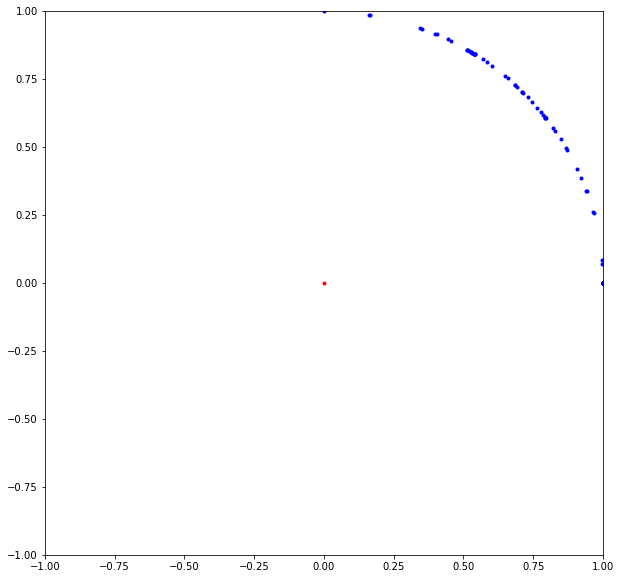

In [13]:
import math
import matplotlib.pyplot as plt
import random

#data = [(98.6442, 124.154, -1298.0), (82.3585, 105.872, -1098.0), (82.6824, 106.236, -1102.0), (71.1778, 92.8775, -958.0), (71.4931, 93.2636, -962.0), (73.0354, -157.92, -818.0), (60.1184, 79.7438, -818.0), (-54.1753, 165.575, -822.0), (63.3417, -134.233, -698.0), (50.8396, 68.3407, -698.0), (51.1246, 68.7387, -702.0), (-44.8802, 141.85, -702.0), (-22.2046, -114.122, -598.0), (54.952, -114.613, -598.0), (55.3136, -115.388, -602.0), (43.2494, 58.7609, -598.0), (43.5399, 59.1367, -602.0), (-37.4606, 121.916, -602.0), (18.3987, 26.0333, -262.633), (-6.25713, -31.6323, -167.762), (15.0978, -29.3332, -157.145), (-8.32315, 30.92, -153.448), (13.7425, -29.0253, -53.7111), (14.2403, -30.0991, -55.5892), (14.4652, 28.4783, -64.2589), (-6.02516, -31.1495, 70.1153), (-4.49266, -31.7318, 105.607), (-6.12163, -31.6399, 71.2762), (7.26409, -31.2903, 139.642), (-13.6971, -69.7712, -366.719), (-14.071, -71.6991, -376.774), (32.428, -64.9097, -342.31), (-19.9141, 69.6304, -343.239), (32.2492, 64.381, -141.323), (31.6714, -64.8493, -117.473), (32.0247, 63.936, -140.349), (-13.264, -69.8387, 160.457), (-13.6011, -71.6794, 164.76), (-9.34723, -71.9969, 242.672), (16.3643, -70.7321, 319.102), (51.4933, 104.393, -226.716), (52.2148, -103.166, -186.743), (-21.2823, -114.332, 264.273), (-13.6415, -114.648, 387.624), (-13.8145, -116.58, 394.172), (74.659, 154.446, -332.805), (75.5073, 156.317, -336.749), (80.2835, -151.741, -276.154), (-30.8514, -169.951, 393.849), (30.3157, -132.061, 598.0), (190.925, -589.678, -2945.5), (190.872, -589.77, -2948.5), (240.578, 267.294, -2948.5), (-267.803, 554.227, -2945.5), (174.429, -510.67, -2554.5), (206.721, 233.044, -2548.5), (-225.436, 486.134, -2551.5), (156.161, -427.805, -2151.5), (171.297, 198.543, -2148.5), (-181.903, 415.843, -2151.5), (138.333, -355.741, -1798.5), (-144.258, 351.669, -1795.5), (121.071, -294.981, -1498.5), (-114.065, 295.615, -1495.5), (102.655, -237.833, -1218.5), (102.691, -237.807, -1215.5), (-87.6601, 242.014, -1215.5), (128.364, -226.459, -417.8), (-45.4458, -260.608, 605.0), (190.677, -310.533, -584.2), (-59.6324, -356.696, 827.6), (283.547, -417.049, -809.4), (402.361, -529.773, -1069.6), (397.369, -525.466, -1059.4), (-81.5949, -527.992, 1224.5), (60.2768, -267.51, 1215.5), (-94.5432, -645.761, 1495.5), (73.6985, -329.691, 1495.5), (87.9675, -396.669, 1801.5), (104.192, -474.248, 2151.5), (122.293, -561.178, 2548.5), (122.25, -560.871, 2545.5), (140.639, -649.394, 2948.5), (140.52, -649.15, 2945.5), (624.078, -691.922, -1505.5), (474.165, -588.638, -1214.5), (-107.813, -780.361, 1797.5), (-120.266, -934.294, 2152.5)]
#data = [(59.9066, -24.6788, -1498.0), (94.6938, -17.5662, -1502.0), (87.6481, 10.6346, -1502.5), (51.8598, -21.6163, -1298.0), (82.1165, -15.4722, -1302.0), (76.0343, 9.51993, -1302.5), (43.9802, -18.5361, -1102.5), (43.7821, -18.4869, -1098.0), (43.9562, -18.5489, -1102.0), (69.5197, -13.2707, -1102.0), (69.2116, -13.196, -1097.5), (64.4202, 8.35511, -1102.5), (64.1678, 8.33498, -1098.0), (94.1312, 126.467, -1098.0), (94.4023, 126.972, -1102.0), (22.8798, 169.268, -1098.0), (38.3957, -16.3453, -962.5), (38.2004, -16.229, -958.0), (38.3569, -16.3305, -962.0), (60.7064, -11.669, -962.0), (60.4065, -11.6504, -957.5), (56.2785, 7.46357, -962.5), (55.9918, 7.45193, -958.0), (83.6368, 109.525, -958.0), (83.9407, 110.019, -962.0), (18.0781, 148.236, -958.0), (32.7893, -14.0826, -822.5), (32.6246, -13.9736, -818.0), (51.893, -10.0673, -822.0), (32.7783, -14.0656, -822.0), (152.16, -32.0637, -818.0), (51.617, -10.0558, -817.5), (48.111, 6.57, -822.5), (102.691, 117.65, -818.0), (72.7167, 92.8523, -818.0), (73.0032, 93.3447, -822.0), (13.8147, 127.083, -818.0), (13.9074, 127.698, -822.0), (28.0332, -12.1063, -702.5), (27.8733, -12.0055, -698.0), (28.0334, -12.1037, -702.0), (44.3493, -8.71905, -702.0), (130.266, -26.3492, -698.0), (44.1017, -8.66188, -697.5), (130.995, -26.5272, -702.0), (41.1498, 5.77137, -702.5), (40.9015, 5.73162, -698.0), (62.992, 78.778, -698.0), (89.0119, 100.432, -702.0), (88.5338, 99.8472, -698.0), (10.4647, 108.858, -698.0), (10.5915, 109.459, -702.0), (37.8648, -7.48498, -598.0), (38.0987, -7.52693, -602.0), (111.847, -21.8632, -598.0), (35.0391, 4.99125, -597.5), (37.8277, -7.46594, -597.5), (112.582, -22.0403, -602.0), (35.3515, 5.06425, -602.5), (35.071, 5.00031, -598.0), (54.667, 67.2018, -598.0), (76.9965, 85.8, -602.0), (76.5133, 85.2149, -598.0), (8.09521, 93.6189, -598.0), (21.3745, 24.5993, -220.422), (1.54414, 33.8455, -211.319), (31.6927, -5.18613, -164.508), (22.0565, 23.2445, -163.124), (23.062, 24.3357, -170.968), (1.41843, 31.9052, -198.874), (-29.1312, -14.5807, -111.336), (28.6688, 15.0984, -97.0176), (2.19961, 31.3653, -100.998), (-28.8932, -14.1201, -64.4281), (-29.7833, -14.5938, -66.6123), (-7.92645, -31.5381, -0.395386), (-7.81242, -31.0486, -0.299115), (5.26833, -31.4636, 40.4573), (22.4734, 22.0345, 49.7859), (23.9063, 23.3792, 52.545), (-17.1635, 26.8242, 8.37987), (-31.8557, -5.64698, 83.9967), (-28.8544, 13.6847, 85.9536), (-31.16, 14.6296, 92.0151), (-31.3037, 3.29024, 170.726), (5.13573, 71.8207, -455.859), (69.9505, -12.5462, -370.733), (71.65, -12.899, -379.924), (49.1698, 53.2383, -376.416), (-63.488, -33.5351, -252.449), (63.6876, 33.2617, -222.171), (4.27349, 71.289, -236.837), (-64.6562, -32.7752, -152.113), (-15.7252, -69.9564, -7.84605), (-37.6347, 60.4934, 11.6294), (13.3849, -70.3718, 83.8818), (13.8609, -72.4397, 86.196), (52.0733, 49.3082, 106.232), (-70.271, -17.3578, 180.565), (-65.355, 28.1478, 184.54), (-67.4067, 28.8773, 190.02), (-72.1138, 12.1402, 388.841), (102.168, 52.8684, -359.219), (104.013, 53.7995, -365.767), (5.62263, 115.43, -386.568), (-101.778, -53.4869, -244.48), (-22.4295, -114.285, -16.5174), (-59.6997, 99.2051, 15.3406), (24.2091, -113.263, 132.232), (86.2797, 78.5104, 169.435), (-110.041, -35.424, 287.78), (-107.351, 41.3183, 295.177), (-109.298, 41.8406, 300.252), (-150.848, -83.1792, -369.23), (-27.5721, -170.021, -27.2114), (-85.3814, 148.076, 20.0537), (-86.2708, 149.851, 20.2263), (40.6794, -166.929, 193.681), (129.683, 112.399, 246.798), (-157.173, -67.1197, 428.755), (-158.64, -68.363, 433.512), (-162.364, 53.0586, 437.308), (-164.172, 53.3604, 441.959), (-109.976, 25.0185, 598.0), (-26.3324, 20.4764, 702.0), (-26.1765, 20.3513, 697.5), (-26.3427, 20.5116, 702.5), (-127.37, 32.5539, 698.0), (-30.743, 24.2547, 822.0), (-30.5821, 24.1141, 817.5), (-30.7645, 24.2768, 822.5), (-148.176, 43.5202, 822.0), (-147.515, 43.1446, 818.0), (-35.6174, 28.6119, 957.5), (-35.7969, 28.7681, 962.5), (-40.6203, 33.1477, 1097.5), (-40.7976, 33.3109, 1102.5), (-47.6097, 39.7748, 1297.5), (-54.5216, 46.5329, 1497.5), (520.433, -173.939, -2948.5), (325.349, 452.748, -2948.5), (325.253, 452.447, -2945.5), (208.569, 359.35, -2951.5), (117.444, 440.503, -2951.5), (455.206, -145.879, -2551.5), (286.29, 390.078, -2554.5), (184.727, 308.671, -2545.5), (95.2191, 382.385, -2551.5), (94.9134, 381.392, -2548.5), (387.503, -116.466, -2151.5), (246.718, 325.459, -2154.5), (161.479, 257.892, -2145.5), (72.0813, 323.908, -2148.5), (-43.0103, 629.612, -2145.5), (326.617, -91.0185, -1798.5), (210.684, 268.881, -1798.5), (141.185, 213.788, -1795.5), (53.4005, 272.839, -1798.5), (-25.4588, 531.809, -1804.5), (-533.151, -430.725, -1498.5), (273.779, -70.8576, -1498.5), (179.272, 221.614, -1498.5), (-12.7656, 444.183, -1504.5), (-449.881, -332.703, -1218.5), (-3.56, 360.6, -1218.5), (3.49333, 261.608, -881.6), (-222.064, -131.145, -555.6), (-27.4813, -259.074, -45.0), (-122.862, 228.784, 27.0), (203.478, 162.391, 372.2), (-254.504, 60.4809, 671.4), (-302.782, -193.412, -777.8), (-300.443, -191.462, -771.4), (-14.7667, -359.051, -65.2), (-160.831, 328.414, 36.6), (-158.783, 322.353, 35.4), (120.63, -344.674, 406.6), (117.538, -339.133, 400.0), (290.573, 211.034, 512.6), (-356.027, 52.1851, 931.92), (25.4778, -495.866, -94.0), (-198.866, 460.777, 47.4), (195.56, -458.567, 554.6), (424.722, 267.085, 716.0), (419.071, 265.127, 707.5), (106.018, -647.809, -128.8), (-226.371, 616.601, 60.4), (305.099, -582.442, 734.8), (584.33, 309.441, 948.6), (578.479, 308.33, 940.2), (-465.303, 21.9242, 1221.5), (-563.362, -23.1158, 1498.5), (-658.996, -87.6892, 1795.5), (-88.7046, 855.23, -2947.5), (-696.993, -680.517, -2155.5), (-612.805, -541.246, -1794.5), (231.508, -787.922, -168.2), (-236.777, 784.195, 76.0), (439.798, -692.759, 921.6), (451.898, -920.266, -222.2), (-222.302, 992.854, 97.6), (772.398, 329.326, 1214.5), (-755.67, -178.636, 2144.5), (-841.99, -288.72, 2555.5), (-842.761, -287.346, 2547.5)]    
#data = [(74.5791, 18.7019, -1498.0), (64.5581, 16.3475, -1298.0), (54.6152, 13.909, -1098.0), (54.7899, 13.9544, -1102.0), (47.6258, 12.1795, -958.0), (47.8209, 12.2584, -962.0), (40.8605, 10.5133, -822.5), (40.6364, 10.4501, -818.0), (40.8193, 10.4947, -822.0), (34.8866, 8.98988, -702.5), (34.6862, 8.97018, -698.0), (34.8622, 9.00137, -702.0), (-147.462, 62.8427, -698.0), (29.9064, 7.7453, -602.5), (29.6804, 7.66555, -598.0), (29.898, 7.75694, -602.0), (-127.871, 49.9292, -598.0), (-128.682, 50.4098, -602.0), (-31.5864, 7.07015, -141.2), (-31.0981, 6.93529, -139.0), (-31.9055, -5.50469, -63.056), (-3.57057, -31.7838, -25.4438), (16.5893, -28.0009, -29.4773), (29.0088, 13.7897, 0.746876), (32.925, 2.58876, -11.5666), (32.6593, 3.34871, 0.128124), (30.0839, 14.2573, 0.803123), (1.47582, 34.3461, -59.9671), (-30.3159, -8.55085, 17.4089), (-19.5865, -25.4608, 16.865), (31.1501, -6.0144, 3.90648), (28.5514, 13.5977, 0.715626), (32.1525, 3.29815, 0.103951), (29.606, 14.0491, 0.771873), (-2.03589, 31.6042, 14.4076), (-2.08934, 32.5751, 14.8907), (7.68493, -31.1432, 135.814), (31.8255, -2.83178, 113.019), (-21.1411, -23.5261, 174.417), (-21.8604, -24.3651, 180.542), (17.5965, -27.1013, 270.624), (-16.4771, -26.9592, 289.262), (-69.3461, 19.6434, -313.023), (-70.0024, -12.808, -137.19), (5.97047, 71.36, -123.526), (-7.51706, -71.9203, -56.0689), (37.3427, -61.3198, -63.551), (72.152, 6.05238, -23.9389), (-69.834, -18.2994, 41.3285), (-44.5631, -56.0451, 39.1781), (69.716, -14.0517, 10.1656), (71.7163, -14.4825, 10.4887), (71.4738, 6.74731, 1.67188), (65.2158, 28.2501, 3.07812), (66.906, 28.8557, 3.19062), (-5.308, 71.8232, 34.1962), (71.6982, -2.209, 255.62), (16.6993, -70.5766, 308.678), (-113.438, -22.1132, -222.173), (14.8566, 114.597, -198.455), (15.3452, 116.702, -201.97), (-11.1975, -115.874, -89.5369), (61.2978, -97.9029, -101.341), (115.369, 10.3137, -37.5852), (-111.846, -26.8988, 66.4089), (-113.899, -27.2742, 67.6278), (-73.9016, -89.6604, 64.318), (113.723, -24.042, 17.3314), (114.955, 9.86314, 3.35938), (107.074, 41.693, 5.66563), (108.899, 42.2025, 5.77813), (-9.66327, 114.996, 55.4422), (116.718, 3.67305, 418.795), (25.3324, -112.367, 490.441), (32.5092, 169.916, -297.225), (93.5895, -144.287, -150.24), (-14.801, -171.251, -131.698), (172.103, 16.6093, -55.5266), (168.085, -37.51, 26.2531), (170.565, 12.6533, 5.53385), (172.625, 12.7341, 5.60938), (162.293, 53.7447, 8.92812), (164.338, 54.0822, 9.04751), (-168.287, -35.8105, 99.624), (-112.526, -130.055, 95.7036), (-16.551, 171.088, 83.1214), (-36.2281, -54.1584, 598.0), (-36.5159, -54.4689, 602.0), (29.9758, -137.168, 598.0), (38.632, -59.836, 598.0), (164.574, 16.7005, 598.0), (-33.9642, 1.51487, 702.5), (-43.2576, -62.3888, 698.0), (-43.5496, -62.6932, 702.0), (34.076, -160.279, 698.0), (45.0206, -69.8784, 698.0), (-33.9371, 1.48858, 702.0), (-33.7288, 1.47588, 697.5), (-39.7507, 1.91209, 822.5), (-51.9625, -72.042, 818.0), (-52.2723, -72.3462, 822.0), (52.6864, -81.9094, 818.0), (-39.7378, 1.90422, 822.0), (-39.5086, 1.88061, 817.5), (-46.5023, 2.38382, 962.5), (-62.8269, -83.2079, 962.0), (61.8011, -96.4148, 962.0), (61.5499, -96.0007, 958.0), (-46.2499, 2.361, 957.5), (-53.2578, 2.9054, 1102.5), (-73.397, -93.2803, 1098.0), (-73.7204, -93.5954, 1102.0), (70.6713, -110.49, 1102.0), (70.4151, -110.092, 1098.0), (-53.027, 2.89437, 1097.5), (-89.3871, -107.527, 1298.0), (82.9998, -130.233, 1298.0), (-62.7204, 3.75757, 1297.5), (-106.085, -120.827, 1498.0), (-72.466, 4.67503, 1497.5), (-339.543, 526.156, -2948.5), (-328.019, 438.452, -2551.5), (-328.416, 437.912, -2545.5), (-315.014, 349.62, -2154.5), (-293.961, 269.244, -1801.5), (-267.869, 203.859, -1498.5), (-595.363, -203.088, -1215.5), (423.613, 499.792, -1218.5), (-232.783, 147.607, -1215.5), (-251.487, -58.841, -496.4), (71.3897, 250.076, -449.0), (-18.2218, -261.228, -200.2), (149.661, -217.461, -229.8), (258.238, 27.7524, -83.2), (254.038, -61.6298, 40.2), (260.243, 14.223, 9.0), (254.24, 61.4543, 13.8), (-259.4, -43.9909, 152.8), (-252.79, -43.6568, 149.2), (-175.053, -188.289, 143.8), (-30.3857, 258.426, 126.4), (-262.385, -44.1464, 154.4), (251.266, 61.4182, 945.8), (-345.633, -90.5301, -687.4), (134.975, 336.012, -633.0), (-18.6429, -358.241, -273.6), (211.855, -290.159, -313.2), (360.138, 43.4876, -115.6), (353.758, 42.3838, -113.2), (360.141, 11.8765, 12.6), (356.521, 53.5245, 18.6), (347.765, -92.1119, 56.8), (-363.175, -44.0939, 212.6), (-356.689, -44.3527, 208.2), (-259.997, -255.487, 204.2), (-255.332, -252.097, 201.4), (-50.525, 356.576, 175.4), (-477.982, -144.993, -963.2), (252.783, 433.151, -897.12), (247.391, 429.853, -886.2), (-12.8838, -499.553, -381.4), (314.379, -393.855, -439.0), (498.102, 69.2952, -159.8), (505.074, 0.476575, 18.6), (500.069, 10.8995, 28.2), (498.996, 1.15838, 17.4), (477.466, -141.625, 78.4), (-88.0956, 494.921, 245.0), (-499.166, -29.7837, 291.0), (-377.146, -330.46, 283.2), (-372.027, -327.627, 279.6), (434.783, -496.117, -575.4), (2.75194, -658.916, -502.8), (653.66, 104.398, -211.4), (656.895, -91.1926, 39.0), (660.821, -22.368, 23.4), (625.805, -209.947, 104.8), (-141.956, 646.558, 324.0), (-139.605, 640.643, 320.4), (-526.492, -401.218, 376.6), (-663.001, 10.4455, 388.0), (50.9648, -280.983, 1218.5), (50.7753, -279.628, 1215.5), (308.433, 109.917, 1215.5), (57.1368, -345.503, 1498.5), (360.011, 171.404, 1501.5), (360.357, 172.015, 1504.5), (61.9471, -415.697, 1801.5), (402.767, 244.127, 1804.5), (65.5342, -496.031, 2151.5), (135.713, -215.951, 2148.5), (438.221, 328.346, 2151.5), (437.357, 327.194, 2148.5), (-201.609, -178.88, 2548.5), (68.3465, -586.732, 2548.5), (160.423, -256.432, 2548.5), (469.558, 417.093, 2548.5), (-239.598, -197.623, 2945.5), (70.7678, -676.223, 2945.5), (70.7017, -676.266, 2948.5), (185.066, -296.957, 2948.5), (-846.07, -365.572, -1802.5), (737.893, 479.623, -1797.5), (738.652, 477.646, -1802.5), (-724.827, -278.868, -1497.5), (580.698, 514.765, -1494.5), (568.955, -589.855, -715.6), (28.9588, -822.146, -630.6), (804.935, 144.934, -260.4), (783.154, -257.786, 48.6), (779.439, -250.895, 48.6), (820.538, -57.7025, 27.0), (764.758, -285.949, 130.0), (781.457, -254.667, 54.4), (777.682, -247.652, 54.4), (-209.383, 797.291, 406.6), (-681.034, -450.247, 466.4), (-814.027, 72.603, 477.2), (753.581, -690.784, -900.0), (747.175, -687.798, -889.2), (74.4463, -1020.52, -786.2), (1000.24, 207.585, -325.2), (1013.01, -117.136, 37.8), (849.482, -565.409, 76.0), (850.036, -555.619, 76.0), (938.461, -399.67, 168.2), (-305.428, 970.799, 498.8), (-903.241, -482.321, 601.8), (-1001.89, 194.612, 612.6)]
data = [(74.5791, 18.7019, -1498.0), (75.0161, -157.702, -1298.0), (64.5581, 16.3475, -1298.0), (61.2371, -134.586, -1098.0), (54.6152, 13.909, -1098.0), (54.7899, 13.9544, -1102.0), (-1.79594, -175.799, -962.0), (52.0382, -118.165, -958.0), (47.6258, 12.1795, -958.0), (47.8209, 12.2584, -962.0), (-3.67221, -150.342, -822.0), (43.1531, -101.508, -818.0), (40.8605, 10.5133, -822.5), (40.6364, 10.4501, -818.0), (40.8193, 10.4947, -822.0), (-4.66213, -128.448, -702.0), (36.1521, -87.6056, -702.5), (34.8866, 8.98988, -702.5), (34.6862, 8.97018, -698.0), (34.8622, 9.00137, -702.0), (-147.462, 62.8427, -698.0), (-146.369, -72.7994, -602.0), (-145.377, -72.3609, -598.0), (-5.01865, -110.176, -602.0), (30.2396, -75.422, -602.5), (29.9064, 7.7453, -602.5), (29.6804, 7.66555, -598.0), (29.898, 7.75694, -602.0), (-127.871, 49.9292, -598.0), (-128.682, 50.4098, -602.0), (10.6197, -29.5926, -234.243), (11.4929, -31.8892, -252.442), (-2.75332, -31.8299, -175.132), (-31.5864, 7.07015, -141.2), (-28.2312, -15.5883, -119.593), (31.3186, -3.02757, -95.668), (-31.0981, 6.93529, -139.0), (-30.8253, -8.59418, -48.6852), (-28.8767, -14.1673, -11.3459), (-31.9055, -5.50469, -63.056), (-29.7711, -14.6075, -11.6603), (-3.57057, -31.7838, -25.4438), (16.5893, -28.0009, -29.4773), (27.8085, -15.8552, -11.548), (26.4325, -18.7106, -28.4319), (29.9824, 11.005, -56.719), (29.0088, 13.7897, 0.746876), (32.2512, 4.5158, -45.393), (32.925, 2.58876, -11.5666), (32.6593, 3.34871, 0.128124), (31.7774, 5.87103, -8.4968), (21.4569, 23.9157, -52.3053), (23.6885, 21.4173, -24.3296), (30.0839, 14.2573, 0.803123), (32.2248, 11.8605, -60.8972), (16.0089, 27.7344, -18.0197), (22.2075, 24.7475, -54.0877), (1.47582, 34.3461, -59.9671), (-6.14735, 31.6808, -38.7202), (-28.5284, 14.3614, -24.801), (-26.8743, 17.7938, -15.213), (-30.3159, -8.55085, 17.4089), (-21.8739, -22.7057, 30.3073), (-19.5865, -25.4608, 16.865), (-22.9739, -23.8286, 31.8733), (18.4348, -25.6886, 10.6896), (31.1501, -6.0144, 3.90648), (28.5514, 13.5977, 0.715626), (32.1525, 3.29815, 0.103951), (29.606, 14.0491, 0.771873), (20.746, 24.9021, 45.9289), (-2.03589, 31.6042, 14.4076), (-12.7482, 28.8484, 46.7465), (-2.08934, 32.5751, 14.8907), (-31.3592, 2.30721, 22.2955), (-31.3279, 2.8628, 9.28957), (-0.254505, -31.9709, 100.867), (7.68493, -31.1432, 135.814), (-0.228214, -33.9099, 107.042), (31.8255, -2.83178, 113.019), (29.499, 14.9121, 88.3767), (-21.1411, -23.5261, 174.417), (-21.8604, -24.3651, 180.542), (15.2268, 27.5617, 164.202), (17.5965, -27.1013, 270.624), (-16.4771, -26.9592, 289.262), (-4.64051, -71.3044, -390.456), (-69.3461, 19.6434, -313.023), (-63.2111, -33.9141, -264.623), (71.4901, -9.07893, -217.516), (-70.0024, -12.808, -137.19), (-69.7711, -18.435, -108.233), (70.4282, 11.0542, -97.6851), (48.8319, 53.4442, -116.486), (5.97047, 71.36, -123.526), (-12.23, 70.1427, -83.7962), (-65.6029, -31.479, -24.155), (-7.51706, -71.9203, -56.0689), (37.3427, -61.3198, -63.551), (58.1442, -42.0696, -61.5297), (62.207, -38.1888, -24.7954), (72.152, 6.05238, -23.9389), (70.3095, 13.6416, -17.3968), (72.3412, 14.0732, -17.8614), (53.803, 47.7175, -53.3215), (37.0123, 62.6376, -39.3346), (-57.4613, 43.1904, -32.3719), (-64.5863, 31.6884, -54.4061), (-69.834, -18.2994, 41.3285), (-49.9608, -50.5783, 69.757), (-44.5631, -56.0451, 39.1781), (43.0895, -58.1039, 25.9696), (69.716, -14.0517, 10.1656), (71.7163, -14.4825, 10.4887), (71.4738, 6.74731, 1.67188), (65.2158, 28.2501, 3.07812), (66.906, 28.8557, 3.19062), (-5.308, 71.8232, 34.1962), (-71.3463, 5.64157, 22.6507), (-71.3017, 4.57573, 52.1223), (-50.3154, -50.9249, 70.2412), (-51.7088, -52.2711, 72.1697), (50.1024, 53.2499, 104.842), (63.9556, 32.8948, 193.592), (0.498841, -73.5003, 233.72), (71.6982, -2.209, 255.62), (16.6993, -70.5766, 308.678), (36.7344, 62.7393, 381.396), (-102.603, -53.107, -425.361), (-104.491, -53.9966, -433.022), (114.448, -18.4737, -350.221), (-113.438, -22.1132, -222.173), (-112.023, -27.9344, -172.565), (-113.944, -28.3349, -175.475), (114.541, 20.369, -158.549), (79.0209, 84.5958, -185.73), (14.8566, 114.597, -198.455), (15.3452, 116.702, -201.97), (-11.1975, -115.874, -89.5369), (61.2978, -97.9029, -101.341), (92.6313, -68.7674, -98.1871), (86.9256, 75.4184, -84.6288), (-16.8568, 115.188, -136.464), (-104.781, 50.1576, -87.2511), (-105.067, -49.2027, -37.761), (97.5773, -64.6051, -38.8208), (115.369, 10.3137, -37.5852), (113.584, 23.2431, -27.398), (60.2527, 99.4367, -62.0533), (-87.1863, 75.5806, -50.5173), (-88.3851, 77.0942, -51.3128), (-111.846, -26.8988, 66.4089), (-113.899, -27.2742, 67.6278), (-73.9016, -89.6604, 64.318), (70.5708, -91.9627, 42.2038), (113.723, -24.042, 17.3314), (114.955, 9.86314, 3.35938), (107.074, 41.693, 5.66563), (108.899, 42.2025, 5.77813), (-9.66327, 114.996, 55.4422), (-115.573, 7.41897, 37.304), (-82.9523, -81.6356, 114.93), (-115.976, 6.23749, 85.5321), (85.3849, 79.1841, 167.951), (101.861, 53.355, 310.159), (103.595, 54.3122, 315.521), (2.63272, -116.929, 373.042), (116.718, 3.67305, 418.795), (25.3324, -112.367, 490.441), (32.5092, 169.916, -297.225), (-166.848, -38.3808, -255.3), (168.223, 34.5123, -233.673), (118.36, 123.298, -273.777), (119.783, 124.655, -276.927), (93.5895, -144.287, -150.24), (136.14, -104.458, -145.538), (-19.1747, 170.5, -201.186), (-14.801, -171.251, -131.698), (131.066, 110.445, -125.643), (91.0695, 145.489, -90.9133), (-118.333, 123.345, -73.6468), (-119.336, 125.252, -74.5032), (-155.628, 72.1554, -128.415), (-157.249, -71.371, -55.5734), (139.667, -102.027, -56.6454), (172.103, 16.6093, -55.5266), (168.025, 36.5475, -39.9966), (106.983, -133.506, 62.8506), (168.085, -37.51, 26.2531), (170.565, 12.6533, 5.53385), (172.625, 12.7341, 5.60938), (162.293, 53.7447, 8.92812), (164.338, 54.0822, 9.04751), (-171.703, 7.84274, 56.0526), (-168.287, -35.8105, 99.624), (-112.526, -130.055, 95.7036), (-16.551, 171.088, 83.1214), (-172.108, 6.91758, 127.489), (-124.729, -118.298, 170.395), (137.038, 105.599, 251.555), (152.023, 81.6762, 466.166), (-36.2281, -54.1584, 598.0), (-36.5159, -54.4689, 602.0), (-15.1364, -33.265, 602.0), (-15.0124, -33.0421, 597.5), (-15.1665, -33.2946, 602.5), (29.9758, -137.168, 598.0), (38.632, -59.836, 598.0), (164.574, 16.7005, 598.0), (60.4075, 97.3412, 602.0), (59.9696, 96.7229, 598.0), (-33.9642, 1.51487, 702.5), (-43.2576, -62.3888, 698.0), (-43.5496, -62.6932, 702.0), (-18.0973, -38.4796, 702.0), (-17.9792, -38.2447, 697.5), (34.076, -160.279, 698.0), (45.0206, -69.8784, 698.0), (71.5813, 112.68, 702.0), (71.1449, 112.06, 698.0), (-33.9371, 1.48858, 702.0), (-33.7288, 1.47588, 697.5), (-39.7507, 1.91209, 822.5), (-51.9625, -72.042, 818.0), (-21.6434, -44.649, 822.0), (-52.2723, -72.3462, 822.0), (-21.5093, -44.4153, 817.5), (52.6864, -81.9094, 818.0), (85.532, 130.745, 822.0), (-39.7378, 1.90422, 822.0), (-39.5086, 1.88061, 817.5), (-46.5023, 2.38382, 962.5), (-25.9932, -51.7472, 962.0), (-62.8269, -83.2079, 962.0), (-25.8445, -51.5087, 957.5), (61.8011, -96.4148, 962.0), (61.5499, -96.0007, 958.0), (-46.2499, 2.361, 957.5), (-53.2578, 2.9054, 1102.5), (-73.397, -93.2803, 1098.0), (-30.54, -58.5927, 1102.0), (-73.7204, -93.5954, 1102.0), (-30.3849, -58.3954, 1097.5), (70.6713, -110.49, 1102.0), (70.4151, -110.092, 1098.0), (-53.027, 2.89437, 1097.5), (-89.3871, -107.527, 1298.0), (-37.2927, -68.1768, 1302.0), (-37.162, -67.9626, 1297.5), (82.9998, -130.233, 1298.0), (-62.7204, 3.75757, 1297.5), (-106.085, -120.827, 1498.0), (-44.5115, -77.2773, 1502.0), (-72.466, 4.67503, 1497.5), (86.1058, -532.095, -2951.5), (213.976, -338.537, -2954.5), (213.867, -338.468, -2951.5), (-339.543, 526.156, -2948.5), (-657.528, -201.983, -2548.5), (61.8917, -460.743, -2551.5), (177.124, -295.0, -2548.5), (-328.019, 438.452, -2551.5), (-328.416, 437.912, -2545.5), (-549.03, -186.502, -2145.5), (39.7043, -388.618, -2148.5), (141.82, -251.727, -2145.5), (570.787, -356.746, -2148.5), (-315.014, 349.62, -2154.5), (-457.187, -169.89, -1801.5), (23.1035, -326.526, -1798.5), (112.988, -213.836, -1795.5), (503.971, -268.638, -1795.5), (-293.961, 269.244, -1801.5), (-377.779, -151.502, -1501.5), (11.4, -271.8, -1495.5), (440.314, -201.218, -1504.5), (-267.869, 203.859, -1498.5), (-595.363, -203.088, -1215.5), (-302.555, -130.248, -1215.5), (368.567, -140.819, -1215.5), (370.514, -142.388, -1224.5), (423.613, 499.792, -1218.5), (-232.783, 147.607, -1215.5), (-236.494, -108.33, -958.2), (251.129, -68.7953, -792.6), (-251.487, -58.841, -496.4), (-255.126, -51.1323, -387.4), (183.575, 182.982, -415.0), (71.3897, 250.076, -449.0), (251.188, 62.3216, -353.2), (-18.2218, -261.228, -200.2), (149.661, -217.461, -229.8), (204.416, -165.005, -222.2), (202.815, 163.455, -191.0), (-238.769, 104.756, -194.6), (-237.821, -102.971, -83.2), (197.751, -166.854, -83.2), (258.238, 27.7524, -83.2), (251.412, 59.7178, -59.2), (141.28, 215.176, -135.2), (-150.771, 213.771, -110.8), (-149.513, 208.001, -108.88), (254.038, -61.6298, 40.2), (260.243, 14.223, 9.0), (254.24, 61.4543, 13.8), (-259.4, -43.9909, 152.8), (-252.79, -43.6568, 149.2), (-175.053, -188.289, 143.8), (168.128, -196.412, 95.2), (-30.3857, 258.426, 126.4), (-261.421, 4.29851, 86.2), (-262.385, -44.1464, 154.4), (-264.381, 4.66375, 196.6), (-193.389, -172.984, 258.0), (226.527, 128.205, 381.4), (224.607, 125.127, 695.2), (19.5693, -260.626, 837.2), (251.266, 61.4182, 945.8), (-345.633, -90.5301, -687.4), (134.975, 336.012, -633.0), (-353.45, -59.221, -533.6), (344.03, 102.745, -491.6), (2.14482, 364.721, -431.0), (0.77423, 358.949, -424.2), (-18.6429, -358.241, -273.6), (211.855, -290.159, -313.2), (273.914, -233.42, -304.2), (286.448, 219.213, -264.0), (-331.732, 136.327, -267.6), (206.792, 297.136, -189.8), (-152.902, 330.377, -155.48), (-153.945, 324.146, -152.6), (-331.612, -135.571, -114.4), (255.764, -256.271, -117.4), (252.839, -250.868, -115.6), (360.138, 43.4876, -115.6), (353.758, 42.3838, -113.2), (345.659, 90.3318, -82.0), (-153.47, 327.181, -154.0), (-154.519, 320.77, -151.6), (360.141, 11.8765, 12.6), (356.521, 53.5245, 18.6), (-356.527, -5.13732, 118.0), (243.747, -264.132, 133.6), (347.765, -92.1119, 56.8), (-363.175, -44.0939, 212.6), (-356.689, -44.3527, 208.2), (-259.997, -255.487, 204.2), (-255.332, -252.097, 201.4), (-50.525, 356.576, 175.4), (-356.197, -1.63283, 265.2), (-273.833, -228.918, 355.8), (-362.596, -2.18671, 270.0), (-276.311, -230.549, 358.6), (341.672, 120.711, 542.0), (334.9, 122.292, 532.4), (311.058, 180.724, 974.0), (313.591, 182.425, 981.8), (-477.982, -144.993, -963.2), (252.783, 433.151, -897.12), (247.391, 429.853, -886.2), (-494.845, -59.4043, -742.4), (466.61, 174.434, -686.8), (45.6404, 498.633, -595.2), (-12.8838, -499.553, -381.4), (314.379, -393.855, -439.0), (369.893, -341.088, -425.0), (409.821, 290.836, -369.0), (-470.543, 174.932, -375.4), (299.211, 398.786, -260.4), (-469.339, -175.85, -159.8), (309.731, -396.36, -165.8), (498.102, 69.2952, -159.8), (-71.1767, 495.109, -229.4), (478.435, 141.583, -114.0), (505.074, 0.476575, 18.6), (500.069, 10.8995, 28.2), (498.996, 1.15838, 17.4), (477.466, -141.625, 78.4), (-502.29, -31.0575, 167.0), (358.9, -349.541, 187.4), (-88.0956, 494.921, 245.0), (-499.166, -29.7837, 291.0), (-377.146, -330.46, 283.2), (-372.027, -327.627, 279.6), (-501.037, -19.6863, 374.2), (-400.602, -302.959, 501.8), (-395.131, -300.093, 495.6), (502.417, 32.2105, 799.4), (497.168, 37.3044, 789.133), (-663.808, -42.2643, -994.6), (-657.653, -43.2616, -985.4), (-654.708, -43.7169, -980.4), (595.012, 276.321, -913.2), (126.528, 648.505, -792.8), (434.783, -496.117, -575.4), (2.75194, -658.916, -502.8), (463.121, -465.733, -556.0), (551.098, 359.062, -483.2), (-627.458, 206.84, -495.2), (416.684, 508.83, -344.0), (-625.599, -210.944, -210.2), (329.054, -577.043, -225.32), (329.269, -570.536, -223.4), (653.66, 104.398, -211.4), (622.89, 209.318, -149.2), (656.895, -91.1926, 39.0), (660.821, -22.368, 23.4), (625.805, -209.947, 104.8), (-659.508, -75.4215, 222.2), (501.385, -431.214, 249.8), (-141.956, 646.558, 324.0), (-139.605, 640.643, 320.4), (-526.492, -401.218, 376.6), (-663.001, 10.4455, 388.0), (-655.086, -50.266, 491.6), (-549.08, -370.44, 664.2), (44.0921, -377.232, 1218.5), (50.9648, -280.983, 1218.5), (50.7753, -279.628, 1215.5), (601.544, -233.867, 1218.5), (308.433, 109.917, 1215.5), (386.872, 233.194, 1224.5), (57.1368, -345.503, 1498.5), (68.209, -462.104, 1501.5), (360.011, 171.404, 1501.5), (360.357, 172.015, 1504.5), (467.811, 292.783, 1495.5), (171.54, 224.969, 1498.5), (61.9471, -415.697, 1801.5), (98.3509, -550.391, 1798.5), (402.767, 244.127, 1804.5), (554.932, 361.331, 1795.5), (213.493, 263.392, 1798.5), (65.5342, -496.031, 2151.5), (138.832, -653.325, 2148.5), (138.437, -652.193, 2145.5), (135.713, -215.951, 2148.5), (438.221, 328.346, 2151.5), (437.357, 327.194, 2148.5), (264.116, 306.591, 2151.5), (-201.609, -178.88, 2548.5), (68.3465, -586.732, 2548.5), (160.423, -256.432, 2548.5), (469.558, 417.093, 2548.5), (321.149, 355.403, 2551.5), (-239.598, -197.623, 2945.5), (70.7678, -676.223, 2945.5), (70.7017, -676.266, 2948.5), (185.066, -296.957, 2948.5), (374.201, 404.465, 2945.5), (-767.976, -216.466, -2947.5), (687.334, -550.903, -2947.5), (686.157, -550.507, -2952.5), (629.287, -454.969, -2544.5), (-846.07, -365.572, -1802.5), (737.893, 479.623, -1797.5), (738.652, 477.646, -1802.5), (-724.827, -278.868, -1497.5), (580.698, 514.765, -1494.5), (-993.078, 45.8865, -1502.5), (-808.164, -11.7215, -1217.5), (739.299, 440.079, -1217.5), (391.319, 902.954, -1225.5), (240.19, 784.452, -1003.0), (551.873, -609.754, -694.0), (548.732, -603.966, -694.0), (568.955, -589.855, -715.6), (28.9588, -822.146, -630.6), (704.915, 418.65, -601.8), (-790.419, 227.448, -620.7), (551.124, 614.336, -428.2), (545.798, 610.504, -428.2), (-784.435, -235.054, -260.4), (291.045, -768.118, -292.8), (293.63, -761.047, -282.0), (804.935, 144.934, -260.4), (783.154, -257.786, 48.6), (779.439, -250.895, 48.6), (820.538, -57.7025, 27.0), (764.758, -285.949, 130.0), (781.457, -254.667, 54.4), (777.682, -247.652, 54.4), (-805.336, -132.881, 271.2), (-209.383, 797.291, 406.6), (-681.034, -450.247, 466.4), (-814.027, 72.603, 477.2), (-814.236, -94.9015, 612.6), (-703.771, -421.359, 829.4), (753.581, -690.784, -900.0), (747.175, -687.798, -889.2), (74.4463, -1020.52, -786.2), (640.869, -794.778, -872.6), (-993.368, 234.9, -775.4), (902.396, 475.547, -758.8), (-990.18, 234.893, -769.6), (721.785, 723.753, -531.2), (716.257, 720.49, -531.2), (121.83, -1016.82, -385.0), (128.466, -1010.73, -385.0), (-990.712, -249.939, -325.2), (-984.418, -249.737, -325.2), (1000.24, 207.585, -325.2), (939.813, 406.784, -233.0), (1013.01, -117.136, 37.8), (849.482, -565.409, 76.0), (850.036, -555.619, 76.0), (938.461, -399.67, 168.2), (-991.959, -233.848, 346.8), (-305.428, 970.799, 498.8), (-903.241, -482.321, 601.8), (-1001.89, 194.612, 612.6), (-1007.97, -168.353, 769.6), (-1001.75, -165.673, 769.6), (-1010.95, -169.626, 775.4), (-909.782, -462.935, 1035.4), (655.158, 444.329, 2147.5), (186.668, -764.676, 2544.5), (771.791, 541.882, 2552.5), (237.52, -890.095, 2955.5)]
    

plt.figure(figsize = (10,10))
bucketWidth = 0.01

for i1 in [257]:#range(len(data)):
    x1,y1,z1 = data[i1]

    a = math.atan2(y1, x1)
    #print(round(ra,3), round(a,3))
    #assert(abs(centreAngle - abs(thetas[i1])) < 0.01)
    
    subAngles = []

    for i2 in range(len(data)):
        if (i1 != i2):
            x2,y2,z2 = data[i2]

            b = math.atan2(y2, x2)
            phi = math.atan2(y2-y1, x2-x1)
            if (x1*x2 + y1*y2 > 0 and (abs(a-b) < 1 or abs(abs(a-b) - 2*math.pi) < 1)):
                #subtendedAngle = abs(phi) - abs(b)

                A = math.sqrt(x1**2 + y1**2)
                B = math.sqrt(x2**2 + y2**2)
                AB = math.sqrt((x2-x1)**2 + (y2 - y1)**2)

                subtendedAngle = math.acos((B**2 + AB**2 - A**2)/(2 * B * AB))

                #while subtendedAngle < 0:
                #    subtendedAngle += 2*math.pi
                #while subtendedAngle > 2*math.pi:
                #    subtendedAngle -= 2*math.pi

                closer = False
                if subtendedAngle > math.pi/2: #Means the point i2 lies closer to the origin (on the circle) than i1
                    closer = True
                    subtendedAngle = math.pi - subtendedAngle
                
                sign = 1 if (x1 * y2 - x2 * y1) > 0 else 0
                
                subAngles.append(sign*subtendedAngle)

    plt.plot([math.cos(i) for i in subAngles], [math.sin(i) for i in subAngles], 'b.')
    plt.plot([0],[0], 'r.')
    plt.axis([-1,1,-1,1])
    plt.show()